___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import RocCurveDisplay, roc_auc_score, roc_curve
from sklearn.utils import class_weight
from tensorflow.keras.layers import Dropout
from sklearn.compose import make_column_transformer
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


In [2]:
try:
    import jupyter_black

    jupyter_black.load()
except ImportError:
    pass

In [3]:
import os

# Set TF log level to ignore INFOs.
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

In [4]:
# Get more information about the GPU
if tf.config.list_physical_devices("GPU"):
    !nvidia-smi

Tue Oct 31 04:08:35 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8     9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# to display all rows
# pd.set_option('display.max_rows', None)

# to display all columns
pd.set_option("display.max_columns", None)

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# df = pd.read_csv("1-Churn_Modelling.csv")
df = pd.read_csv("/content/drive/MyDrive/1-Churn_Modelling.csv")

In [8]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2      0.000              1          1               1   
1       1  83807.860              1          0               1   
2       8 159660.800              3          1               0   
3       1      0.000              2          0               0   
4       2 125510.820              1          1               1   

   EstimatedSalary  Exited  
0       101348.880       1  
1       112542.580       0  
2       113931.570       1  
3        93826.630       0  
4        79084.100       0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
df.isnull().sum().any()

False

In [11]:
df.duplicated().sum().any()

False

In [12]:
df.describe().T

count         mean       std          min          25%  \
RowNumber       10000.000     5000.500  2886.896        1.000     2500.750   
CustomerId      10000.000 15690940.569 71936.186 15565701.000 15628528.250   
CreditScore     10000.000      650.529    96.653      350.000      584.000   
Age             10000.000       38.922    10.488       18.000       32.000   
Tenure          10000.000        5.013     2.892        0.000        3.000   
Balance         10000.000    76485.889 62397.405        0.000        0.000   
NumOfProducts   10000.000        1.530     0.582        1.000        1.000   
HasCrCard       10000.000        0.706     0.456        0.000        0.000   
IsActiveMember  10000.000        0.515     0.500        0.000        0.000   
EstimatedSalary 10000.000   100090.240 57510.493       11.580    51002.110   
Exited          10000.000        0.204     0.403        0.000        0.000   

                         50%          75%          max  
RowNumber           5000.500     7500.250    10000.000  
CustomerId      15690738.000 15753233.750 15815690.000  
CreditScore          652.000      718.000      850.000  
Age                   37.000       44.000       92.000  
Tenure                 5.000        7.000       10.000  
Balance            97198.540   127644.240   250898.090  
NumOfProducts          1.000        2.000        4.000  
HasCrCard              1.000        1.000        1.000  
IsActiveMember         1.000        1.000        1.000  
EstimatedSalary   100193.915   149388.247   199992.480  
Exited                 0.000        0.000        1.000

In [13]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

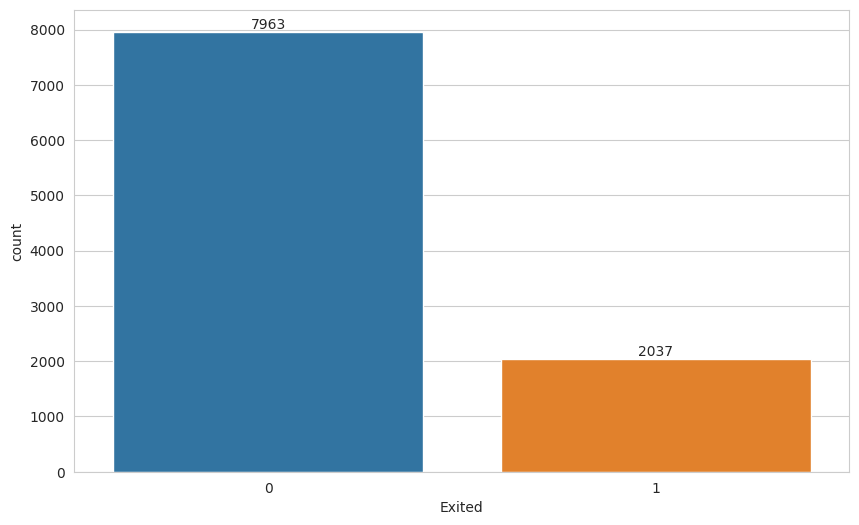

In [14]:
ax = sns.countplot(x='Exited', data=df)
ax.bar_label(ax.containers[0]);

In [15]:
df.describe(include="O").T

count unique     top  freq
Surname    10000   2932   Smith    32
Geography  10000      3  France  5014
Gender     10000      2    Male  5457

In [16]:
df_copy = df.copy()
df_copy = df_copy.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

In [17]:
df_copy['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

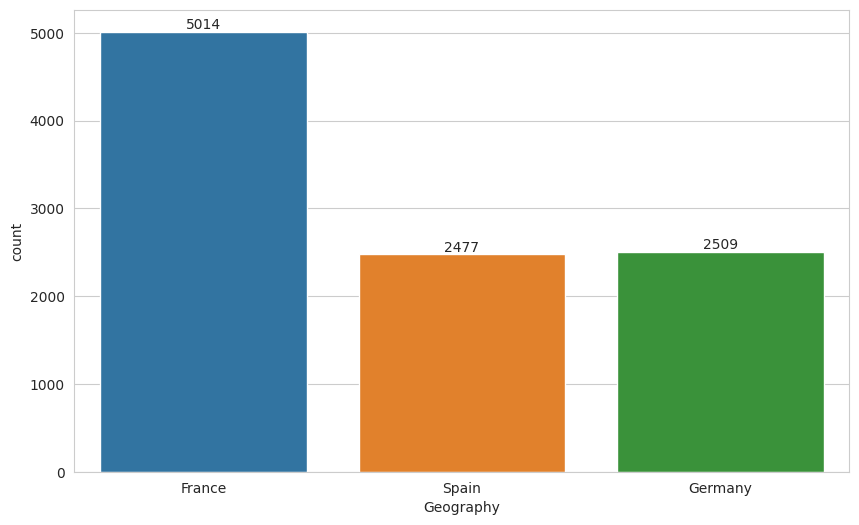

In [18]:
ax = sns.countplot(x='Geography', data=df_copy)
ax.bar_label(ax.containers[0]);

In [19]:
df_copy['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

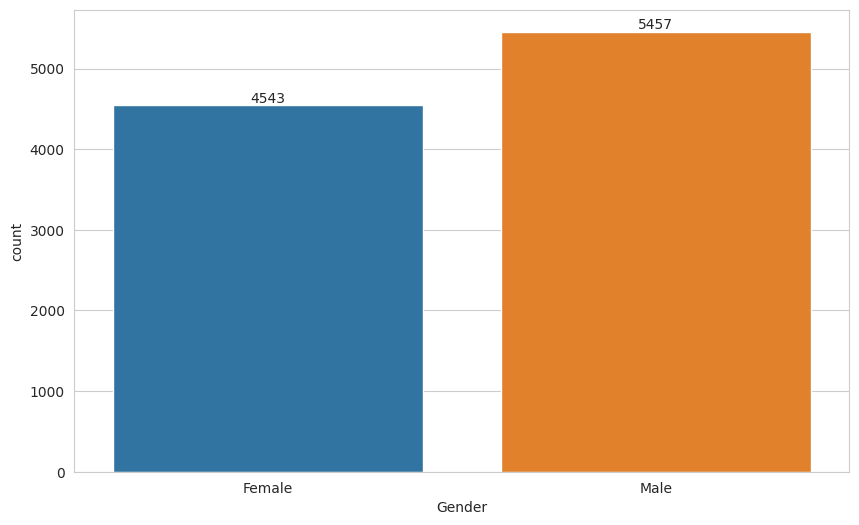

In [20]:
ax = sns.countplot(x='Gender', data=df_copy)
ax.bar_label(ax.containers[0]);

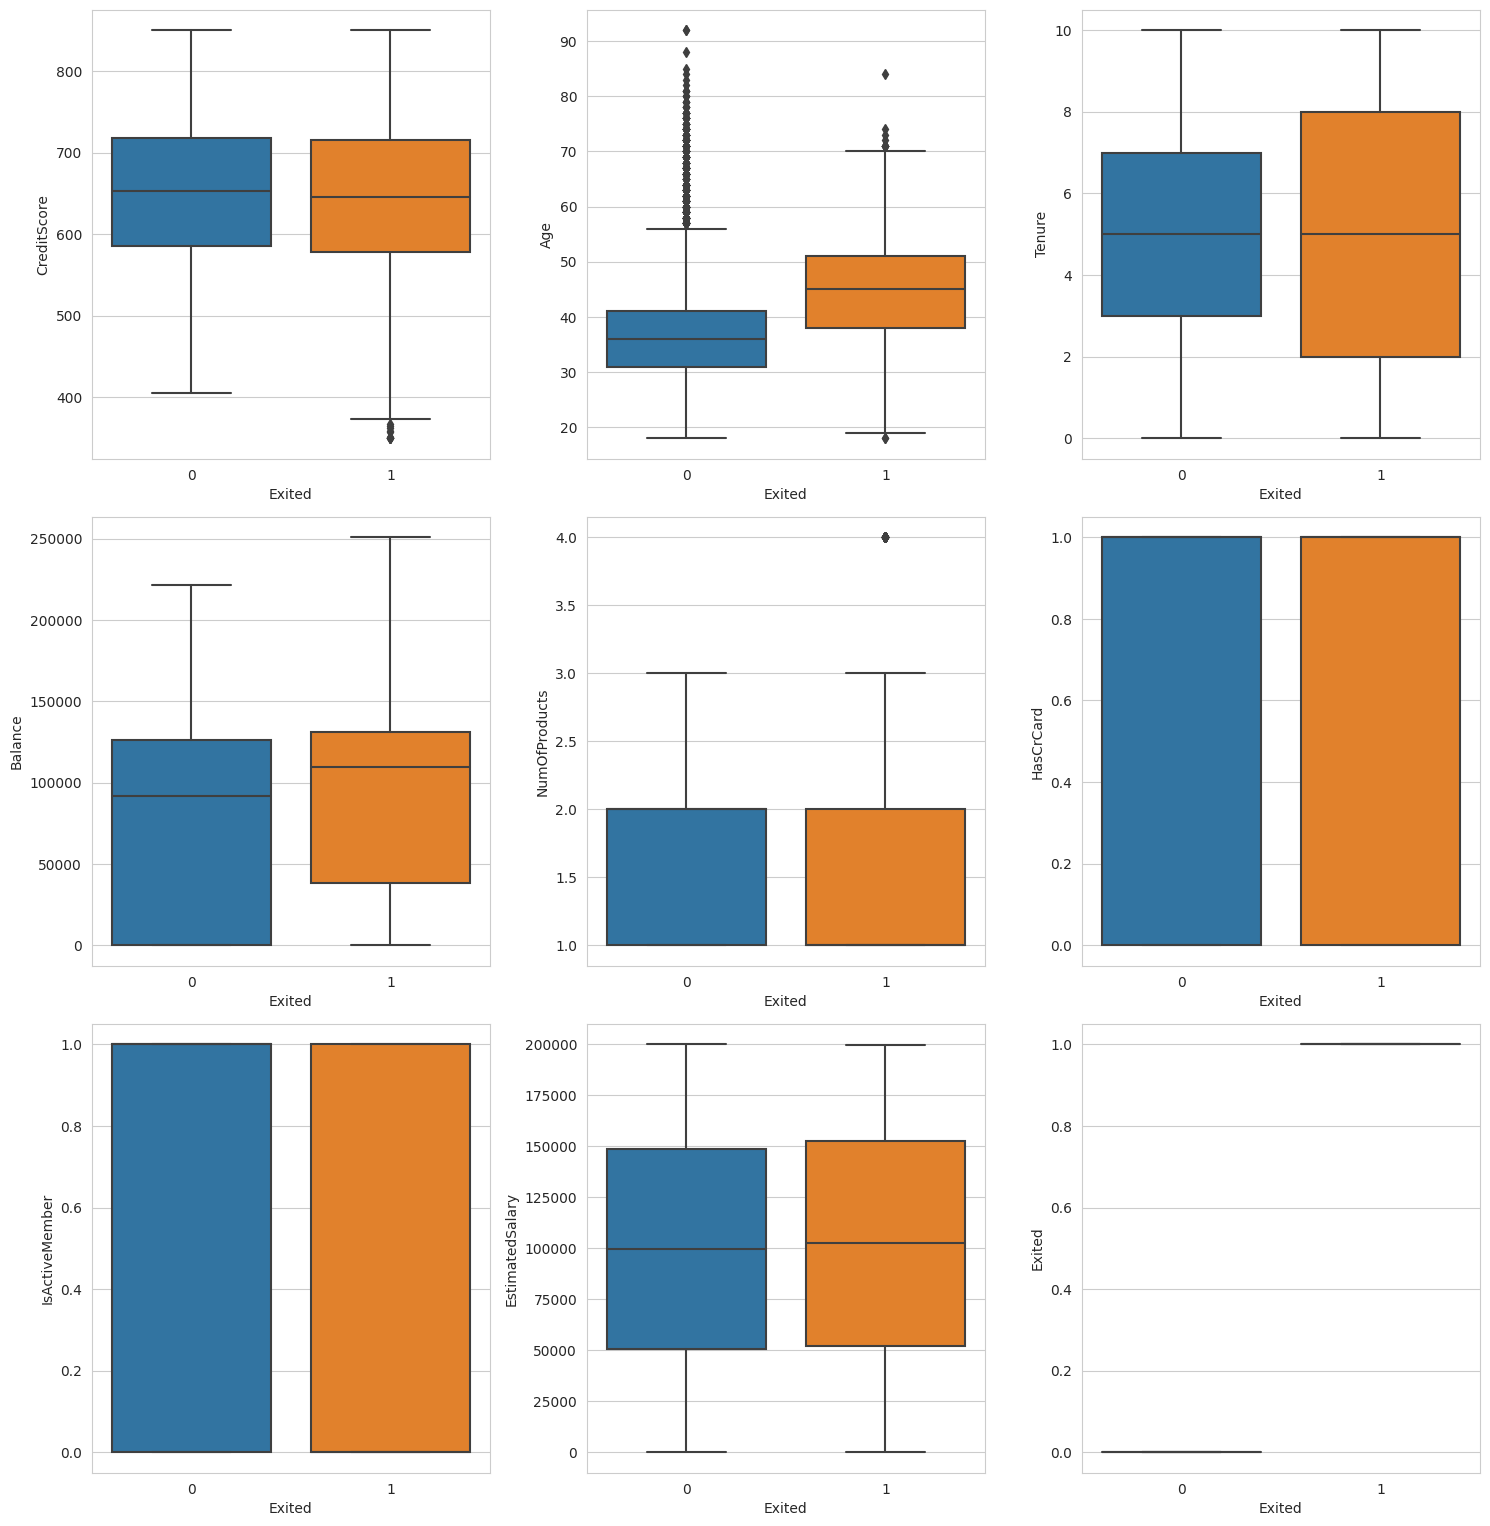

In [21]:
# Here we could see the most distinguishing features and potential outliers

fig = plt.figure(figsize=(15,20))

for i, col in enumerate(df_copy.select_dtypes(include=np.number)):
        plt.subplot(4,3,i+1)
        ax = sns.boxplot(x="Exited", y=df_copy[col], data=df_copy)

plt.tight_layout();

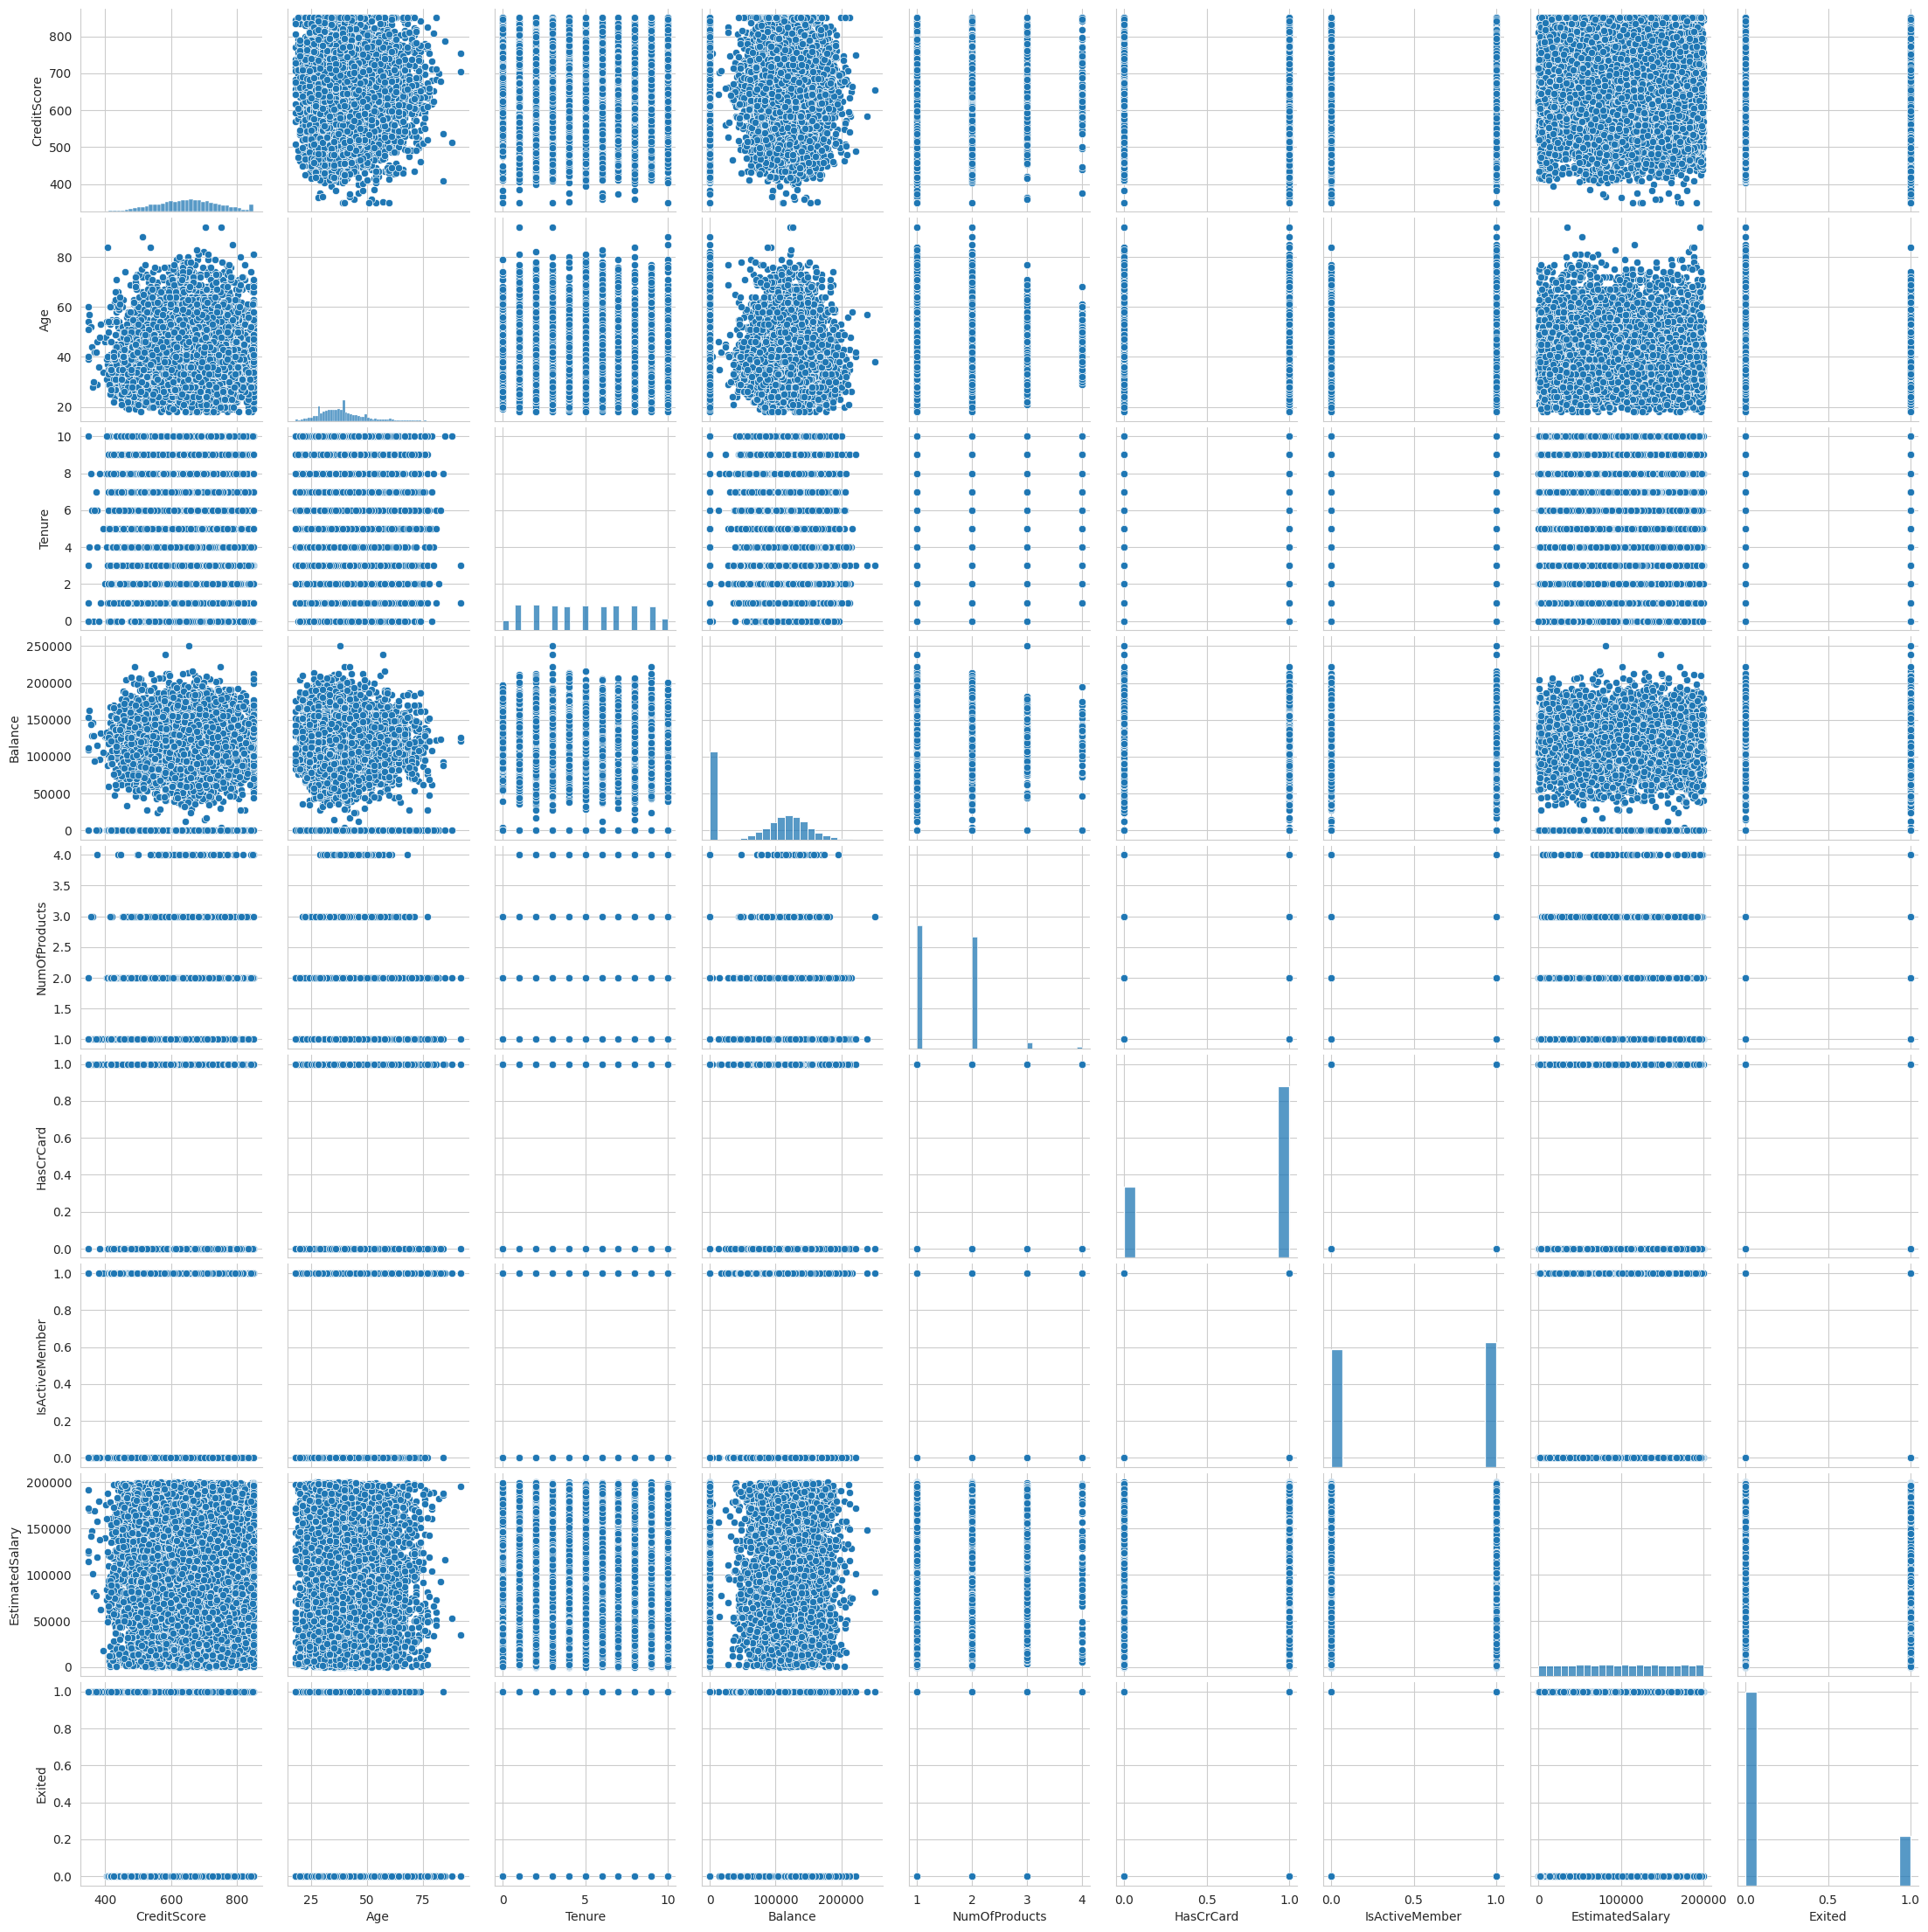

In [22]:
sns.pairplot(df_copy)
plt.show()

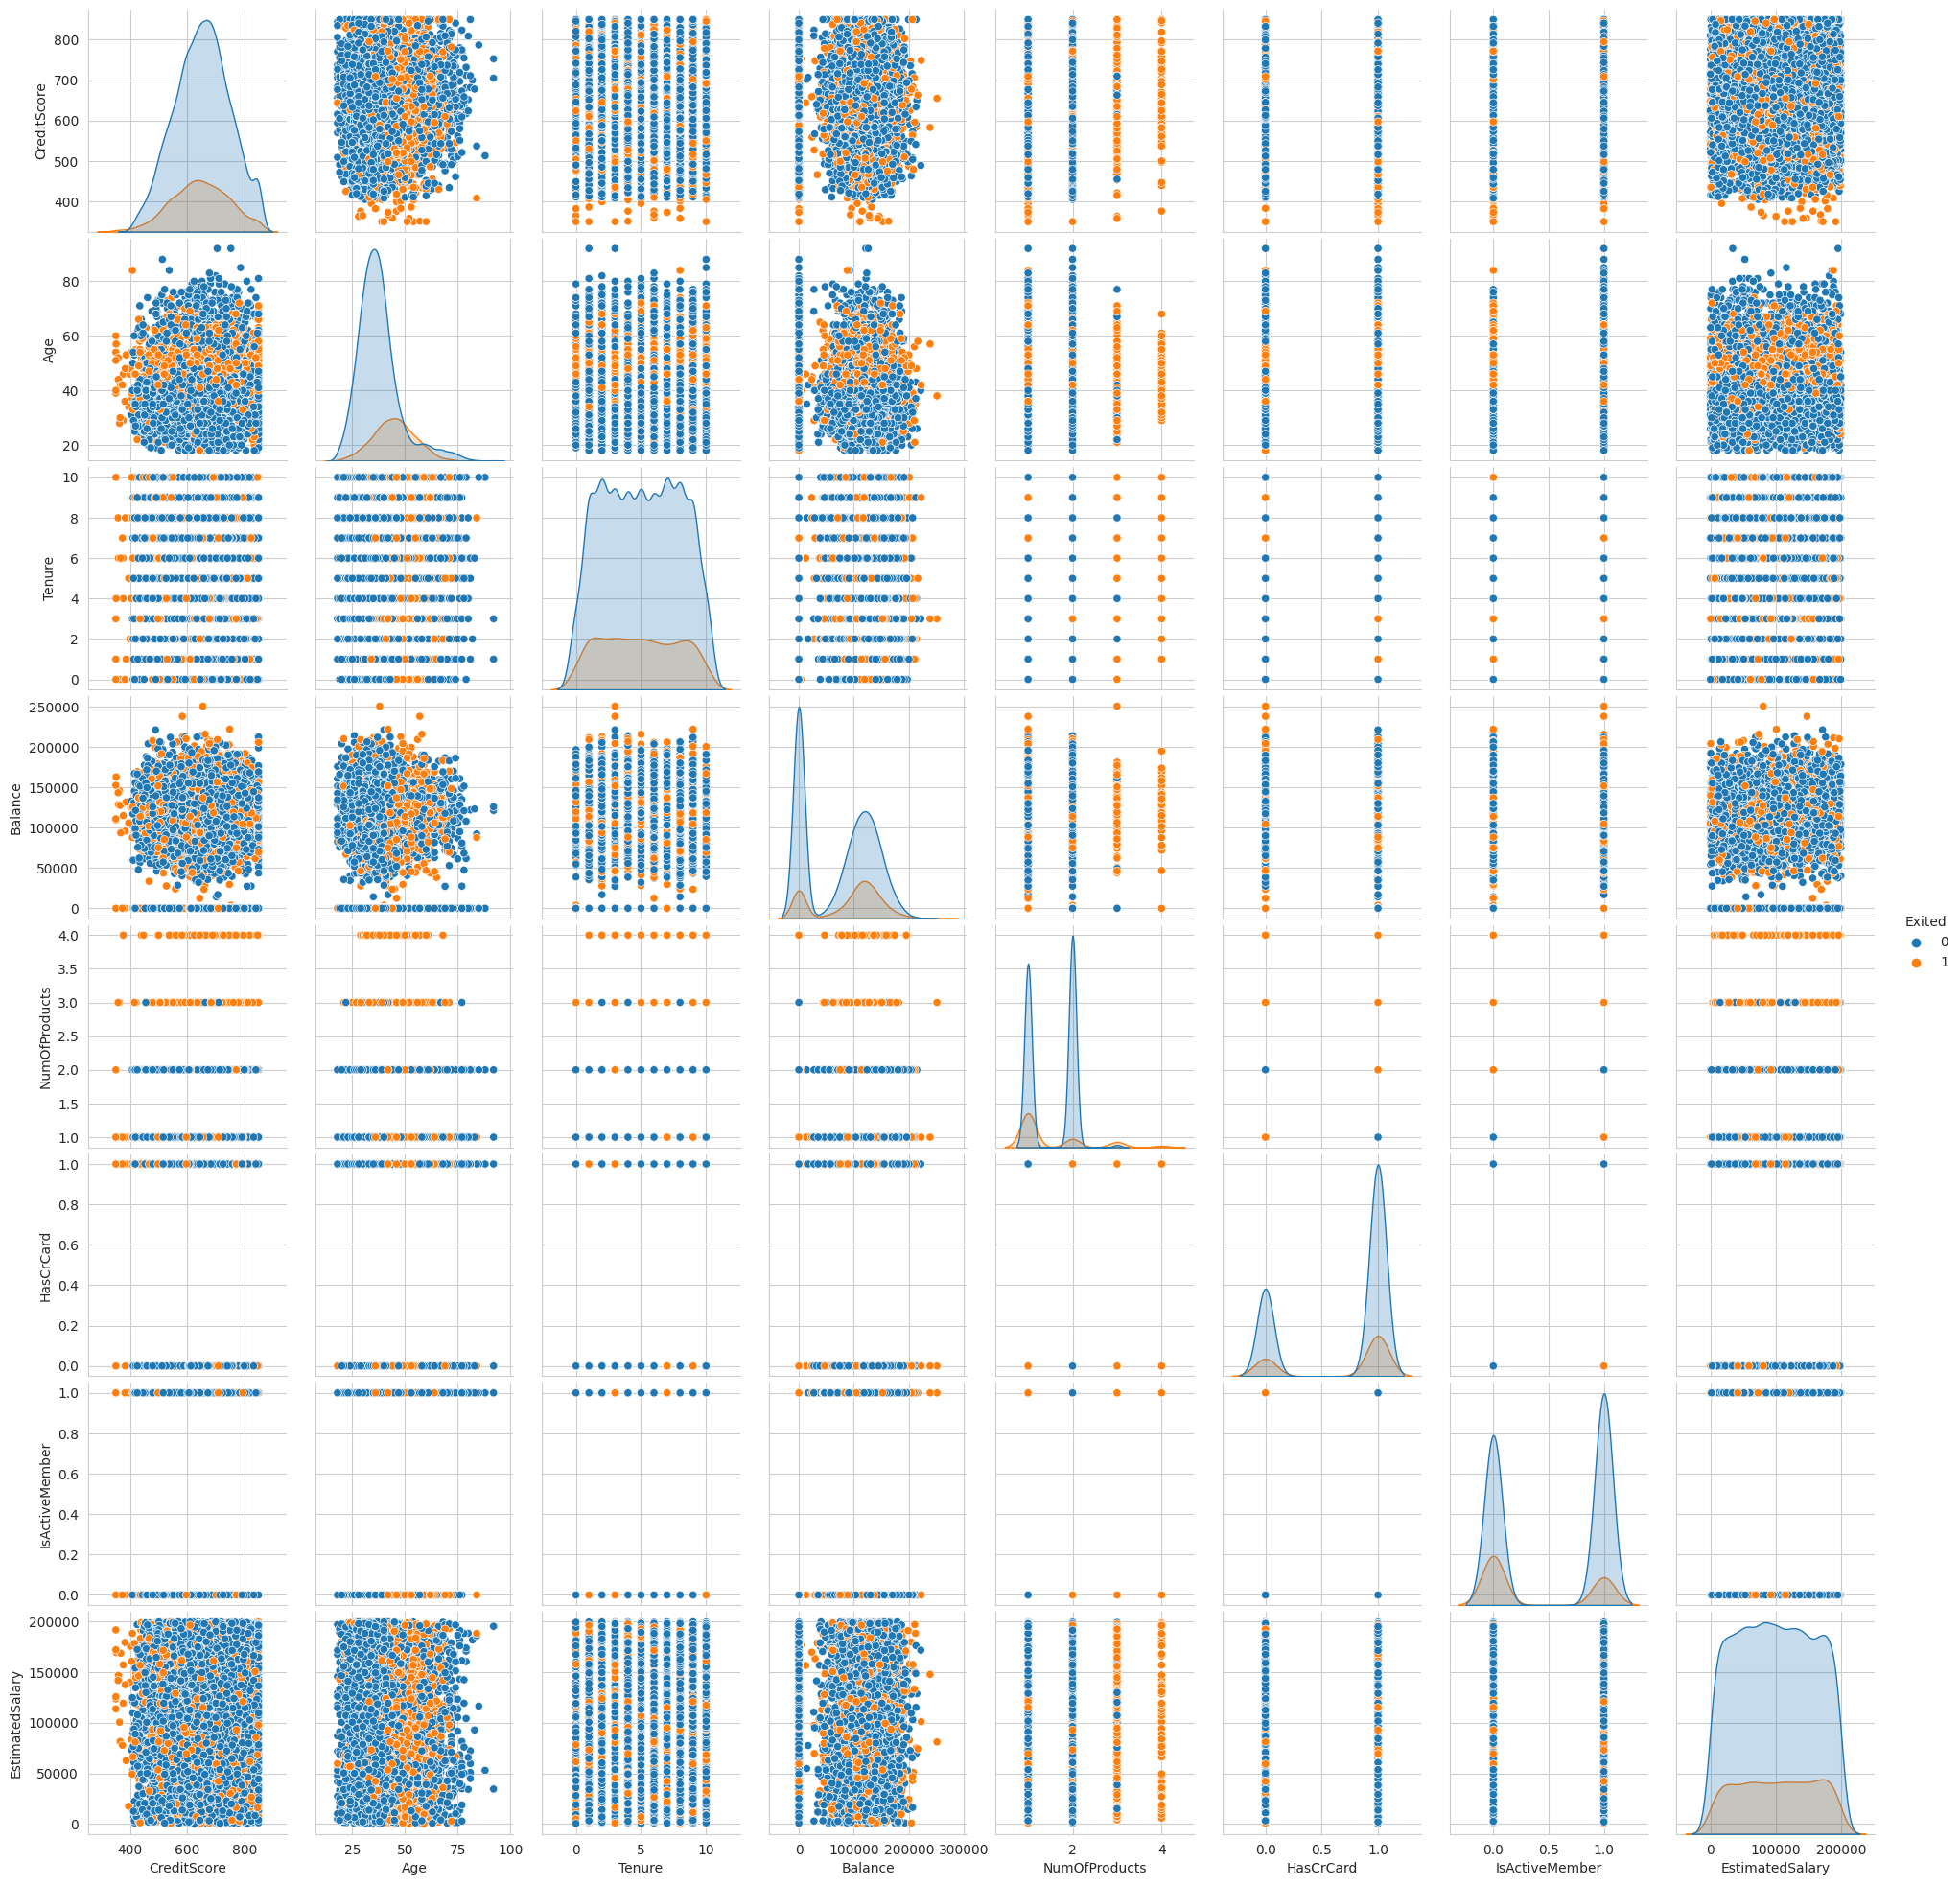

In [23]:
sns.pairplot(df_copy, hue = "Exited")

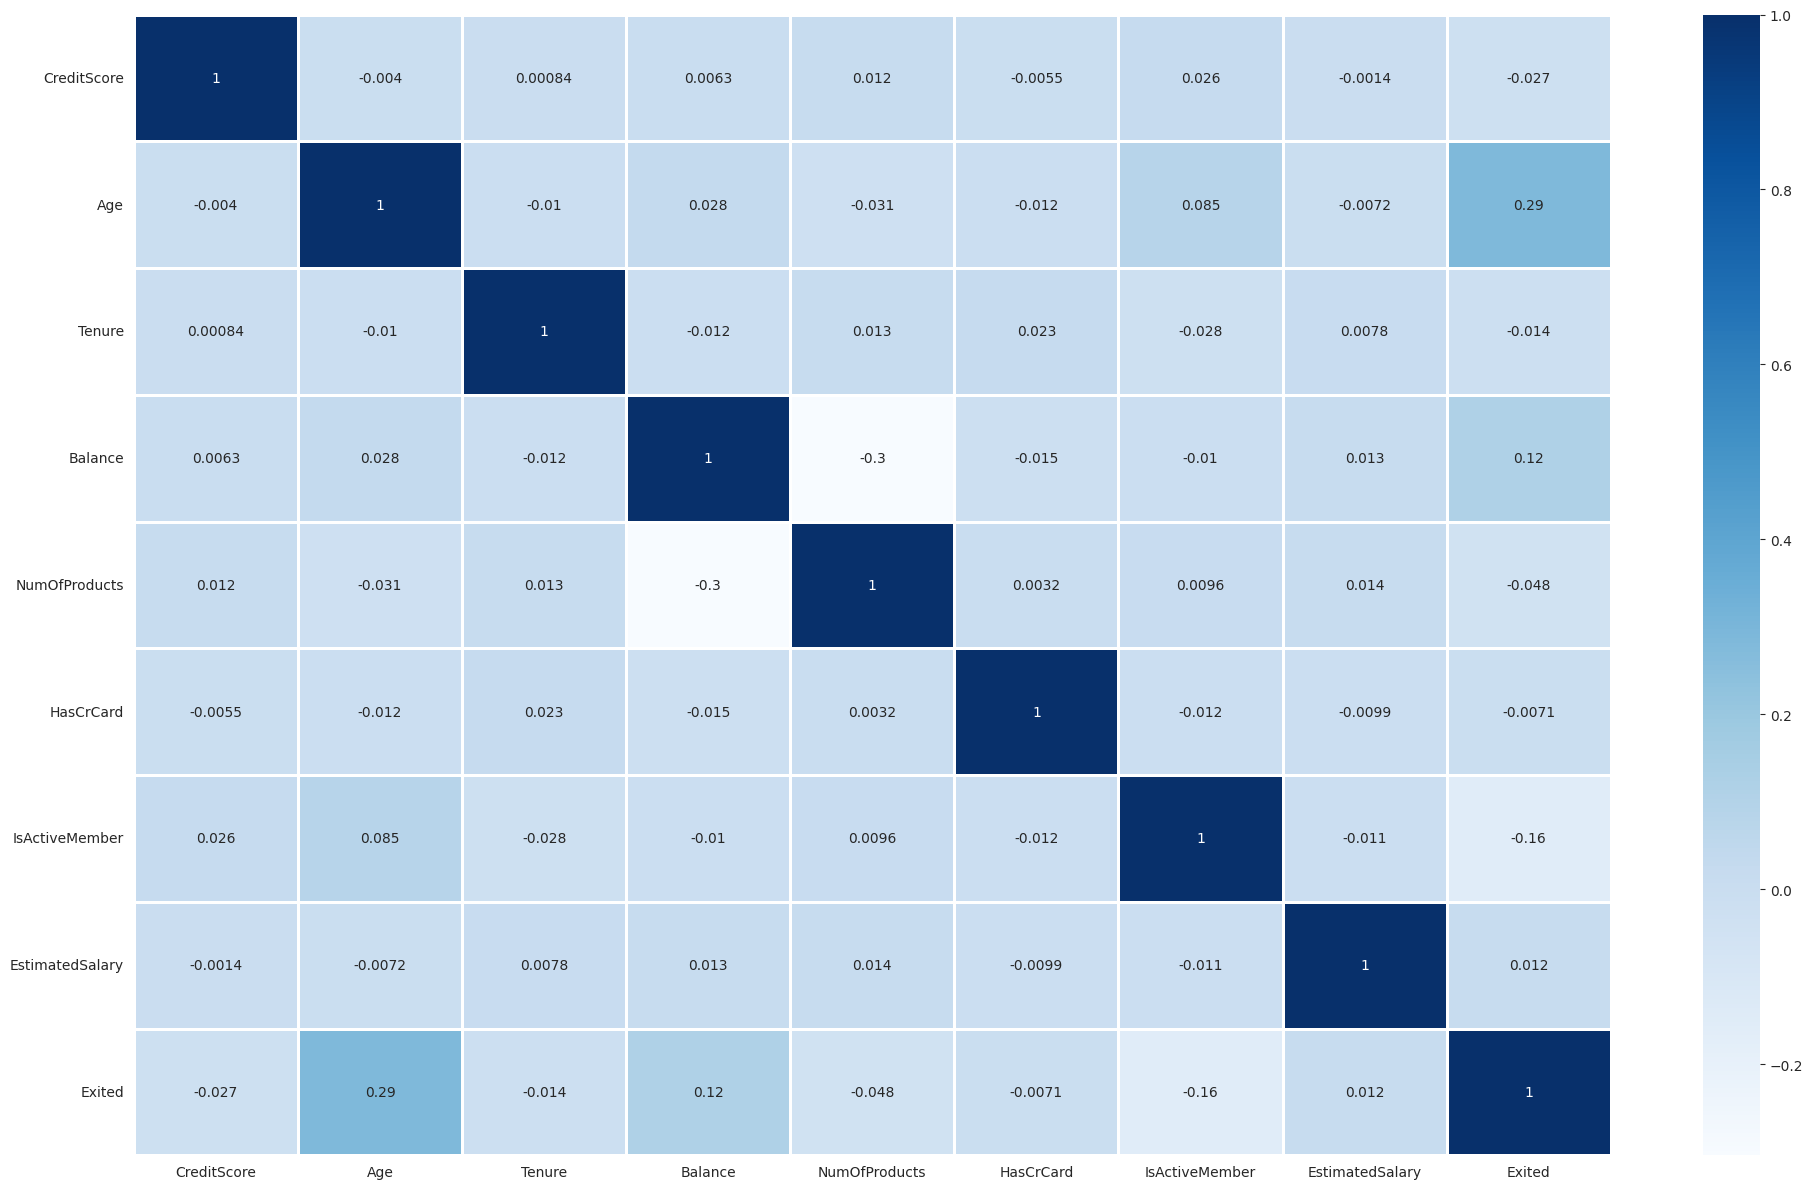

In [24]:
plt.figure(figsize=(20,12))
sns.heatmap(df_copy.corr(numeric_only=True), annot=True, linewidth =2, cmap="Blues")
plt.tight_layout()

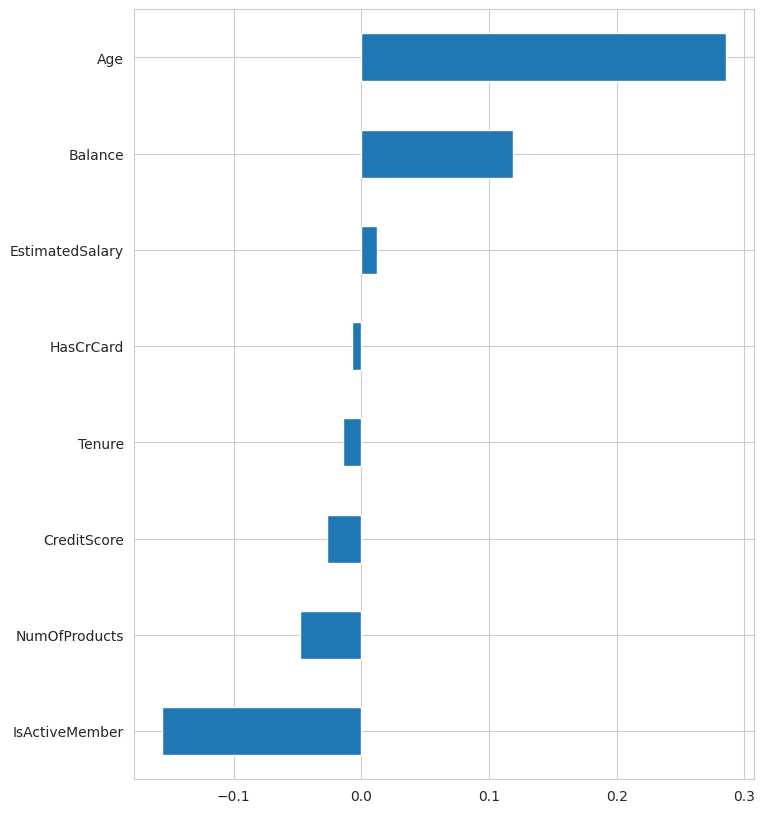

In [25]:
plt.figure(figsize=(8, 10))
(df_copy.corr(numeric_only=True)["Exited"].sort_values().drop("Exited").plot(kind="barh"))
plt.show()

# Preprocessing of Data
- Train | Test Split, Scalling

In [26]:
try:
    X = df_copy.drop("Exited", axis =1)
    y = df_copy["Exited"]
except:
    print("The column is already droped")

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
seed=42
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=seed, stratify=y)

In [29]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

columns_to_encode = ['Geography', 'Gender']

column_trans = make_column_transformer(
                        (OneHotEncoder(handle_unknown="ignore", sparse=False), columns_to_encode),
                        remainder='passthrough',verbose_feature_names_out=False)

column_trans = column_trans.set_output(transform="pandas")

X_train=column_trans.fit_transform(X_train)
X_test=column_trans.transform(X_test)

X_train.head()

Geography_France  Geography_Germany  Geography_Spain  Gender_Female  \
2151             1.000              0.000            0.000          0.000   
8392             0.000              1.000            0.000          0.000   
5006             0.000              1.000            0.000          1.000   
4117             1.000              0.000            0.000          0.000   
7182             0.000              1.000            0.000          0.000   

      Gender_Male  CreditScore  Age  Tenure    Balance  NumOfProducts  \
2151        1.000          753   57       7      0.000              1   
8392        1.000          739   32       3 102128.270              1   
5006        0.000          755   37       0 113865.230              2   
4117        1.000          561   37       5      0.000              2   
7182        1.000          692   49       6 110540.430              2   

      HasCrCard  IsActiveMember  EstimatedSalary  
2151          1               0       159475.080  
8392          1               0        63981.370  
5006          1               1       117396.250  
4117          1               0        83093.250  
7182          0               1       107472.990

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [31]:
X_train.shape

(8000, 13)

In [32]:
X_test.shape

(2000, 13)

# Modelling & Model Performance

## Logistic Regression
First I would like to try ML model

In [33]:
LR=LogisticRegression(class_weight='balanced')
LR.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [34]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(60 * '-')
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))


In [35]:
eval_metric(LR, X_train, y_train, X_test, y_test)

Test_Set
[[1142  451]
 [ 122  285]]
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1593
           1       0.39      0.70      0.50       407

    accuracy                           0.71      2000
   macro avg       0.65      0.71      0.65      2000
weighted avg       0.80      0.71      0.74      2000

------------------------------------------------------------
Train_Set
[[4571 1799]
 [ 513 1117]]
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      6370
           1       0.38      0.69      0.49      1630

    accuracy                           0.71      8000
   macro avg       0.64      0.70      0.64      8000
weighted avg       0.79      0.71      0.74      8000



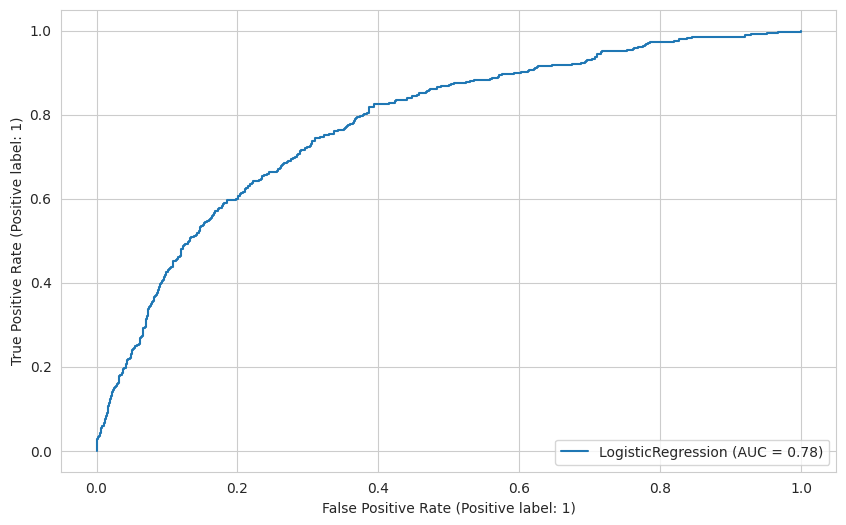

In [36]:
RocCurveDisplay.from_estimator(LR, X_test, y_test);

*italicized text*## NN models

*italicized text*## without class_weigth

### Create The Model

In [37]:
tf.random.set_seed(seed)

vanila_model = Sequential(
    [
        Input(shape=X_train.shape[1]),
        Dense(units=72, activation="relu"),
        Dense(units=36, activation="relu"),
        Dense(units=12, activation="relu"),
        Dense(units=3, activation="relu"),
        Dense(units=1,activation='sigmoid'),
    ]
)
vanila_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 72)                1008      
                                                                 
 dense_1 (Dense)             (None, 36)                2628      
                                                                 
 dense_2 (Dense)             (None, 12)                444       
                                                                 
 dense_3 (Dense)             (None, 3)                 39        
                                                                 
 dense_4 (Dense)             (None, 1)                 4         
                                                                 
Total params: 4123 (16.11 KB)
Trainable params: 4123 (16.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
vanila_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Recall'])
vanila_model.fit(x=X_train, y=y_train, epochs=150, batch_size=100, workers=-1, validation_split=0.2)

Epoch 1/150
64/64 [==============================] - 9s 18ms/step - loss: 0.6962 - recall: 0.2695 - val_loss: 0.6752 - val_recall: 0.0000e+00
Epoch 2/150
64/64 [==============================] - 0s 5ms/step - loss: 0.6672 - recall: 0.0053 - val_loss: 0.6579 - val_recall: 0.0094
Epoch 3/150
64/64 [==============================] - 0s 5ms/step - loss: 0.6507 - recall: 0.0435 - val_loss: 0.6403 - val_recall: 0.0719
Epoch 4/150
64/64 [==============================] - 0s 4ms/step - loss: 0.6328 - recall: 0.1710 - val_loss: 0.6198 - val_recall: 0.2562
Epoch 5/150
64/64 [==============================] - 0s 5ms/step - loss: 0.6128 - recall: 0.2802 - val_loss: 0.5985 - val_recall: 0.3281
Epoch 6/150
64/64 [==============================] - 0s 4ms/step - loss: 0.5944 - recall: 0.2969 - val_loss: 0.5792 - val_recall: 0.3688
Epoch 7/150
64/64 [==============================] - 0s 4ms/step - loss: 0.5787 - recall: 0.2985 - val_loss: 0.5632 - val_recall: 0.3375
Epoch 8/150
64/64 [=================

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

<Axes: >

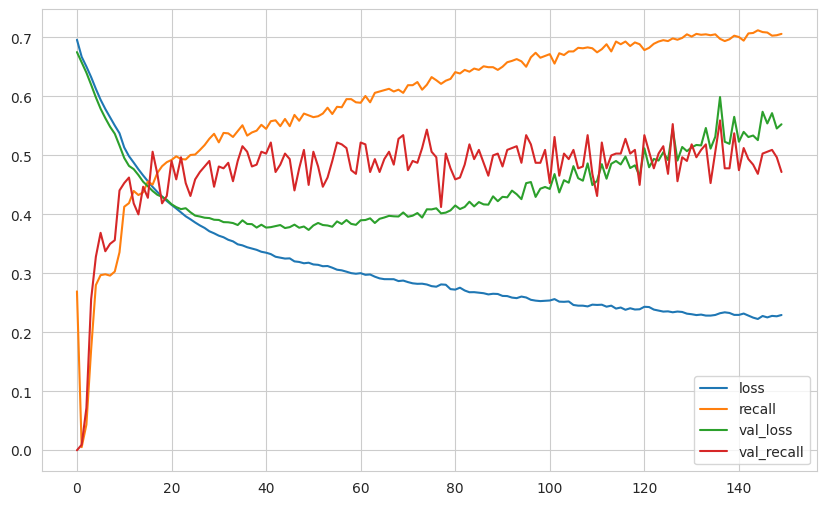

In [39]:
loss_df = pd.DataFrame(vanila_model.history.history)
loss_df.plot()

In [40]:
loss, recall = vanila_model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.5953775644302368
recall:  0.4496314525604248


In [41]:
y_pred= (vanila_model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_test,y_pred))

63/63 [==============================] - 0s 2ms/step
[[1506  224]
 [  87  183]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1593
           1       0.68      0.45      0.54       407

    accuracy                           0.84      2000
   macro avg       0.77      0.70      0.72      2000
weighted avg       0.83      0.84      0.83      2000



63/63 [==============================] - 0s 2ms/step


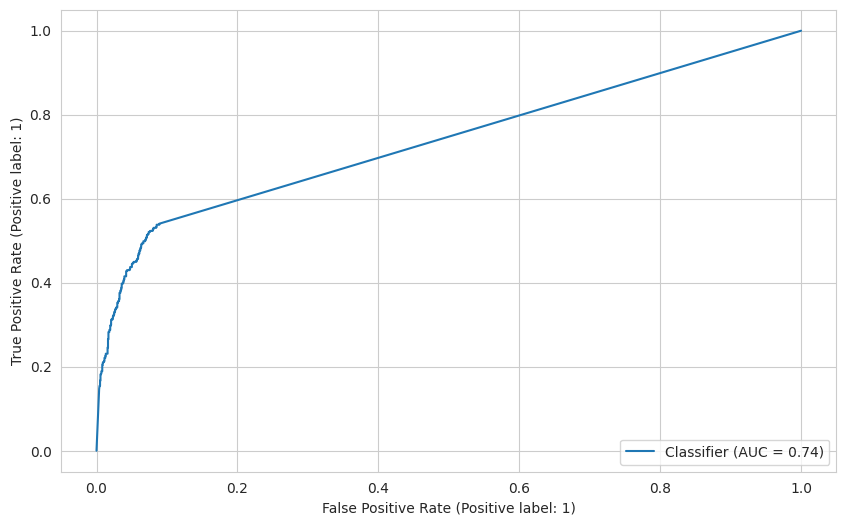

In [42]:
y_pred_proba = vanila_model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

In [43]:
balanced_model = Sequential(
    [
        Input(shape=X_train.shape[1]),
        Dense(units=72, activation="relu"),
        Dense(units=36, activation="relu"),
        Dense(units=12, activation="relu"),
        Dense(units=3, activation="relu"),
        Dense(units=1,activation='sigmoid'),
    ]
)
balanced_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 72)                1008      
                                                                 
 dense_6 (Dense)             (None, 36)                2628      
                                                                 
 dense_7 (Dense)             (None, 12)                444       
                                                                 
 dense_8 (Dense)             (None, 3)                 39        
                                                                 
 dense_9 (Dense)             (None, 1)                 4         
                                                                 
Total params: 4123 (16.11 KB)
Trainable params: 4123 (16.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
from sklearn.utils.class_weight import compute_class_weight
weights = class_weight.compute_class_weight(class_weight = "balanced", classes= np.unique(y_train), y= y_train)
weights = dict(enumerate(weights))
weights

{0: 0.6279434850863422, 1: 2.4539877300613497}

In [45]:
balanced_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Recall'])
balanced_model.fit(x=X_train, y=y_train, epochs=150, batch_size=100, workers=-1, validation_split=0.2, class_weight=weights)

Epoch 1/150
64/64 [==============================] - 2s 10ms/step - loss: 0.6519 - recall: 0.8634 - val_loss: 0.7366 - val_recall: 0.8156
Epoch 2/150
64/64 [==============================] - 0s 7ms/step - loss: 0.6109 - recall: 0.7847 - val_loss: 0.7078 - val_recall: 0.7688
Epoch 3/150
64/64 [==============================] - 0s 7ms/step - loss: 0.5773 - recall: 0.7687 - val_loss: 0.6579 - val_recall: 0.7750
Epoch 4/150
64/64 [==============================] - 0s 6ms/step - loss: 0.5538 - recall: 0.7733 - val_loss: 0.6410 - val_recall: 0.7719
Epoch 5/150
64/64 [==============================] - 0s 6ms/step - loss: 0.5400 - recall: 0.7718 - val_loss: 0.6206 - val_recall: 0.7500
Epoch 6/150
64/64 [==============================] - 0s 6ms/step - loss: 0.5282 - recall: 0.7672 - val_loss: 0.6146 - val_recall: 0.7656
Epoch 7/150
64/64 [==============================] - 0s 4ms/step - loss: 0.5195 - recall: 0.7595 - val_loss: 0.6062 - val_recall: 0.7500
Epoch 8/150
64/64 [=====================

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

<Axes: >

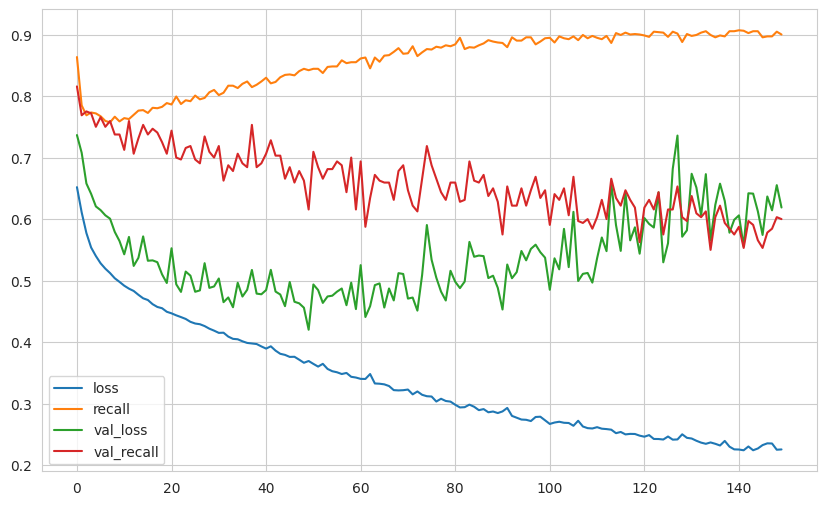

In [46]:
loss_df = pd.DataFrame(balanced_model.history.history)
loss_df.plot()

In [47]:
loss, recall = balanced_model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.6552250385284424
recall:  0.5651105642318726


In [48]:
y_pred= (balanced_model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_test,y_pred))

63/63 [==============================] - 0s 2ms/step
[[1399  177]
 [ 194  230]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      1593
           1       0.54      0.57      0.55       407

    accuracy                           0.81      2000
   macro avg       0.72      0.72      0.72      2000
weighted avg       0.82      0.81      0.82      2000



63/63 [==============================] - 0s 2ms/step


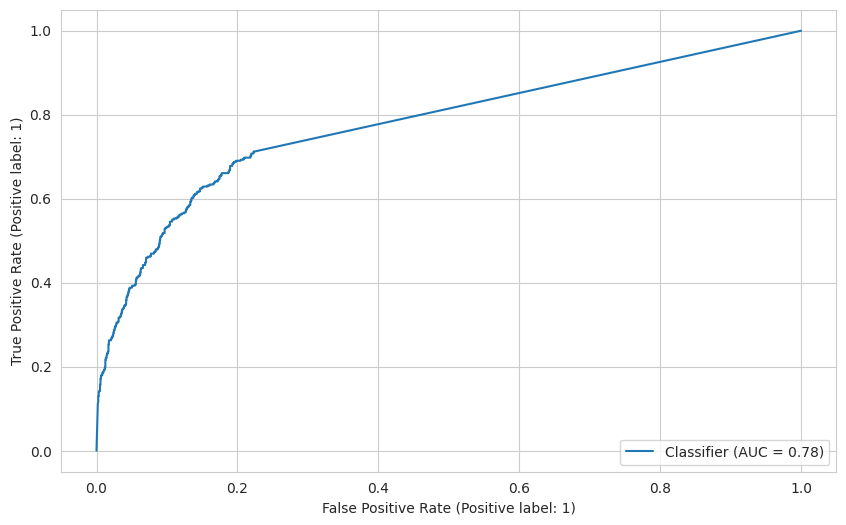

In [49]:
y_pred_proba = balanced_model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method

### Increase The Learning Rate and Observe The Results

In [50]:
learning_rate_model = Sequential(
    [
        Input(shape=X_train.shape[1]),
        Dense(units=72, activation="relu"),
        Dense(units=36, activation="relu"),
        Dense(units=12, activation="relu"),
        Dense(units=3, activation="relu"),
        Dense(units=1,activation='sigmoid'),
    ]
)
learning_rate_model.summary()

weights = class_weight.compute_class_weight(class_weight = "balanced", classes= np.unique(y_train), y= y_train)
weights = dict(enumerate(weights))

opt = Adam(learning_rate=0.025)
learning_rate_model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['Recall'])



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 72)                1008      
                                                                 
 dense_11 (Dense)            (None, 36)                2628      
                                                                 
 dense_12 (Dense)            (None, 12)                444       
                                                                 
 dense_13 (Dense)            (None, 3)                 39        
                                                                 
 dense_14 (Dense)            (None, 1)                 4         
                                                                 
Total params: 4123 (16.11 KB)
Trainable params: 4123 (16.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [51]:
learning_rate_model.fit(x=X_train, y=y_train, epochs=150, batch_size=100, workers=-1, validation_split=0.2)

Epoch 1/150
64/64 [==============================] - 2s 7ms/step - loss: 0.5645 - recall: 0.0214 - val_loss: 0.5046 - val_recall: 0.0000e+00
Epoch 2/150
64/64 [==============================] - 0s 4ms/step - loss: 0.5075 - recall: 0.0000e+00 - val_loss: 0.5005 - val_recall: 0.0000e+00
Epoch 3/150
64/64 [==============================] - 0s 5ms/step - loss: 0.5072 - recall: 0.0000e+00 - val_loss: 0.5008 - val_recall: 0.0000e+00
Epoch 4/150
64/64 [==============================] - 0s 4ms/step - loss: 0.5069 - recall: 0.0000e+00 - val_loss: 0.5004 - val_recall: 0.0000e+00
Epoch 5/150
64/64 [==============================] - 0s 6ms/step - loss: 0.5070 - recall: 0.0000e+00 - val_loss: 0.5004 - val_recall: 0.0000e+00
Epoch 6/150
64/64 [==============================] - 0s 6ms/step - loss: 0.5069 - recall: 0.0000e+00 - val_loss: 0.5005 - val_recall: 0.0000e+00
Epoch 7/150
64/64 [==============================] - 0s 6ms/step - loss: 0.5070 - recall: 0.0000e+00 - val_loss: 0.5005 - val_recall: 

<Axes: >

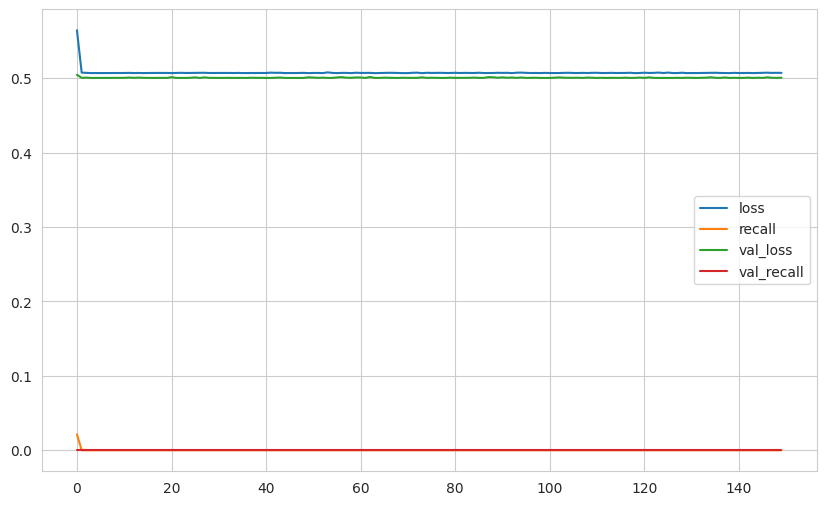

In [52]:
loss_df = pd.DataFrame(learning_rate_model.history.history)
loss_df.plot()

In [53]:
loss, recall = learning_rate_model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.5053427219390869
recall:  0.0


In [54]:
y_pred= (learning_rate_model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_test,y_pred))

63/63 [==============================] - 0s 2ms/step
[[1593  407]
 [   0    0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1593
           1       0.00      0.00      0.00       407

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.71      2000



63/63 [==============================] - 0s 2ms/step


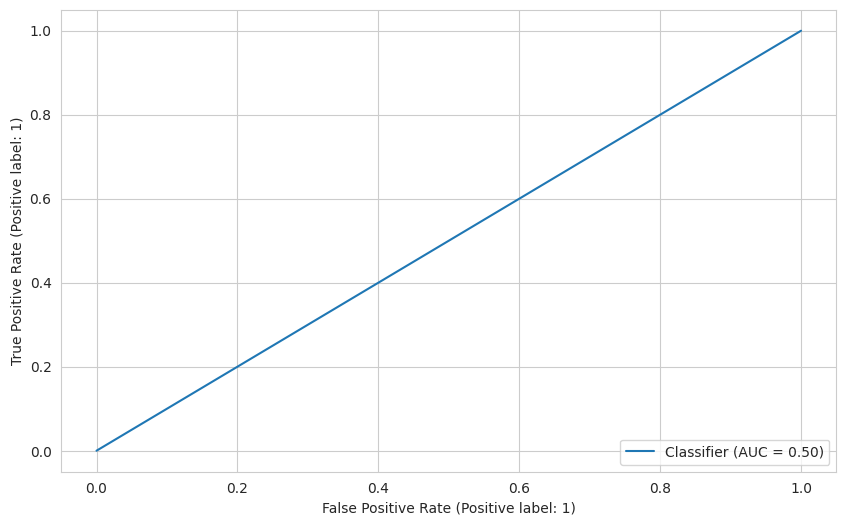

In [55]:
y_pred_proba = learning_rate_model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

### Add Dropout Layer

In [56]:
dropout_model = Sequential(
    [
        Input(shape=X_train.shape[1]),
        Dense(units=72, activation="relu"),
        Dropout(0.2),

        Dense(units=36, activation="relu"),
        Dropout(0.2),

        Dense(units=12, activation="relu"),
        Dense(units=3, activation="relu"),
        Dense(units=1,activation='sigmoid'),
    ]
)
dropout_model.summary()

weights = class_weight.compute_class_weight(class_weight = "balanced", classes= np.unique(y_train), y= y_train)
weights = dict(enumerate(weights))

opt = Adam(learning_rate=0.025)
dropout_model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['Recall'])



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 72)                1008      
                                                                 
 dropout (Dropout)           (None, 72)                0         
                                                                 
 dense_16 (Dense)            (None, 36)                2628      
                                                                 
 dropout_1 (Dropout)         (None, 36)                0         
                                                                 
 dense_17 (Dense)            (None, 12)                444       
                                                                 
 dense_18 (Dense)            (None, 3)                 39        
                                                                 
 dense_19 (Dense)            (None, 1)                

In [57]:
dropout_model.fit(x=X_train, y=y_train, epochs=150, batch_size=100, workers=-1, validation_split=0.2, class_weight=weights,)

Epoch 1/150
64/64 [==============================] - 3s 7ms/step - loss: 0.5991 - recall: 0.6725 - val_loss: 0.4908 - val_recall: 0.7219
Epoch 2/150
64/64 [==============================] - 0s 5ms/step - loss: 0.5160 - recall: 0.7092 - val_loss: 0.4664 - val_recall: 0.7531
Epoch 3/150
64/64 [==============================] - 0s 5ms/step - loss: 0.5172 - recall: 0.7206 - val_loss: 0.4943 - val_recall: 0.7656
Epoch 4/150
64/64 [==============================] - 0s 4ms/step - loss: 0.4981 - recall: 0.7481 - val_loss: 0.4171 - val_recall: 0.7125
Epoch 5/150
64/64 [==============================] - 0s 5ms/step - loss: 0.4921 - recall: 0.7580 - val_loss: 0.4505 - val_recall: 0.7094
Epoch 6/150
64/64 [==============================] - 0s 5ms/step - loss: 0.4906 - recall: 0.7412 - val_loss: 0.4172 - val_recall: 0.7781
Epoch 7/150
64/64 [==============================] - 0s 4ms/step - loss: 0.4866 - recall: 0.7641 - val_loss: 0.4505 - val_recall: 0.7375
Epoch 8/150
64/64 [======================

<Axes: >

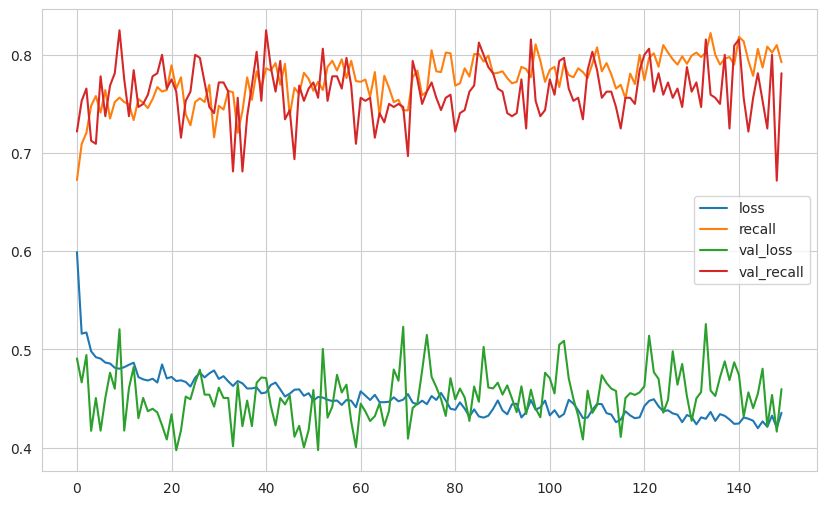

In [58]:
loss_df = pd.DataFrame(dropout_model.history.history)
loss_df.plot()

In [59]:
loss, recall = dropout_model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.4805409908294678
recall:  0.8009827733039856


In [60]:
y_pred= (dropout_model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_test,y_pred))

63/63 [==============================] - 0s 2ms/step
[[1175   81]
 [ 418  326]]
              precision    recall  f1-score   support

           0       0.94      0.74      0.82      1593
           1       0.44      0.80      0.57       407

    accuracy                           0.75      2000
   macro avg       0.69      0.77      0.70      2000
weighted avg       0.83      0.75      0.77      2000



63/63 [==============================] - 0s 2ms/step


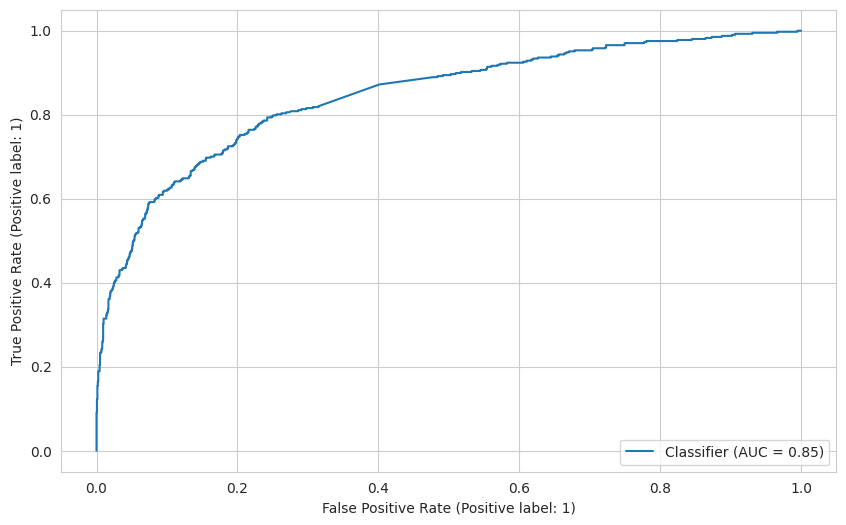

In [61]:
y_pred_proba = dropout_model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

### Add Early Stop

#### Monitor the "val_loss" as metric

In [62]:
early_stop_model = Sequential(
    [
        Input(shape=X_train.shape[1]),
        Dense(units=72, activation="relu"),
        Dropout(0.2),

        Dense(units=36, activation="relu"),
        Dropout(0.2),

        Dense(units=12, activation="relu"),
        Dense(units=3, activation="relu"),
        Dense(units=1,activation='sigmoid'),
    ]
)
early_stop_model.summary()

weights = class_weight.compute_class_weight(class_weight = "balanced", classes= np.unique(y_train), y= y_train)
weights = dict(enumerate(weights))
weights


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 72)                1008      
                                                                 
 dropout_2 (Dropout)         (None, 72)                0         
                                                                 
 dense_21 (Dense)            (None, 36)                2628      
                                                                 
 dropout_3 (Dropout)         (None, 36)                0         
                                                                 
 dense_22 (Dense)            (None, 12)                444       
                                                                 
 dense_23 (Dense)            (None, 3)                 39        
                                                                 
 dense_24 (Dense)            (None, 1)                

{0: 0.6279434850863422, 1: 2.4539877300613497}

In [63]:
opt = Adam(learning_rate=0.025)
early_stop_model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['Recall'])
early_stop = EarlyStopping(monitor="val_loss", mode="min", patience=10, restore_best_weights=True)

In [64]:
early_stop_model.fit(x=X_train, y=y_train, epochs=150, batch_size=100, validation_split=0.2, class_weight=weights, callbacks=[early_stop])

Epoch 1/150
64/64 [==============================] - 2s 8ms/step - loss: 0.6272 - recall: 0.7550 - val_loss: 0.5433 - val_recall: 0.7594
Epoch 2/150
64/64 [==============================] - 0s 5ms/step - loss: 0.5672 - recall: 0.7992 - val_loss: 0.5240 - val_recall: 0.8094
Epoch 3/150
64/64 [==============================] - 0s 5ms/step - loss: 0.5533 - recall: 0.8099 - val_loss: 0.4935 - val_recall: 0.7719
Epoch 4/150
64/64 [==============================] - 0s 5ms/step - loss: 0.5329 - recall: 0.7824 - val_loss: 0.4648 - val_recall: 0.7750
Epoch 5/150
64/64 [==============================] - 0s 5ms/step - loss: 0.5213 - recall: 0.8008 - val_loss: 0.4543 - val_recall: 0.7812
Epoch 6/150
64/64 [==============================] - 0s 5ms/step - loss: 0.5218 - recall: 0.7924 - val_loss: 0.4660 - val_recall: 0.7906
Epoch 7/150
64/64 [==============================] - 0s 5ms/step - loss: 0.5152 - recall: 0.7832 - val_loss: 0.4071 - val_recall: 0.7094
Epoch 8/150
64/64 [======================

<Axes: >

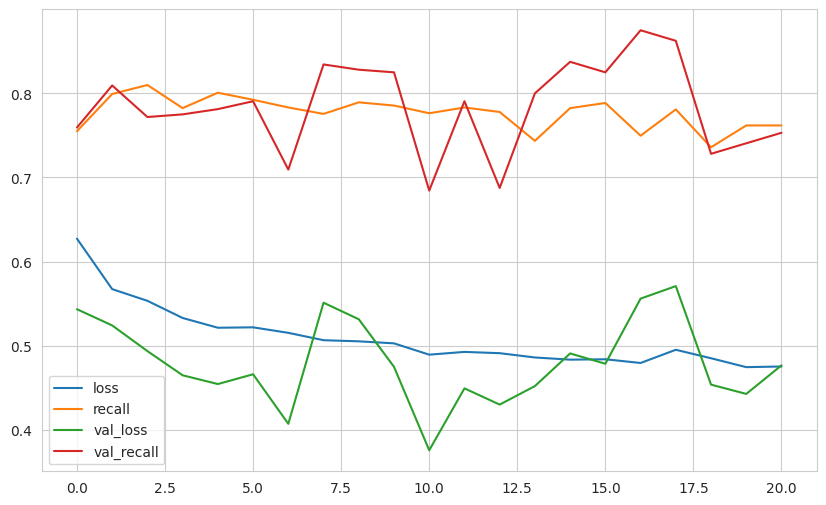

In [65]:
loss_df = pd.DataFrame(early_stop_model.history.history)
loss_df.plot()

In [66]:
loss, recall = early_stop_model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.40000322461128235
recall:  0.6953316926956177


In [67]:
y_pred= (early_stop_model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_test,y_pred))

63/63 [==============================] - 0s 2ms/step
[[1339  124]
 [ 254  283]]
              precision    recall  f1-score   support

           0       0.92      0.84      0.88      1593
           1       0.53      0.70      0.60       407

    accuracy                           0.81      2000
   macro avg       0.72      0.77      0.74      2000
weighted avg       0.84      0.81      0.82      2000



63/63 [==============================] - 0s 2ms/step


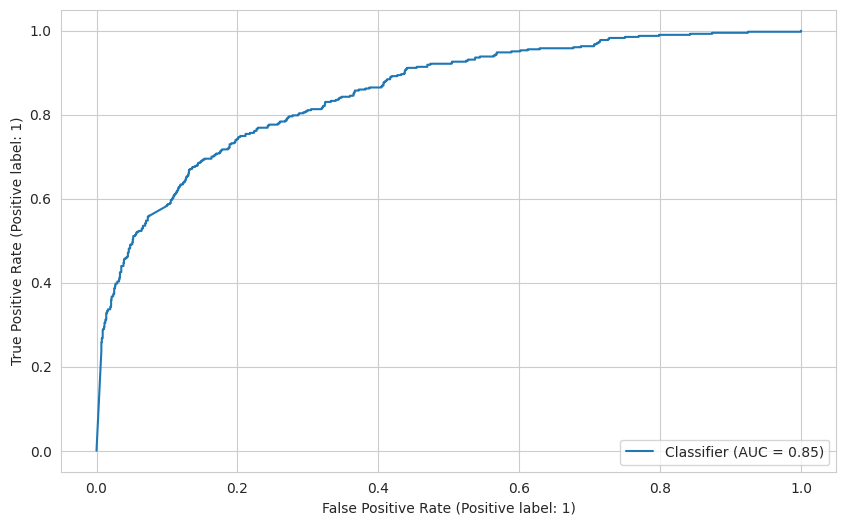

In [68]:
y_pred_proba = early_stop_model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

#### Monitor the "val_recall" as metric

In [69]:
early_stop_model_2 = Sequential(
    [
        Input(shape=X_train.shape[1]),
        Dense(units=72, activation="relu"),
        Dropout(0.2),

        Dense(units=36, activation="relu"),
        Dropout(0.2),

        Dense(units=12, activation="relu"),
        Dense(units=3, activation="relu"),
        Dense(units=1,activation='sigmoid'),
    ]
)
early_stop_model_2.summary()

weights = class_weight.compute_class_weight(class_weight = "balanced", classes= np.unique(y_train), y= y_train)
weights = dict(enumerate(weights))

opt = Adam(learning_rate=0.025)
early_stop_model_2.compile(optimizer=opt, loss='binary_crossentropy', metrics=['Recall'])
early_stop = EarlyStopping(monitor="val_recall", mode="min", patience=10, restore_best_weights=True)


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 72)                1008      
                                                                 
 dropout_4 (Dropout)         (None, 72)                0         
                                                                 
 dense_26 (Dense)            (None, 36)                2628      
                                                                 
 dropout_5 (Dropout)         (None, 36)                0         
                                                                 
 dense_27 (Dense)            (None, 12)                444       
                                                                 
 dense_28 (Dense)            (None, 3)                 39        
                                                                 
 dense_29 (Dense)            (None, 1)                

In [70]:
early_stop_model_2.fit(x=X_train, y=y_train, epochs=150, batch_size=100, workers=-1, validation_split=0.2, class_weight=weights, callbacks=[early_stop])

Epoch 1/150
64/64 [==============================] - 2s 8ms/step - loss: 0.6065 - recall: 0.6649 - val_loss: 0.5041 - val_recall: 0.7750
Epoch 2/150
64/64 [==============================] - 0s 5ms/step - loss: 0.5184 - recall: 0.7466 - val_loss: 0.4676 - val_recall: 0.7437
Epoch 3/150
64/64 [==============================] - 0s 5ms/step - loss: 0.5127 - recall: 0.7122 - val_loss: 0.5133 - val_recall: 0.8094
Epoch 4/150
64/64 [==============================] - 0s 5ms/step - loss: 0.5041 - recall: 0.7260 - val_loss: 0.4331 - val_recall: 0.7125
Epoch 5/150
64/64 [==============================] - 0s 5ms/step - loss: 0.4961 - recall: 0.7374 - val_loss: 0.4445 - val_recall: 0.6625
Epoch 6/150
64/64 [==============================] - 0s 4ms/step - loss: 0.4947 - recall: 0.7221 - val_loss: 0.4461 - val_recall: 0.7594
Epoch 7/150
64/64 [==============================] - 0s 5ms/step - loss: 0.4854 - recall: 0.7328 - val_loss: 0.4701 - val_recall: 0.7500
Epoch 8/150
64/64 [======================

<Axes: >

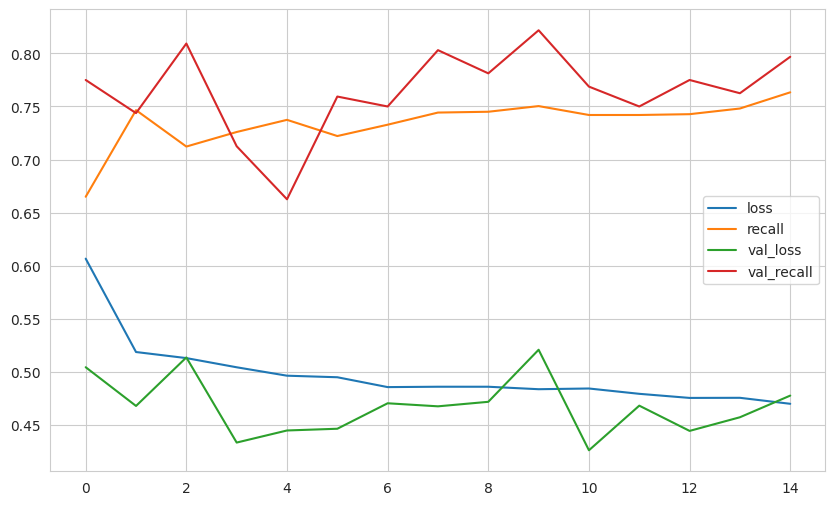

In [71]:
loss_df = pd.DataFrame(early_stop_model_2.history.history)
loss_df.plot()

In [72]:
loss, recall = early_stop_model_2.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.45220351219177246
recall:  0.6412776708602905


In [73]:
y_pred= (early_stop_model_2.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_test,y_pred))

63/63 [==============================] - 0s 2ms/step
[[1395  146]
 [ 198  261]]
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      1593
           1       0.57      0.64      0.60       407

    accuracy                           0.83      2000
   macro avg       0.74      0.76      0.75      2000
weighted avg       0.84      0.83      0.83      2000



63/63 [==============================] - 0s 2ms/step


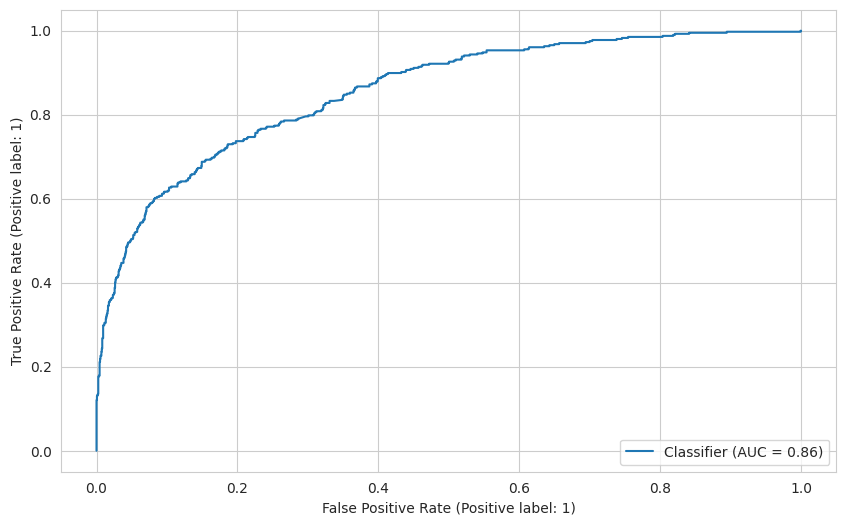

In [74]:
y_pred_proba = early_stop_model_2.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

## Optuna

In [75]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 11.8 MB/s eta 0:00:00


In [76]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
import optuna

In [77]:
early_stop = EarlyStopping(
    monitor= "val_loss", mode="min", verbose=1, patience=7, restore_best_weights=True
)

trial_metric = "Recall"
batch_size = 64
seed=42

def create_model(trial):
    # Some hyperparameters we want to optimize
    n_units1 = trial.suggest_int("n_units1", 0, 144)
    n_units2 = trial.suggest_int("n_units2", 0, 72)
    n_units3 = trial.suggest_int("n_units3", 0, 24)
    n_units4 = trial.suggest_int("n_units4", 0, 6)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1.3e-1)
    dropout1 = trial.suggest_float("dropout1", 0.1, 0.5)
    dropout2 = trial.suggest_float("dropout2", 0.1, 0.5)


    tf.random.set_seed(seed)
    model = Sequential()

    model.add(Dense(n_units1, input_dim=X_train.shape[1], activation="relu"))
    model.add(Dropout(dropout1))

    model.add(Dense(n_units2, activation="relu"))
    model.add(Dropout(dropout2))

    model.add(Dense(n_units3, activation="relu"))

    model.add(Dense(n_units4, activation="relu"))

    model.add(Dense(1, activation="sigmoid"))

    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric],
    )
    return model


def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 3)
    w1 = trial.suggest_loguniform("w1", 0.01, 3)
    model.fit(
        X_train,
        y_train,
        validation_split=0.2,
        batch_size=batch_size,
        epochs=30,
        callbacks=[early_stop],
        class_weight={0: w0, 1: w1},
        verbose=2
    )
    score = model.evaluate(X_test, y_test, verbose=0)[1]
    return score

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)
study.best_params

[I 2023-10-31 04:15:35,225] A new study created in memory with name: no-name-9744cf95-b67d-462f-a528-f654ac832ee7


Epoch 1/30
100/100 - 3s - loss: 0.3138 - recall: 0.0137 - val_loss: 0.6958 - val_recall: 0.0000e+00 - 3s/epoch - 34ms/step
Epoch 2/30
100/100 - 1s - loss: 0.1513 - recall: 0.0000e+00 - val_loss: 0.7043 - val_recall: 0.0000e+00 - 684ms/epoch - 7ms/step
Epoch 3/30
100/100 - 1s - loss: 0.1424 - recall: 0.0000e+00 - val_loss: 0.6737 - val_recall: 0.0000e+00 - 523ms/epoch - 5ms/step
Epoch 4/30
100/100 - 1s - loss: 0.1390 - recall: 0.0000e+00 - val_loss: 0.6819 - val_recall: 0.0000e+00 - 508ms/epoch - 5ms/step
Epoch 5/30
100/100 - 0s - loss: 0.1379 - recall: 0.0000e+00 - val_loss: 0.6678 - val_recall: 0.0000e+00 - 399ms/epoch - 4ms/step
Epoch 6/30
100/100 - 0s - loss: 0.1351 - recall: 0.0000e+00 - val_loss: 0.6469 - val_recall: 0.0000e+00 - 376ms/epoch - 4ms/step
Epoch 7/30
100/100 - 0s - loss: 0.1327 - recall: 0.0000e+00 - val_loss: 0.6318 - val_recall: 0.0000e+00 - 368ms/epoch - 4ms/step
Epoch 8/30
100/100 - 1s - loss: 0.1330 - recall: 0.0000e+00 - val_loss: 0.6291 - val_recall: 0.0000e+00

[I 2023-10-31 04:15:59,778] Trial 0 finished with value: 0.024570023640990257 and parameters: {'n_units1': 126, 'n_units2': 45, 'n_units3': 22, 'n_units4': 6, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.0003287333098469319, 'dropout1': 0.10111529703537206, 'dropout2': 0.47279221966217166, 'w0': 1.4302576402378013, 'w1': 0.15123479629262568}. Best is trial 0 with value: 0.024570023640990257.


Epoch 1/30
100/100 - 8s - loss: 1.1603 - recall: 0.7359 - val_loss: 0.6881 - val_recall: 0.2688 - 8s/epoch - 80ms/step
Epoch 2/30
100/100 - 1s - loss: 1.1037 - recall: 0.4427 - val_loss: 0.6802 - val_recall: 0.0875 - 952ms/epoch - 10ms/step
Epoch 3/30
100/100 - 1s - loss: 1.0932 - recall: 0.3405 - val_loss: 0.6735 - val_recall: 0.0812 - 869ms/epoch - 9ms/step
Epoch 4/30
100/100 - 1s - loss: 1.0847 - recall: 0.2847 - val_loss: 0.6669 - val_recall: 0.0750 - 639ms/epoch - 6ms/step
Epoch 5/30
100/100 - 0s - loss: 1.0791 - recall: 0.2580 - val_loss: 0.6599 - val_recall: 0.0875 - 465ms/epoch - 5ms/step
Epoch 6/30
100/100 - 0s - loss: 1.0672 - recall: 0.2939 - val_loss: 0.6523 - val_recall: 0.1875 - 443ms/epoch - 4ms/step
Epoch 7/30
100/100 - 0s - loss: 1.0604 - recall: 0.3321 - val_loss: 0.6446 - val_recall: 0.2781 - 431ms/epoch - 4ms/step
Epoch 8/30
100/100 - 0s - loss: 1.0520 - recall: 0.3679 - val_loss: 0.6363 - val_recall: 0.3187 - 457ms/epoch - 5ms/step
Epoch 9/30
100/100 - 0s - loss: 1

[I 2023-10-31 04:16:23,589] Trial 1 finished with value: 0.547911524772644 and parameters: {'n_units1': 84, 'n_units2': 65, 'n_units3': 2, 'n_units4': 5, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.00020227535980785807, 'dropout1': 0.4745175356521747, 'dropout2': 0.45117525158188254, 'w0': 1.2984136041429275, 'w1': 2.7396019055991845}. Best is trial 1 with value: 0.547911524772644.


Epoch 1/30
100/100 - 2s - loss: 0.0391 - recall: 0.4107 - val_loss: 0.6889 - val_recall: 0.4250 - 2s/epoch - 23ms/step
Epoch 2/30
100/100 - 0s - loss: 0.0387 - recall: 0.3237 - val_loss: 0.6854 - val_recall: 0.3187 - 409ms/epoch - 4ms/step
Epoch 3/30
100/100 - 0s - loss: 0.0382 - recall: 0.2641 - val_loss: 0.6807 - val_recall: 0.2219 - 381ms/epoch - 4ms/step
Epoch 4/30
100/100 - 0s - loss: 0.0377 - recall: 0.2221 - val_loss: 0.6744 - val_recall: 0.1344 - 412ms/epoch - 4ms/step
Epoch 5/30
100/100 - 0s - loss: 0.0369 - recall: 0.1740 - val_loss: 0.6668 - val_recall: 0.0719 - 381ms/epoch - 4ms/step
Epoch 6/30
100/100 - 0s - loss: 0.0363 - recall: 0.1229 - val_loss: 0.6582 - val_recall: 0.0406 - 361ms/epoch - 4ms/step
Epoch 7/30
100/100 - 0s - loss: 0.0354 - recall: 0.0794 - val_loss: 0.6484 - val_recall: 0.0188 - 389ms/epoch - 4ms/step
Epoch 8/30
100/100 - 0s - loss: 0.0344 - recall: 0.0565 - val_loss: 0.6374 - val_recall: 0.0094 - 396ms/epoch - 4ms/step
Epoch 9/30
100/100 - 0s - loss: 0.

[I 2023-10-31 04:16:39,193] Trial 2 finished with value: 0.0 and parameters: {'n_units1': 120, 'n_units2': 14, 'n_units3': 19, 'n_units4': 4, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 1.3135707122147334e-05, 'dropout1': 0.3624750936872274, 'dropout2': 0.4856105379090604, 'w0': 0.06995283818672421, 'w1': 0.011181490156649217}. Best is trial 1 with value: 0.547911524772644.


Epoch 1/30
100/100 - 2s - loss: 0.0699 - recall: 0.0122 - val_loss: 0.6564 - val_recall: 0.0000e+00 - 2s/epoch - 21ms/step
Epoch 2/30
100/100 - 0s - loss: 0.0657 - recall: 0.0000e+00 - val_loss: 0.6254 - val_recall: 0.0000e+00 - 398ms/epoch - 4ms/step
Epoch 3/30
100/100 - 0s - loss: 0.0621 - recall: 0.0000e+00 - val_loss: 0.5995 - val_recall: 0.0000e+00 - 399ms/epoch - 4ms/step
Epoch 4/30
100/100 - 0s - loss: 0.0589 - recall: 0.0000e+00 - val_loss: 0.5738 - val_recall: 0.0000e+00 - 384ms/epoch - 4ms/step
Epoch 5/30
100/100 - 0s - loss: 0.0556 - recall: 0.1267 - val_loss: 0.5328 - val_recall: 0.2625 - 373ms/epoch - 4ms/step
Epoch 6/30
100/100 - 0s - loss: 0.0528 - recall: 0.1962 - val_loss: 0.5088 - val_recall: 0.2969 - 371ms/epoch - 4ms/step
Epoch 7/30
100/100 - 0s - loss: 0.0504 - recall: 0.2076 - val_loss: 0.4922 - val_recall: 0.2906 - 373ms/epoch - 4ms/step
Epoch 8/30
100/100 - 0s - loss: 0.0484 - recall: 0.2382 - val_loss: 0.4769 - val_recall: 0.2969 - 381ms/epoch - 4ms/step
Epoch 

[I 2023-10-31 04:17:01,082] Trial 3 finished with value: 0.3611793518066406 and parameters: {'n_units1': 91, 'n_units2': 70, 'n_units3': 1, 'n_units4': 2, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.0013205460535092367, 'dropout1': 0.32476983927158304, 'dropout2': 0.13286815489644876, 'w0': 0.11184332949703849, 'w1': 0.07467278854728057}. Best is trial 1 with value: 0.547911524772644.


Epoch 1/30
100/100 - 3s - loss: 0.2404 - recall: 0.9672 - val_loss: 0.8245 - val_recall: 1.0000 - 3s/epoch - 34ms/step
Epoch 2/30
100/100 - 0s - loss: 0.2396 - recall: 1.0000 - val_loss: 0.8308 - val_recall: 1.0000 - 400ms/epoch - 4ms/step
Epoch 3/30
100/100 - 0s - loss: 0.2397 - recall: 1.0000 - val_loss: 0.7884 - val_recall: 1.0000 - 408ms/epoch - 4ms/step
Epoch 4/30
100/100 - 0s - loss: 0.2400 - recall: 1.0000 - val_loss: 0.7938 - val_recall: 1.0000 - 371ms/epoch - 4ms/step
Epoch 5/30
100/100 - 0s - loss: 0.2396 - recall: 1.0000 - val_loss: 0.7785 - val_recall: 1.0000 - 407ms/epoch - 4ms/step
Epoch 6/30
100/100 - 0s - loss: 0.2403 - recall: 0.9992 - val_loss: 0.8055 - val_recall: 1.0000 - 372ms/epoch - 4ms/step
Epoch 7/30
100/100 - 0s - loss: 0.2396 - recall: 1.0000 - val_loss: 0.8182 - val_recall: 1.0000 - 377ms/epoch - 4ms/step
Epoch 8/30
100/100 - 0s - loss: 0.2399 - recall: 1.0000 - val_loss: 0.8018 - val_recall: 1.0000 - 416ms/epoch - 4ms/step
Epoch 9/30
100/100 - 0s - loss: 0.

[I 2023-10-31 04:17:09,447] Trial 4 finished with value: 1.0 and parameters: {'n_units1': 62, 'n_units2': 55, 'n_units3': 21, 'n_units4': 6, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.07848061346180502, 'dropout1': 0.4923087664979471, 'dropout2': 0.25356624560574526, 'w0': 0.18361576827178241, 'w1': 1.009468157895714}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 2s - loss: 1.0012 - recall: 0.0000e+00 - val_loss: 0.5591 - val_recall: 0.0000e+00 - 2s/epoch - 21ms/step
Epoch 2/30
100/100 - 0s - loss: 0.8803 - recall: 0.0000e+00 - val_loss: 0.5164 - val_recall: 0.0000e+00 - 369ms/epoch - 4ms/step
Epoch 3/30
100/100 - 0s - loss: 0.8485 - recall: 0.0000e+00 - val_loss: 0.5053 - val_recall: 0.0000e+00 - 372ms/epoch - 4ms/step
Epoch 4/30
100/100 - 0s - loss: 0.8411 - recall: 0.0000e+00 - val_loss: 0.5021 - val_recall: 0.0000e+00 - 375ms/epoch - 4ms/step
Epoch 5/30
100/100 - 0s - loss: 0.8398 - recall: 0.0000e+00 - val_loss: 0.5012 - val_recall: 0.0000e+00 - 383ms/epoch - 4ms/step
Epoch 6/30
100/100 - 1s - loss: 0.8397 - recall: 0.0000e+00 - val_loss: 0.5011 - val_recall: 0.0000e+00 - 539ms/epoch - 5ms/step
Epoch 7/30
100/100 - 0s - loss: 0.8397 - recall: 0.0000e+00 - val_loss: 0.5010 - val_recall: 0.0000e+00 - 399ms/epoch - 4ms/step
Epoch 8/30
100/100 - 0s - loss: 0.8397 - recall: 0.0000e+00 - val_loss: 0.5011 - val_recall: 0.0000

[I 2023-10-31 04:17:31,198] Trial 5 finished with value: 0.0 and parameters: {'n_units1': 2, 'n_units2': 58, 'n_units3': 18, 'n_units4': 0, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.006756726583161699, 'dropout1': 0.3751546162182152, 'dropout2': 0.36948826711913874, 'w0': 1.5965259257978022, 'w1': 1.6916764674287261}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 2s - loss: 0.1425 - recall: 0.3046 - val_loss: 0.6935 - val_recall: 0.0844 - 2s/epoch - 21ms/step
Epoch 2/30
100/100 - 0s - loss: 0.1408 - recall: 0.1870 - val_loss: 0.6906 - val_recall: 0.0188 - 373ms/epoch - 4ms/step
Epoch 3/30
100/100 - 0s - loss: 0.1398 - recall: 0.1466 - val_loss: 0.6888 - val_recall: 0.0000e+00 - 370ms/epoch - 4ms/step
Epoch 4/30
100/100 - 0s - loss: 0.1392 - recall: 0.1076 - val_loss: 0.6872 - val_recall: 0.0000e+00 - 363ms/epoch - 4ms/step
Epoch 5/30
100/100 - 0s - loss: 0.1386 - recall: 0.0740 - val_loss: 0.6857 - val_recall: 0.0000e+00 - 378ms/epoch - 4ms/step
Epoch 6/30
100/100 - 0s - loss: 0.1381 - recall: 0.0595 - val_loss: 0.6842 - val_recall: 0.0000e+00 - 385ms/epoch - 4ms/step
Epoch 7/30
100/100 - 0s - loss: 0.1377 - recall: 0.0397 - val_loss: 0.6827 - val_recall: 0.0000e+00 - 358ms/epoch - 4ms/step
Epoch 8/30
100/100 - 0s - loss: 0.1373 - recall: 0.0298 - val_loss: 0.6812 - val_recall: 0.0000e+00 - 387ms/epoch - 4ms/step
Epoch 9/30

[I 2023-10-31 04:17:46,414] Trial 6 finished with value: 0.0 and parameters: {'n_units1': 65, 'n_units2': 47, 'n_units3': 1, 'n_units4': 5, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 3.586496683888022e-05, 'dropout1': 0.28759942041745123, 'dropout2': 0.46013071382439996, 'w0': 0.20791737146399022, 'w1': 0.17507815455030756}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 3s - loss: 0.0628 - recall: 0.6588 - val_loss: 0.7095 - val_recall: 0.6938 - 3s/epoch - 26ms/step
Epoch 2/30
100/100 - 0s - loss: 0.0628 - recall: 0.6786 - val_loss: 0.7100 - val_recall: 0.7063 - 388ms/epoch - 4ms/step
Epoch 3/30
100/100 - 0s - loss: 0.0629 - recall: 0.6634 - val_loss: 0.7105 - val_recall: 0.7125 - 360ms/epoch - 4ms/step
Epoch 4/30
100/100 - 0s - loss: 0.0627 - recall: 0.6641 - val_loss: 0.7110 - val_recall: 0.7219 - 368ms/epoch - 4ms/step
Epoch 5/30
100/100 - 0s - loss: 0.0626 - recall: 0.6832 - val_loss: 0.7115 - val_recall: 0.7344 - 395ms/epoch - 4ms/step
Epoch 6/30
100/100 - 0s - loss: 0.0627 - recall: 0.6718 - val_loss: 0.7120 - val_recall: 0.7406 - 380ms/epoch - 4ms/step
Epoch 7/30
100/100 - 0s - loss: 0.0625 - recall: 0.7038 - val_loss: 0.7124 - val_recall: 0.7500 - 391ms/epoch - 4ms/step
Epoch 8/30
Restoring model weights from the end of the best epoch: 1.
100/100 - 0s - loss: 0.0631 - recall: 0.6817 - val_loss: 0.7129 - val_recall: 0.7531 

[I 2023-10-31 04:17:52,739] Trial 7 finished with value: 0.7248157262802124 and parameters: {'n_units1': 16, 'n_units2': 18, 'n_units3': 24, 'n_units4': 5, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.002448055855701828, 'dropout1': 0.4211209548791186, 'dropout2': 0.32739782204306245, 'w0': 0.04659888280814101, 'w1': 0.264356712824875}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 4s - loss: 0.0134 - recall: 0.0000e+00 - val_loss: 0.4500 - val_recall: 0.0000e+00 - 4s/epoch - 39ms/step
Epoch 2/30
100/100 - 1s - loss: 0.0098 - recall: 0.0000e+00 - val_loss: 0.4550 - val_recall: 0.0000e+00 - 652ms/epoch - 7ms/step
Epoch 3/30
100/100 - 1s - loss: 0.0086 - recall: 0.0000e+00 - val_loss: 0.4748 - val_recall: 0.0000e+00 - 657ms/epoch - 7ms/step
Epoch 4/30
100/100 - 0s - loss: 0.0082 - recall: 0.0000e+00 - val_loss: 0.5077 - val_recall: 0.0000e+00 - 445ms/epoch - 4ms/step
Epoch 5/30
100/100 - 0s - loss: 0.0081 - recall: 0.0000e+00 - val_loss: 0.5054 - val_recall: 0.0000e+00 - 429ms/epoch - 4ms/step
Epoch 6/30
100/100 - 0s - loss: 0.0081 - recall: 0.0000e+00 - val_loss: 0.5063 - val_recall: 0.0000e+00 - 439ms/epoch - 4ms/step
Epoch 7/30
100/100 - 0s - loss: 0.0080 - recall: 0.0000e+00 - val_loss: 0.4994 - val_recall: 0.0000e+00 - 428ms/epoch - 4ms/step
Epoch 8/30
Restoring model weights from the end of the best epoch: 1.
100/100 - 0s - loss: 0.0081 -

[I 2023-10-31 04:18:00,637] Trial 8 finished with value: 0.0 and parameters: {'n_units1': 106, 'n_units2': 1, 'n_units3': 13, 'n_units4': 1, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.001876553470432832, 'dropout1': 0.21215076505330122, 'dropout2': 0.31222615536806375, 'w0': 0.0368433317958601, 'w1': 0.012272626959357852}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 2s - loss: 0.4653 - recall: 0.0107 - val_loss: 0.5949 - val_recall: 0.0000e+00 - 2s/epoch - 20ms/step
Epoch 2/30
100/100 - 0s - loss: 0.3576 - recall: 0.0000e+00 - val_loss: 0.5386 - val_recall: 0.0000e+00 - 372ms/epoch - 4ms/step
Epoch 3/30
100/100 - 0s - loss: 0.2829 - recall: 0.0000e+00 - val_loss: 0.5107 - val_recall: 0.0000e+00 - 385ms/epoch - 4ms/step
Epoch 4/30
100/100 - 0s - loss: 0.2312 - recall: 0.0000e+00 - val_loss: 0.5009 - val_recall: 0.0000e+00 - 362ms/epoch - 4ms/step
Epoch 5/30
100/100 - 0s - loss: 0.1950 - recall: 0.0000e+00 - val_loss: 0.5022 - val_recall: 0.0000e+00 - 381ms/epoch - 4ms/step
Epoch 6/30
100/100 - 0s - loss: 0.1694 - recall: 0.0000e+00 - val_loss: 0.5100 - val_recall: 0.0000e+00 - 381ms/epoch - 4ms/step
Epoch 7/30
100/100 - 0s - loss: 0.1509 - recall: 0.0000e+00 - val_loss: 0.5215 - val_recall: 0.0000e+00 - 393ms/epoch - 4ms/step
Epoch 8/30
100/100 - 0s - loss: 0.1374 - recall: 0.0000e+00 - val_loss: 0.5349 - val_recall: 0.0000e+00

[I 2023-10-31 04:18:12,109] Trial 9 finished with value: 0.0 and parameters: {'n_units1': 110, 'n_units2': 25, 'n_units3': 1, 'n_units4': 1, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.0040601739195166905, 'dropout1': 0.16071087956248126, 'dropout2': 0.2660384832639378, 'w0': 0.9390726703111101, 'w1': 0.09969000800497393}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 4s - loss: 0.0897 - recall: 0.9908 - val_loss: 1.5348 - val_recall: 1.0000 - 4s/epoch - 38ms/step
Epoch 2/30
100/100 - 1s - loss: 0.0549 - recall: 1.0000 - val_loss: 1.9287 - val_recall: 1.0000 - 884ms/epoch - 9ms/step
Epoch 3/30
100/100 - 1s - loss: 0.0548 - recall: 1.0000 - val_loss: 1.9673 - val_recall: 1.0000 - 697ms/epoch - 7ms/step
Epoch 4/30
100/100 - 1s - loss: 0.0550 - recall: 1.0000 - val_loss: 1.9168 - val_recall: 1.0000 - 675ms/epoch - 7ms/step
Epoch 5/30
100/100 - 1s - loss: 0.0549 - recall: 1.0000 - val_loss: 2.0610 - val_recall: 1.0000 - 719ms/epoch - 7ms/step
Epoch 6/30
100/100 - 1s - loss: 0.0550 - recall: 1.0000 - val_loss: 2.0568 - val_recall: 1.0000 - 637ms/epoch - 6ms/step
Epoch 7/30
100/100 - 1s - loss: 0.0551 - recall: 1.0000 - val_loss: 2.0870 - val_recall: 1.0000 - 636ms/epoch - 6ms/step
Epoch 8/30
Restoring model weights from the end of the best epoch: 1.
100/100 - 1s - loss: 0.0549 - recall: 1.0000 - val_loss: 1.9307 - val_recall: 1.0000 

[I 2023-10-31 04:18:22,640] Trial 10 finished with value: 1.0 and parameters: {'n_units1': 48, 'n_units2': 36, 'n_units3': 9, 'n_units4': 3, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.12932906048754209, 'dropout1': 0.48961848026473725, 'dropout2': 0.2237163866071007, 'w0': 0.019880904846556788, 'w1': 0.8709652048856096}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 3s - loss: 0.0876 - recall: 1.0000 - val_loss: 1.9718 - val_recall: 1.0000 - 3s/epoch - 30ms/step
Epoch 2/30
100/100 - 0s - loss: 0.0425 - recall: 0.9992 - val_loss: 1.8650 - val_recall: 0.9969 - 368ms/epoch - 4ms/step
Epoch 3/30
100/100 - 0s - loss: 0.0442 - recall: 0.9954 - val_loss: 1.8147 - val_recall: 1.0000 - 366ms/epoch - 4ms/step
Epoch 4/30
100/100 - 0s - loss: 0.0408 - recall: 1.0000 - val_loss: 1.8824 - val_recall: 1.0000 - 369ms/epoch - 4ms/step
Epoch 5/30
100/100 - 0s - loss: 0.0399 - recall: 1.0000 - val_loss: 1.7559 - val_recall: 1.0000 - 381ms/epoch - 4ms/step
Epoch 6/30
100/100 - 0s - loss: 0.0402 - recall: 1.0000 - val_loss: 1.9721 - val_recall: 1.0000 - 370ms/epoch - 4ms/step
Epoch 7/30
100/100 - 0s - loss: 0.0402 - recall: 1.0000 - val_loss: 2.4044 - val_recall: 1.0000 - 366ms/epoch - 4ms/step
Epoch 8/30
100/100 - 0s - loss: 0.0398 - recall: 1.0000 - val_loss: 1.5245 - val_recall: 1.0000 - 379ms/epoch - 4ms/step
Epoch 9/30
100/100 - 0s - loss: 0.

[I 2023-10-31 04:18:36,043] Trial 11 finished with value: 1.0 and parameters: {'n_units1': 44, 'n_units2': 35, 'n_units3': 8, 'n_units4': 3, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.12794949630818706, 'dropout1': 0.49064865352959725, 'dropout2': 0.21431744308723372, 'w0': 0.013928543828614933, 'w1': 0.9850918066308557}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 2s - loss: 0.0386 - recall: 0.9855 - val_loss: 2.2005 - val_recall: 1.0000 - 2s/epoch - 23ms/step
Epoch 2/30
100/100 - 0s - loss: 0.0322 - recall: 1.0000 - val_loss: 2.3038 - val_recall: 1.0000 - 351ms/epoch - 4ms/step
Epoch 3/30
100/100 - 0s - loss: 0.0321 - recall: 1.0000 - val_loss: 2.3424 - val_recall: 1.0000 - 366ms/epoch - 4ms/step
Epoch 4/30
100/100 - 0s - loss: 0.0322 - recall: 1.0000 - val_loss: 2.2921 - val_recall: 1.0000 - 358ms/epoch - 4ms/step
Epoch 5/30
100/100 - 0s - loss: 0.0322 - recall: 1.0000 - val_loss: 2.4284 - val_recall: 1.0000 - 374ms/epoch - 4ms/step
Epoch 6/30
100/100 - 0s - loss: 0.0322 - recall: 1.0000 - val_loss: 2.4251 - val_recall: 1.0000 - 403ms/epoch - 4ms/step
Epoch 7/30
100/100 - 0s - loss: 0.0322 - recall: 1.0000 - val_loss: 2.4489 - val_recall: 1.0000 - 368ms/epoch - 4ms/step
Epoch 8/30
Restoring model weights from the end of the best epoch: 1.
100/100 - 0s - loss: 0.0322 - recall: 1.0000 - val_loss: 2.3076 - val_recall: 1.0000 

[I 2023-10-31 04:18:41,670] Trial 12 finished with value: 1.0 and parameters: {'n_units1': 49, 'n_units2': 51, 'n_units3': 9, 'n_units4': 3, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.11654105481729585, 'dropout1': 0.4933906421198901, 'dropout2': 0.2060397946849969, 'w0': 0.010221298952547399, 'w1': 0.7377361780080947}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 2s - loss: 0.1902 - recall: 0.5328 - val_loss: 0.4133 - val_recall: 0.3562 - 2s/epoch - 18ms/step
Epoch 2/30
100/100 - 0s - loss: 0.1778 - recall: 0.5679 - val_loss: 0.4460 - val_recall: 0.6750 - 360ms/epoch - 4ms/step
Epoch 3/30
100/100 - 0s - loss: 0.1712 - recall: 0.5466 - val_loss: 0.3946 - val_recall: 0.5875 - 386ms/epoch - 4ms/step
Epoch 4/30
100/100 - 0s - loss: 0.1648 - recall: 0.5679 - val_loss: 0.3692 - val_recall: 0.5344 - 363ms/epoch - 4ms/step
Epoch 5/30
100/100 - 0s - loss: 0.1630 - recall: 0.5771 - val_loss: 0.3904 - val_recall: 0.5094 - 378ms/epoch - 4ms/step
Epoch 6/30
100/100 - 0s - loss: 0.1610 - recall: 0.5641 - val_loss: 0.4017 - val_recall: 0.6562 - 390ms/epoch - 4ms/step
Epoch 7/30
100/100 - 0s - loss: 0.1597 - recall: 0.5557 - val_loss: 0.4132 - val_recall: 0.5938 - 384ms/epoch - 4ms/step
Epoch 8/30
100/100 - 0s - loss: 0.1580 - recall: 0.5267 - val_loss: 0.3830 - val_recall: 0.5406 - 374ms/epoch - 4ms/step
Epoch 9/30
100/100 - 0s - loss: 0.

[I 2023-10-31 04:18:53,058] Trial 13 finished with value: 0.4201474189758301 and parameters: {'n_units1': 33, 'n_units2': 34, 'n_units3': 14, 'n_units4': 4, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.024466177328454155, 'dropout1': 0.4357888463551238, 'dropout2': 0.11494609057318803, 'w0': 0.2662764014581568, 'w1': 0.556613966158977}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 2s - loss: 0.6376 - recall: 0.1649 - val_loss: 0.6368 - val_recall: 0.3375 - 2s/epoch - 20ms/step
Epoch 2/30
100/100 - 0s - loss: 0.6079 - recall: 0.2794 - val_loss: 0.6617 - val_recall: 0.5031 - 366ms/epoch - 4ms/step
Epoch 3/30
100/100 - 0s - loss: 0.5877 - recall: 0.3847 - val_loss: 0.6842 - val_recall: 0.6344 - 376ms/epoch - 4ms/step
Epoch 4/30
100/100 - 0s - loss: 0.5736 - recall: 0.4916 - val_loss: 0.7053 - val_recall: 0.7844 - 383ms/epoch - 4ms/step
Epoch 5/30
100/100 - 0s - loss: 0.5613 - recall: 0.5916 - val_loss: 0.7241 - val_recall: 0.8562 - 379ms/epoch - 4ms/step
Epoch 6/30
100/100 - 0s - loss: 0.5495 - recall: 0.6573 - val_loss: 0.7426 - val_recall: 0.9125 - 392ms/epoch - 4ms/step
Epoch 7/30
100/100 - 0s - loss: 0.5418 - recall: 0.7412 - val_loss: 0.7603 - val_recall: 0.9563 - 382ms/epoch - 4ms/step
Epoch 8/30
Restoring model weights from the end of the best epoch: 1.
100/100 - 0s - loss: 0.5355 - recall: 0.7977 - val_loss: 0.7760 - val_recall: 0.9750 

[I 2023-10-31 04:18:59,430] Trial 14 finished with value: 0.30958232283592224 and parameters: {'n_units1': 66, 'n_units2': 57, 'n_units3': 7, 'n_units4': 6, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.03220640910737238, 'dropout1': 0.43943331769876404, 'dropout2': 0.2358852571065267, 'w0': 0.37133887785638037, 'w1': 2.558038657387582}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 2s - loss: 0.0586 - recall: 0.9855 - val_loss: 1.4102 - val_recall: 1.0000 - 2s/epoch - 17ms/step
Epoch 2/30
100/100 - 0s - loss: 0.0522 - recall: 1.0000 - val_loss: 1.4870 - val_recall: 1.0000 - 389ms/epoch - 4ms/step
Epoch 3/30
100/100 - 1s - loss: 0.0522 - recall: 1.0000 - val_loss: 1.4904 - val_recall: 1.0000 - 557ms/epoch - 6ms/step
Epoch 4/30
100/100 - 1s - loss: 0.0522 - recall: 1.0000 - val_loss: 1.4372 - val_recall: 1.0000 - 587ms/epoch - 6ms/step
Epoch 5/30
100/100 - 1s - loss: 0.0522 - recall: 1.0000 - val_loss: 1.4554 - val_recall: 1.0000 - 514ms/epoch - 5ms/step
Epoch 6/30
100/100 - 1s - loss: 0.0522 - recall: 1.0000 - val_loss: 1.4807 - val_recall: 1.0000 - 527ms/epoch - 5ms/step
Epoch 7/30
100/100 - 1s - loss: 0.0522 - recall: 1.0000 - val_loss: 1.4967 - val_recall: 1.0000 - 511ms/epoch - 5ms/step
Epoch 8/30
Restoring model weights from the end of the best epoch: 1.
100/100 - 1s - loss: 0.0522 - recall: 1.0000 - val_loss: 1.4621 - val_recall: 1.0000 

[I 2023-10-31 04:19:05,667] Trial 15 finished with value: 1.0 and parameters: {'n_units1': 30, 'n_units2': 39, 'n_units3': 17, 'n_units4': 2, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.023372609939163867, 'dropout1': 0.39731634734653465, 'dropout2': 0.17863948055016837, 'w0': 0.024210502753186296, 'w1': 0.4734118973061236}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 2s - loss: 0.1938 - recall: 0.9344 - val_loss: 0.7732 - val_recall: 0.9250 - 2s/epoch - 17ms/step
Epoch 2/30
100/100 - 0s - loss: 0.1648 - recall: 0.9580 - val_loss: 0.8754 - val_recall: 0.9250 - 360ms/epoch - 4ms/step
Epoch 3/30
100/100 - 0s - loss: 0.1511 - recall: 0.9466 - val_loss: 0.8681 - val_recall: 0.9406 - 368ms/epoch - 4ms/step
Epoch 4/30
100/100 - 0s - loss: 0.1456 - recall: 0.9412 - val_loss: 0.8307 - val_recall: 0.9187 - 376ms/epoch - 4ms/step
Epoch 5/30
100/100 - 0s - loss: 0.1412 - recall: 0.9382 - val_loss: 0.9476 - val_recall: 0.9563 - 365ms/epoch - 4ms/step
Epoch 6/30
100/100 - 0s - loss: 0.1367 - recall: 0.9435 - val_loss: 0.8862 - val_recall: 0.9187 - 359ms/epoch - 4ms/step
Epoch 7/30
100/100 - 0s - loss: 0.1357 - recall: 0.9382 - val_loss: 0.9751 - val_recall: 0.9688 - 388ms/epoch - 4ms/step
Epoch 8/30
Restoring model weights from the end of the best epoch: 1.
100/100 - 0s - loss: 0.1322 - recall: 0.9344 - val_loss: 0.8509 - val_recall: 0.9250 

[I 2023-10-31 04:19:10,609] Trial 16 finished with value: 0.9312039017677307 and parameters: {'n_units1': 140, 'n_units2': 27, 'n_units3': 5, 'n_units4': 4, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.00853105907443772, 'dropout1': 0.4465741404118748, 'dropout2': 0.26557411832922073, 'w0': 0.09564730635400129, 'w1': 1.1621736307440769}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 3s - loss: 0.4556 - recall: 0.4702 - val_loss: 0.4976 - val_recall: 0.6938 - 3s/epoch - 30ms/step
Epoch 2/30
100/100 - 0s - loss: 0.4295 - recall: 0.6496 - val_loss: 0.4726 - val_recall: 0.6625 - 456ms/epoch - 5ms/step
Epoch 3/30
100/100 - 0s - loss: 0.4256 - recall: 0.6557 - val_loss: 0.4593 - val_recall: 0.4844 - 464ms/epoch - 5ms/step
Epoch 4/30
100/100 - 0s - loss: 0.4523 - recall: 0.5611 - val_loss: 0.4757 - val_recall: 0.7156 - 431ms/epoch - 4ms/step
Epoch 5/30
100/100 - 1s - loss: 0.4517 - recall: 0.5382 - val_loss: 0.5056 - val_recall: 0.7500 - 594ms/epoch - 6ms/step
Epoch 6/30
100/100 - 1s - loss: 0.4574 - recall: 0.7809 - val_loss: 0.5253 - val_recall: 0.7812 - 657ms/epoch - 7ms/step
Epoch 7/30
100/100 - 1s - loss: 0.4625 - recall: 0.4969 - val_loss: 0.5600 - val_recall: 0.0000e+00 - 645ms/epoch - 6ms/step
Epoch 8/30
100/100 - 1s - loss: 0.4700 - recall: 0.5992 - val_loss: 0.5702 - val_recall: 0.7563 - 592ms/epoch - 6ms/step
Epoch 9/30
100/100 - 1s - loss

[I 2023-10-31 04:19:19,345] Trial 17 finished with value: 0.4938575029373169 and parameters: {'n_units1': 50, 'n_units2': 60, 'n_units3': 11, 'n_units4': 2, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.0677836439186195, 'dropout1': 0.49975430948587835, 'dropout2': 0.1776293861838643, 'w0': 0.5341569405910994, 'w1': 1.4509182927823008}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 2s - loss: 0.1621 - recall: 0.9000 - val_loss: 0.7632 - val_recall: 0.9156 - 2s/epoch - 20ms/step
Epoch 2/30
100/100 - 0s - loss: 0.1591 - recall: 0.8733 - val_loss: 0.7436 - val_recall: 0.8906 - 375ms/epoch - 4ms/step
Epoch 3/30
100/100 - 0s - loss: 0.1573 - recall: 0.8160 - val_loss: 0.7280 - val_recall: 0.8219 - 386ms/epoch - 4ms/step
Epoch 4/30
100/100 - 0s - loss: 0.1551 - recall: 0.7824 - val_loss: 0.7159 - val_recall: 0.7531 - 369ms/epoch - 4ms/step
Epoch 5/30
100/100 - 0s - loss: 0.1537 - recall: 0.7664 - val_loss: 0.7066 - val_recall: 0.7094 - 352ms/epoch - 4ms/step
Epoch 6/30
100/100 - 0s - loss: 0.1514 - recall: 0.7351 - val_loss: 0.6981 - val_recall: 0.6625 - 392ms/epoch - 4ms/step
Epoch 7/30
100/100 - 0s - loss: 0.1506 - recall: 0.6992 - val_loss: 0.6915 - val_recall: 0.6219 - 361ms/epoch - 4ms/step
Epoch 8/30
100/100 - 0s - loss: 0.1504 - recall: 0.6489 - val_loss: 0.6854 - val_recall: 0.5813 - 379ms/epoch - 4ms/step
Epoch 9/30
100/100 - 0s - loss: 0.

[I 2023-10-31 04:19:41,086] Trial 18 finished with value: 0.3685503602027893 and parameters: {'n_units1': 79, 'n_units2': 42, 'n_units3': 15, 'n_units4': 3, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.015592091002519454, 'dropout1': 0.4011067874386013, 'dropout2': 0.26999701771329154, 'w0': 0.16675885038500615, 'w1': 0.4181753503683455}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 2s - loss: 0.0563 - recall: 0.9954 - val_loss: 1.2683 - val_recall: 1.0000 - 2s/epoch - 22ms/step
Epoch 2/30
100/100 - 1s - loss: 0.0501 - recall: 0.9985 - val_loss: 1.2533 - val_recall: 1.0000 - 590ms/epoch - 6ms/step
Epoch 3/30
100/100 - 1s - loss: 0.0491 - recall: 0.9931 - val_loss: 1.3623 - val_recall: 1.0000 - 588ms/epoch - 6ms/step
Epoch 4/30
100/100 - 1s - loss: 0.0503 - recall: 0.9924 - val_loss: 1.2292 - val_recall: 1.0000 - 514ms/epoch - 5ms/step
Epoch 5/30
100/100 - 1s - loss: 0.0503 - recall: 0.9977 - val_loss: 1.3349 - val_recall: 1.0000 - 536ms/epoch - 5ms/step
Epoch 6/30
100/100 - 0s - loss: 0.0505 - recall: 1.0000 - val_loss: 1.2946 - val_recall: 1.0000 - 438ms/epoch - 4ms/step
Epoch 7/30
100/100 - 0s - loss: 0.0535 - recall: 0.9870 - val_loss: 1.5541 - val_recall: 0.9875 - 360ms/epoch - 4ms/step
Epoch 8/30
100/100 - 0s - loss: 0.0537 - recall: 0.9870 - val_loss: 1.0093 - val_recall: 0.9563 - 373ms/epoch - 4ms/step
Epoch 9/30
100/100 - 0s - loss: 0.

[I 2023-10-31 04:19:49,920] Trial 19 finished with value: 0.977886974811554 and parameters: {'n_units1': 61, 'n_units2': 52, 'n_units3': 21, 'n_units4': 6, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.05224590949781761, 'dropout1': 0.4462383900990503, 'dropout2': 0.34576536510771916, 'w0': 0.022756137095303438, 'w1': 0.7536306260195209}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 2s - loss: 0.1918 - recall: 0.9931 - val_loss: 1.4256 - val_recall: 1.0000 - 2s/epoch - 17ms/step
Epoch 2/30
100/100 - 0s - loss: 0.1350 - recall: 0.9954 - val_loss: 1.4144 - val_recall: 1.0000 - 410ms/epoch - 4ms/step
Epoch 3/30
100/100 - 0s - loss: 0.1364 - recall: 0.9939 - val_loss: 1.2893 - val_recall: 1.0000 - 379ms/epoch - 4ms/step
Epoch 4/30
100/100 - 0s - loss: 0.1368 - recall: 1.0000 - val_loss: 1.4391 - val_recall: 1.0000 - 372ms/epoch - 4ms/step
Epoch 5/30
100/100 - 0s - loss: 0.1392 - recall: 1.0000 - val_loss: 1.6109 - val_recall: 1.0000 - 381ms/epoch - 4ms/step
Epoch 6/30
100/100 - 0s - loss: 0.1431 - recall: 1.0000 - val_loss: 1.7007 - val_recall: 1.0000 - 373ms/epoch - 4ms/step
Epoch 7/30
100/100 - 0s - loss: 0.1440 - recall: 1.0000 - val_loss: 1.7238 - val_recall: 1.0000 - 370ms/epoch - 4ms/step
Epoch 8/30
100/100 - 0s - loss: 0.1437 - recall: 1.0000 - val_loss: 1.5893 - val_recall: 1.0000 - 348ms/epoch - 3ms/step
Epoch 9/30
100/100 - 0s - loss: 0.

[I 2023-10-31 04:19:55,591] Trial 20 finished with value: 1.0 and parameters: {'n_units1': 26, 'n_units2': 25, 'n_units3': 11, 'n_units4': 4, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.12122182352521715, 'dropout1': 0.3223200932101307, 'dropout2': 0.1446876705526105, 'w0': 0.06038744688941191, 'w1': 1.59238717492304}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 3s - loss: 0.0467 - recall: 0.9969 - val_loss: 2.1381 - val_recall: 1.0000 - 3s/epoch - 25ms/step
Epoch 2/30
100/100 - 1s - loss: 0.0341 - recall: 1.0000 - val_loss: 2.0071 - val_recall: 1.0000 - 501ms/epoch - 5ms/step
Epoch 3/30
100/100 - 1s - loss: 0.0336 - recall: 1.0000 - val_loss: 2.1096 - val_recall: 1.0000 - 615ms/epoch - 6ms/step
Epoch 4/30
100/100 - 0s - loss: 0.0336 - recall: 1.0000 - val_loss: 1.8798 - val_recall: 1.0000 - 452ms/epoch - 5ms/step
Epoch 5/30
100/100 - 0s - loss: 0.0335 - recall: 1.0000 - val_loss: 2.1069 - val_recall: 1.0000 - 389ms/epoch - 4ms/step
Epoch 6/30
100/100 - 0s - loss: 0.0343 - recall: 1.0000 - val_loss: 2.3522 - val_recall: 1.0000 - 391ms/epoch - 4ms/step
Epoch 7/30
100/100 - 0s - loss: 0.0345 - recall: 1.0000 - val_loss: 2.3870 - val_recall: 1.0000 - 360ms/epoch - 4ms/step
Epoch 8/30
100/100 - 0s - loss: 0.0347 - recall: 1.0000 - val_loss: 2.2804 - val_recall: 1.0000 - 379ms/epoch - 4ms/step
Epoch 9/30
100/100 - 0s - loss: 0.

[I 2023-10-31 04:20:07,188] Trial 21 finished with value: 1.0 and parameters: {'n_units1': 46, 'n_units2': 33, 'n_units3': 5, 'n_units4': 3, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.126410046506287, 'dropout1': 0.49869902953328493, 'dropout2': 0.2195892959459557, 'w0': 0.01095560449190206, 'w1': 0.9781408047868345}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 2s - loss: 0.0543 - recall: 0.9863 - val_loss: 1.5603 - val_recall: 1.0000 - 2s/epoch - 16ms/step
Epoch 2/30
100/100 - 0s - loss: 0.0473 - recall: 1.0000 - val_loss: 1.7734 - val_recall: 1.0000 - 380ms/epoch - 4ms/step
Epoch 3/30
100/100 - 0s - loss: 0.0464 - recall: 1.0000 - val_loss: 1.5752 - val_recall: 1.0000 - 475ms/epoch - 5ms/step
Epoch 4/30
100/100 - 1s - loss: 0.0464 - recall: 1.0000 - val_loss: 1.5833 - val_recall: 1.0000 - 517ms/epoch - 5ms/step
Epoch 5/30
100/100 - 1s - loss: 0.0470 - recall: 1.0000 - val_loss: 1.5032 - val_recall: 1.0000 - 614ms/epoch - 6ms/step
Epoch 6/30
100/100 - 1s - loss: 0.0463 - recall: 1.0000 - val_loss: 1.5252 - val_recall: 1.0000 - 637ms/epoch - 6ms/step
Epoch 7/30
100/100 - 1s - loss: 0.0463 - recall: 1.0000 - val_loss: 1.8720 - val_recall: 1.0000 - 625ms/epoch - 6ms/step
Epoch 8/30
100/100 - 1s - loss: 0.0467 - recall: 1.0000 - val_loss: 1.6199 - val_recall: 1.0000 - 598ms/epoch - 6ms/step
Epoch 9/30
100/100 - 0s - loss: 0.

[I 2023-10-31 04:20:18,563] Trial 22 finished with value: 1.0 and parameters: {'n_units1': 43, 'n_units2': 35, 'n_units3': 8, 'n_units4': 2, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.045750181606076815, 'dropout1': 0.46618365022682606, 'dropout2': 0.23195931154929797, 'w0': 0.018939103758158028, 'w1': 0.9727953386190595}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 2s - loss: 0.1050 - recall: 0.9916 - val_loss: 1.5384 - val_recall: 1.0000 - 2s/epoch - 16ms/step
Epoch 2/30
100/100 - 0s - loss: 0.0927 - recall: 1.0000 - val_loss: 1.6779 - val_recall: 1.0000 - 372ms/epoch - 4ms/step
Epoch 3/30
100/100 - 0s - loss: 0.0906 - recall: 1.0000 - val_loss: 1.6170 - val_recall: 1.0000 - 368ms/epoch - 4ms/step
Epoch 4/30
100/100 - 0s - loss: 0.0888 - recall: 1.0000 - val_loss: 1.5525 - val_recall: 1.0000 - 364ms/epoch - 4ms/step
Epoch 5/30
100/100 - 0s - loss: 0.0897 - recall: 1.0000 - val_loss: 1.5288 - val_recall: 1.0000 - 366ms/epoch - 4ms/step
Epoch 6/30
100/100 - 0s - loss: 0.0892 - recall: 1.0000 - val_loss: 1.6100 - val_recall: 1.0000 - 366ms/epoch - 4ms/step
Epoch 7/30
100/100 - 0s - loss: 0.0881 - recall: 1.0000 - val_loss: 1.5685 - val_recall: 0.9844 - 363ms/epoch - 4ms/step
Epoch 8/30
100/100 - 0s - loss: 0.0885 - recall: 0.9977 - val_loss: 1.5339 - val_recall: 0.9969 - 360ms/epoch - 4ms/step
Epoch 9/30
100/100 - 0s - loss: 0.

[I 2023-10-31 04:20:28,692] Trial 23 finished with value: 0.9705159664154053 and parameters: {'n_units1': 58, 'n_units2': 30, 'n_units3': 5, 'n_units4': 3, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.013889698951570351, 'dropout1': 0.468064916901832, 'dropout2': 0.18644398520562183, 'w0': 0.03560553578208158, 'w1': 2.2670258088290796}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 2s - loss: 0.9348 - recall: 0.0130 - val_loss: 0.5494 - val_recall: 0.0000e+00 - 2s/epoch - 17ms/step
Epoch 2/30
100/100 - 0s - loss: 0.8467 - recall: 0.0000e+00 - val_loss: 0.5401 - val_recall: 0.0000e+00 - 373ms/epoch - 4ms/step
Epoch 3/30
100/100 - 0s - loss: 0.8455 - recall: 0.0000e+00 - val_loss: 0.5394 - val_recall: 0.0000e+00 - 383ms/epoch - 4ms/step
Epoch 4/30
100/100 - 0s - loss: 0.8465 - recall: 0.0000e+00 - val_loss: 0.5455 - val_recall: 0.0000e+00 - 379ms/epoch - 4ms/step
Epoch 5/30
100/100 - 0s - loss: 0.8464 - recall: 0.0000e+00 - val_loss: 0.5388 - val_recall: 0.0000e+00 - 387ms/epoch - 4ms/step
Epoch 6/30
100/100 - 0s - loss: 0.8469 - recall: 0.0000e+00 - val_loss: 0.5362 - val_recall: 0.0000e+00 - 367ms/epoch - 4ms/step
Epoch 7/30
100/100 - 0s - loss: 0.8471 - recall: 0.0000e+00 - val_loss: 0.5351 - val_recall: 0.0000e+00 - 377ms/epoch - 4ms/step
Epoch 8/30
100/100 - 0s - loss: 0.8466 - recall: 0.0000e+00 - val_loss: 0.5422 - val_recall: 0.0000e+00

[I 2023-10-31 04:20:50,286] Trial 24 finished with value: 0.0 and parameters: {'n_units1': 76, 'n_units2': 18, 'n_units3': 10, 'n_units4': 1, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.04827227543059839, 'dropout1': 0.46842409521336126, 'dropout2': 0.2890510554121721, 'w0': 2.812366195404144, 'w1': 1.295004856693071}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 3s - loss: 0.1684 - recall: 0.9847 - val_loss: 0.7642 - val_recall: 1.0000 - 3s/epoch - 33ms/step
Epoch 2/30
100/100 - 0s - loss: 0.1664 - recall: 1.0000 - val_loss: 0.7827 - val_recall: 1.0000 - 482ms/epoch - 5ms/step
Epoch 3/30
100/100 - 0s - loss: 0.1665 - recall: 0.8824 - val_loss: 0.7427 - val_recall: 1.0000 - 412ms/epoch - 4ms/step
Epoch 4/30
100/100 - 0s - loss: 0.1667 - recall: 1.0000 - val_loss: 0.7415 - val_recall: 1.0000 - 363ms/epoch - 4ms/step
Epoch 5/30
100/100 - 0s - loss: 0.1665 - recall: 1.0000 - val_loss: 0.7381 - val_recall: 1.0000 - 382ms/epoch - 4ms/step
Epoch 6/30
100/100 - 0s - loss: 0.1664 - recall: 1.0000 - val_loss: 0.7572 - val_recall: 1.0000 - 359ms/epoch - 4ms/step
Epoch 7/30
100/100 - 0s - loss: 0.1665 - recall: 1.0000 - val_loss: 0.7791 - val_recall: 1.0000 - 397ms/epoch - 4ms/step
Epoch 8/30
100/100 - 0s - loss: 0.1666 - recall: 1.0000 - val_loss: 0.7464 - val_recall: 1.0000 - 368ms/epoch - 4ms/step
Epoch 9/30
100/100 - 0s - loss: 0.

[I 2023-10-31 04:21:02,226] Trial 25 finished with value: 1.0 and parameters: {'n_units1': 12, 'n_units2': 39, 'n_units3': 16, 'n_units4': 3, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.06648860876074415, 'dropout1': 0.41691603533090044, 'dropout2': 0.24168989253263903, 'w0': 0.13574226124211194, 'w1': 0.653853692675272}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 4s - loss: 0.0339 - recall: 0.9748 - val_loss: 1.0908 - val_recall: 1.0000 - 4s/epoch - 37ms/step
Epoch 2/30
100/100 - 1s - loss: 0.0301 - recall: 0.9947 - val_loss: 1.1407 - val_recall: 1.0000 - 550ms/epoch - 6ms/step
Epoch 3/30
100/100 - 1s - loss: 0.0293 - recall: 0.9901 - val_loss: 1.1234 - val_recall: 0.9969 - 645ms/epoch - 6ms/step
Epoch 4/30
100/100 - 1s - loss: 0.0291 - recall: 0.9947 - val_loss: 1.0423 - val_recall: 0.9750 - 567ms/epoch - 6ms/step
Epoch 5/30
100/100 - 0s - loss: 0.0287 - recall: 0.9840 - val_loss: 0.9966 - val_recall: 0.9844 - 428ms/epoch - 4ms/step
Epoch 6/30
100/100 - 0s - loss: 0.0284 - recall: 0.9840 - val_loss: 1.0583 - val_recall: 0.9906 - 444ms/epoch - 4ms/step
Epoch 7/30
100/100 - 0s - loss: 0.0283 - recall: 0.9847 - val_loss: 1.0450 - val_recall: 0.9719 - 435ms/epoch - 4ms/step
Epoch 8/30
100/100 - 0s - loss: 0.0282 - recall: 0.9817 - val_loss: 0.9475 - val_recall: 0.9719 - 415ms/epoch - 4ms/step
Epoch 9/30
100/100 - 0s - loss: 0.

[I 2023-10-31 04:21:24,340] Trial 26 finished with value: 0.9729729890823364 and parameters: {'n_units1': 37, 'n_units2': 52, 'n_units3': 7, 'n_units4': 4, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.01341163405033739, 'dropout1': 0.46669471738590285, 'dropout2': 0.19435756767672624, 'w0': 0.016323180139531962, 'w1': 0.35601542521972085}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 2s - loss: 0.4920 - recall: 0.5053 - val_loss: 0.6812 - val_recall: 0.5469 - 2s/epoch - 20ms/step
Epoch 2/30
100/100 - 0s - loss: 0.4848 - recall: 0.5977 - val_loss: 0.6856 - val_recall: 0.6531 - 382ms/epoch - 4ms/step
Epoch 3/30
100/100 - 0s - loss: 0.4773 - recall: 0.6527 - val_loss: 0.6901 - val_recall: 0.7156 - 385ms/epoch - 4ms/step
Epoch 4/30
100/100 - 0s - loss: 0.4727 - recall: 0.7130 - val_loss: 0.6950 - val_recall: 0.8000 - 360ms/epoch - 4ms/step
Epoch 5/30
100/100 - 0s - loss: 0.4628 - recall: 0.7664 - val_loss: 0.7007 - val_recall: 0.8531 - 358ms/epoch - 4ms/step
Epoch 6/30
100/100 - 0s - loss: 0.4517 - recall: 0.8237 - val_loss: 0.7092 - val_recall: 0.8938 - 378ms/epoch - 4ms/step
Epoch 7/30
100/100 - 0s - loss: 0.4457 - recall: 0.8481 - val_loss: 0.7207 - val_recall: 0.9281 - 353ms/epoch - 4ms/step
Epoch 8/30
Restoring model weights from the end of the best epoch: 1.
100/100 - 0s - loss: 0.4302 - recall: 0.8924 - val_loss: 0.7356 - val_recall: 0.9531 

[I 2023-10-31 04:21:29,549] Trial 27 finished with value: 0.5823096036911011 and parameters: {'n_units1': 23, 'n_units2': 8, 'n_units3': 13, 'n_units4': 5, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.03393631607453873, 'dropout1': 0.4957761948661538, 'dropout2': 0.16468993347432043, 'w0': 0.08475564852119467, 'w1': 2.97937717638757}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 3s - loss: 0.1138 - recall: 0.9855 - val_loss: 1.2938 - val_recall: 1.0000 - 3s/epoch - 34ms/step
Epoch 2/30
100/100 - 1s - loss: 0.1109 - recall: 1.0000 - val_loss: 1.3674 - val_recall: 1.0000 - 598ms/epoch - 6ms/step
Epoch 3/30
100/100 - 0s - loss: 0.1107 - recall: 1.0000 - val_loss: 1.3877 - val_recall: 1.0000 - 410ms/epoch - 4ms/step
Epoch 4/30
100/100 - 0s - loss: 0.1109 - recall: 1.0000 - val_loss: 1.3513 - val_recall: 1.0000 - 362ms/epoch - 4ms/step
Epoch 5/30
100/100 - 0s - loss: 0.1108 - recall: 1.0000 - val_loss: 1.4290 - val_recall: 1.0000 - 378ms/epoch - 4ms/step
Epoch 6/30
100/100 - 0s - loss: 0.1109 - recall: 1.0000 - val_loss: 1.4336 - val_recall: 1.0000 - 381ms/epoch - 4ms/step
Epoch 7/30
100/100 - 0s - loss: 0.1110 - recall: 1.0000 - val_loss: 1.4412 - val_recall: 1.0000 - 357ms/epoch - 4ms/step
Epoch 8/30
Restoring model weights from the end of the best epoch: 1.
100/100 - 0s - loss: 0.1109 - recall: 1.0000 - val_loss: 1.3653 - val_recall: 1.0000 

[I 2023-10-31 04:21:36,390] Trial 28 finished with value: 1.0 and parameters: {'n_units1': 57, 'n_units2': 72, 'n_units3': 3, 'n_units4': 0, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.08095537341071966, 'dropout1': 0.3887260790618343, 'dropout2': 0.20912327813972176, 'w0': 0.053214324151090675, 'w1': 0.9365634123491768}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 2s - loss: 0.1969 - recall: 0.9748 - val_loss: 2.1758 - val_recall: 1.0000 - 2s/epoch - 22ms/step
Epoch 2/30
100/100 - 0s - loss: 0.0978 - recall: 1.0000 - val_loss: 2.3040 - val_recall: 1.0000 - 384ms/epoch - 4ms/step
Epoch 3/30
100/100 - 0s - loss: 0.0992 - recall: 1.0000 - val_loss: 2.2625 - val_recall: 1.0000 - 402ms/epoch - 4ms/step
Epoch 4/30
100/100 - 0s - loss: 0.0983 - recall: 1.0000 - val_loss: 2.3929 - val_recall: 1.0000 - 375ms/epoch - 4ms/step
Epoch 5/30
100/100 - 0s - loss: 0.0982 - recall: 1.0000 - val_loss: 2.1560 - val_recall: 1.0000 - 367ms/epoch - 4ms/step
Epoch 6/30
100/100 - 0s - loss: 0.1015 - recall: 0.9985 - val_loss: 2.2015 - val_recall: 1.0000 - 390ms/epoch - 4ms/step
Epoch 7/30
100/100 - 0s - loss: 0.0987 - recall: 0.9992 - val_loss: 2.2331 - val_recall: 1.0000 - 367ms/epoch - 4ms/step
Epoch 8/30
100/100 - 0s - loss: 0.1031 - recall: 0.9992 - val_loss: 2.1470 - val_recall: 1.0000 - 381ms/epoch - 4ms/step
Epoch 9/30
100/100 - 0s - loss: 0.

[I 2023-10-31 04:21:47,954] Trial 29 finished with value: 1.0 and parameters: {'n_units1': 89, 'n_units2': 46, 'n_units3': 24, 'n_units4': 6, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.12899349442262228, 'dropout1': 0.4215058513665375, 'dropout2': 0.1560615704827559, 'w0': 0.03326187078431942, 'w1': 1.835358551182362}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 2s - loss: 0.0354 - recall: 0.9939 - val_loss: 1.2144 - val_recall: 1.0000 - 2s/epoch - 22ms/step
Epoch 2/30
100/100 - 0s - loss: 0.0323 - recall: 1.0000 - val_loss: 1.2332 - val_recall: 1.0000 - 384ms/epoch - 4ms/step
Epoch 3/30
100/100 - 0s - loss: 0.0324 - recall: 1.0000 - val_loss: 1.8066 - val_recall: 1.0000 - 400ms/epoch - 4ms/step
Epoch 4/30
100/100 - 0s - loss: 0.0317 - recall: 1.0000 - val_loss: 1.4277 - val_recall: 1.0000 - 400ms/epoch - 4ms/step
Epoch 5/30
100/100 - 0s - loss: 0.0316 - recall: 1.0000 - val_loss: 1.2749 - val_recall: 1.0000 - 393ms/epoch - 4ms/step
Epoch 6/30
100/100 - 0s - loss: 0.0319 - recall: 1.0000 - val_loss: 1.6470 - val_recall: 1.0000 - 418ms/epoch - 4ms/step
Epoch 7/30
100/100 - 0s - loss: 0.0315 - recall: 1.0000 - val_loss: 1.3798 - val_recall: 1.0000 - 383ms/epoch - 4ms/step
Epoch 8/30
Restoring model weights from the end of the best epoch: 1.
100/100 - 0s - loss: 0.0317 - recall: 1.0000 - val_loss: 1.5533 - val_recall: 1.0000 

[I 2023-10-31 04:21:53,585] Trial 30 finished with value: 1.0 and parameters: {'n_units1': 98, 'n_units2': 42, 'n_units3': 21, 'n_units4': 3, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.030156257908453936, 'dropout1': 0.4509849018457864, 'dropout2': 0.10315234099760219, 'w0': 0.0144766135004506, 'w1': 0.5898298847523749}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 2s - loss: 0.0335 - recall: 0.9977 - val_loss: 1.7647 - val_recall: 1.0000 - 2s/epoch - 16ms/step
Epoch 2/30
100/100 - 0s - loss: 0.0285 - recall: 1.0000 - val_loss: 1.8654 - val_recall: 1.0000 - 392ms/epoch - 4ms/step
Epoch 3/30
100/100 - 0s - loss: 0.0281 - recall: 1.0000 - val_loss: 1.7395 - val_recall: 1.0000 - 374ms/epoch - 4ms/step
Epoch 4/30
100/100 - 0s - loss: 0.0284 - recall: 1.0000 - val_loss: 1.8384 - val_recall: 1.0000 - 380ms/epoch - 4ms/step
Epoch 5/30
100/100 - 0s - loss: 0.0282 - recall: 1.0000 - val_loss: 2.1762 - val_recall: 1.0000 - 358ms/epoch - 4ms/step
Epoch 6/30
100/100 - 0s - loss: 0.0280 - recall: 1.0000 - val_loss: 1.9239 - val_recall: 1.0000 - 485ms/epoch - 5ms/step
Epoch 7/30
100/100 - 1s - loss: 0.0282 - recall: 1.0000 - val_loss: 2.1496 - val_recall: 1.0000 - 502ms/epoch - 5ms/step
Epoch 8/30
100/100 - 1s - loss: 0.0284 - recall: 1.0000 - val_loss: 1.7018 - val_recall: 1.0000 - 602ms/epoch - 6ms/step
Epoch 9/30
100/100 - 1s - loss: 0.

[I 2023-10-31 04:22:02,354] Trial 31 finished with value: 1.0 and parameters: {'n_units1': 51, 'n_units2': 49, 'n_units3': 9, 'n_units4': 3, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.0794811167892802, 'dropout1': 0.4940209814719535, 'dropout2': 0.20460310686525943, 'w0': 0.010042328153038073, 'w1': 0.7559918218870205}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 2s - loss: 0.0593 - recall: 0.9855 - val_loss: 2.4133 - val_recall: 1.0000 - 2s/epoch - 17ms/step
Epoch 2/30
100/100 - 0s - loss: 0.0442 - recall: 1.0000 - val_loss: 2.5005 - val_recall: 1.0000 - 380ms/epoch - 4ms/step
Epoch 3/30
100/100 - 0s - loss: 0.0442 - recall: 1.0000 - val_loss: 2.5294 - val_recall: 1.0000 - 360ms/epoch - 4ms/step
Epoch 4/30
100/100 - 0s - loss: 0.0442 - recall: 1.0000 - val_loss: 2.4834 - val_recall: 1.0000 - 416ms/epoch - 4ms/step
Epoch 5/30
100/100 - 0s - loss: 0.0442 - recall: 1.0000 - val_loss: 2.5854 - val_recall: 1.0000 - 371ms/epoch - 4ms/step
Epoch 6/30
100/100 - 0s - loss: 0.0442 - recall: 1.0000 - val_loss: 2.5892 - val_recall: 1.0000 - 394ms/epoch - 4ms/step
Epoch 7/30
100/100 - 0s - loss: 0.0443 - recall: 1.0000 - val_loss: 2.6009 - val_recall: 1.0000 - 369ms/epoch - 4ms/step
Epoch 8/30
Restoring model weights from the end of the best epoch: 1.
100/100 - 0s - loss: 0.0442 - recall: 1.0000 - val_loss: 2.5006 - val_recall: 1.0000 

[I 2023-10-31 04:22:08,614] Trial 32 finished with value: 1.0 and parameters: {'n_units1': 68, 'n_units2': 54, 'n_units3': 9, 'n_units4': 2, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.08672273060811395, 'dropout1': 0.4795994782925039, 'dropout2': 0.21477929061698678, 'w0': 0.013330268668458775, 'w1': 1.199943956631889}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 2s - loss: 0.0508 - recall: 0.9855 - val_loss: 2.7750 - val_recall: 1.0000 - 2s/epoch - 18ms/step
Epoch 2/30
100/100 - 0s - loss: 0.0411 - recall: 1.0000 - val_loss: 2.8689 - val_recall: 1.0000 - 485ms/epoch - 5ms/step
Epoch 3/30
100/100 - 1s - loss: 0.0415 - recall: 0.9985 - val_loss: 2.9501 - val_recall: 1.0000 - 528ms/epoch - 5ms/step
Epoch 4/30
100/100 - 1s - loss: 0.0409 - recall: 1.0000 - val_loss: 2.7536 - val_recall: 1.0000 - 527ms/epoch - 5ms/step
Epoch 5/30
100/100 - 1s - loss: 0.0403 - recall: 1.0000 - val_loss: 3.1942 - val_recall: 1.0000 - 541ms/epoch - 5ms/step
Epoch 6/30
100/100 - 1s - loss: 0.0406 - recall: 1.0000 - val_loss: 3.1903 - val_recall: 1.0000 - 525ms/epoch - 5ms/step
Epoch 7/30
100/100 - 1s - loss: 0.0406 - recall: 1.0000 - val_loss: 3.2205 - val_recall: 1.0000 - 606ms/epoch - 6ms/step
Epoch 8/30
100/100 - 1s - loss: 0.0405 - recall: 1.0000 - val_loss: 3.0601 - val_recall: 1.0000 - 533ms/epoch - 5ms/step
Epoch 9/30
100/100 - 0s - loss: 0.

[I 2023-10-31 04:22:15,928] Trial 33 finished with value: 1.0 and parameters: {'n_units1': 38, 'n_units2': 67, 'n_units3': 7, 'n_units4': 4, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.12434135101048051, 'dropout1': 0.4745646958208003, 'dropout2': 0.2481236361854968, 'w0': 0.010324821177553605, 'w1': 2.016213766340594}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 2s - loss: 0.0533 - recall: 0.9855 - val_loss: 1.1935 - val_recall: 1.0000 - 2s/epoch - 18ms/step
Epoch 2/30
100/100 - 0s - loss: 0.0489 - recall: 1.0000 - val_loss: 1.3279 - val_recall: 1.0000 - 373ms/epoch - 4ms/step
Epoch 3/30
100/100 - 0s - loss: 0.0489 - recall: 0.9947 - val_loss: 1.1222 - val_recall: 0.9906 - 366ms/epoch - 4ms/step
Epoch 4/30
100/100 - 0s - loss: 0.0486 - recall: 0.9924 - val_loss: 1.0884 - val_recall: 0.9844 - 368ms/epoch - 4ms/step
Epoch 5/30
100/100 - 0s - loss: 0.0485 - recall: 0.9893 - val_loss: 1.2744 - val_recall: 1.0000 - 354ms/epoch - 4ms/step
Epoch 6/30
100/100 - 0s - loss: 0.0475 - recall: 0.9901 - val_loss: 1.4123 - val_recall: 1.0000 - 377ms/epoch - 4ms/step
Epoch 7/30
100/100 - 0s - loss: 0.0482 - recall: 0.9985 - val_loss: 1.5017 - val_recall: 1.0000 - 380ms/epoch - 4ms/step
Epoch 8/30
100/100 - 0s - loss: 0.0478 - recall: 0.9916 - val_loss: 1.0215 - val_recall: 0.9750 - 374ms/epoch - 4ms/step
Epoch 9/30
100/100 - 0s - loss: 0.

[I 2023-10-31 04:22:27,357] Trial 34 finished with value: 0.977886974811554 and parameters: {'n_units1': 74, 'n_units2': 42, 'n_units3': 12, 'n_units4': 3, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.04679209692240662, 'dropout1': 0.45247257291768483, 'dropout2': 0.1977060426259934, 'w0': 0.023263255776871772, 'w1': 0.7094410250194897}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 3s - loss: 0.0438 - recall: 0.9748 - val_loss: 1.2868 - val_recall: 1.0000 - 3s/epoch - 30ms/step
Epoch 2/30
100/100 - 0s - loss: 0.0353 - recall: 1.0000 - val_loss: 1.5209 - val_recall: 1.0000 - 420ms/epoch - 4ms/step
Epoch 3/30
100/100 - 0s - loss: 0.0350 - recall: 1.0000 - val_loss: 1.5735 - val_recall: 1.0000 - 429ms/epoch - 4ms/step
Epoch 4/30
100/100 - 0s - loss: 0.0350 - recall: 1.0000 - val_loss: 1.5400 - val_recall: 1.0000 - 419ms/epoch - 4ms/step
Epoch 5/30
100/100 - 0s - loss: 0.0350 - recall: 1.0000 - val_loss: 1.5390 - val_recall: 1.0000 - 448ms/epoch - 4ms/step
Epoch 6/30
100/100 - 0s - loss: 0.0350 - recall: 1.0000 - val_loss: 1.5532 - val_recall: 1.0000 - 421ms/epoch - 4ms/step
Epoch 7/30
100/100 - 0s - loss: 0.0350 - recall: 1.0000 - val_loss: 1.5625 - val_recall: 1.0000 - 439ms/epoch - 4ms/step
Epoch 8/30
Restoring model weights from the end of the best epoch: 1.
100/100 - 0s - loss: 0.0350 - recall: 1.0000 - val_loss: 1.5543 - val_recall: 1.0000 

[I 2023-10-31 04:22:34,212] Trial 35 finished with value: 1.0 and parameters: {'n_units1': 54, 'n_units2': 59, 'n_units3': 4, 'n_units4': 2, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.02179286003535235, 'dropout1': 0.4983253978207185, 'dropout2': 0.13738544974458095, 'w0': 0.015593343354396383, 'w1': 0.3451185320650207}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 2s - loss: 0.1688 - recall: 1.0000 - val_loss: 1.2887 - val_recall: 1.0000 - 2s/epoch - 22ms/step
Epoch 2/30
100/100 - 1s - loss: 0.1499 - recall: 1.0000 - val_loss: 1.2766 - val_recall: 1.0000 - 547ms/epoch - 5ms/step
Epoch 3/30
100/100 - 1s - loss: 0.1442 - recall: 1.0000 - val_loss: 1.2404 - val_recall: 1.0000 - 623ms/epoch - 6ms/step
Epoch 4/30
100/100 - 1s - loss: 0.1410 - recall: 1.0000 - val_loss: 1.1439 - val_recall: 1.0000 - 569ms/epoch - 6ms/step
Epoch 5/30
100/100 - 1s - loss: 0.1420 - recall: 1.0000 - val_loss: 1.1603 - val_recall: 1.0000 - 608ms/epoch - 6ms/step
Epoch 6/30
100/100 - 1s - loss: 0.1390 - recall: 1.0000 - val_loss: 1.1466 - val_recall: 1.0000 - 559ms/epoch - 6ms/step
Epoch 7/30
100/100 - 1s - loss: 0.1367 - recall: 1.0000 - val_loss: 1.1619 - val_recall: 1.0000 - 546ms/epoch - 5ms/step
Epoch 8/30
100/100 - 0s - loss: 0.1371 - recall: 1.0000 - val_loss: 1.1315 - val_recall: 1.0000 - 488ms/epoch - 5ms/step
Epoch 9/30
100/100 - 0s - loss: 0.

[I 2023-10-31 04:22:55,990] Trial 36 finished with value: 0.9729729890823364 and parameters: {'n_units1': 46, 'n_units2': 64, 'n_units3': 10, 'n_units4': 4, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.0003812773563215632, 'dropout1': 0.3676130309816038, 'dropout2': 0.22289604875450425, 'w0': 0.07230764996233109, 'w1': 1.5002455247481257}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 2s - loss: 0.0535 - recall: 0.9908 - val_loss: 1.5270 - val_recall: 1.0000 - 2s/epoch - 16ms/step
Epoch 2/30
100/100 - 0s - loss: 0.0481 - recall: 0.9985 - val_loss: 1.3441 - val_recall: 0.9906 - 377ms/epoch - 4ms/step
Epoch 3/30
100/100 - 0s - loss: 0.0496 - recall: 0.9939 - val_loss: 1.5050 - val_recall: 1.0000 - 370ms/epoch - 4ms/step
Epoch 4/30
100/100 - 0s - loss: 0.0462 - recall: 0.9985 - val_loss: 1.2927 - val_recall: 1.0000 - 377ms/epoch - 4ms/step
Epoch 5/30
100/100 - 0s - loss: 0.0479 - recall: 0.9947 - val_loss: 1.3817 - val_recall: 0.9969 - 366ms/epoch - 4ms/step
Epoch 6/30
100/100 - 0s - loss: 0.0466 - recall: 0.9954 - val_loss: 1.6228 - val_recall: 1.0000 - 370ms/epoch - 4ms/step
Epoch 7/30
100/100 - 0s - loss: 0.0474 - recall: 1.0000 - val_loss: 1.7560 - val_recall: 1.0000 - 384ms/epoch - 4ms/step
Epoch 8/30
100/100 - 0s - loss: 0.0466 - recall: 1.0000 - val_loss: 1.3591 - val_recall: 1.0000 - 385ms/epoch - 4ms/step
Epoch 9/30
100/100 - 0s - loss: 0.

[I 2023-10-31 04:23:02,233] Trial 37 finished with value: 1.0 and parameters: {'n_units1': 20, 'n_units2': 48, 'n_units3': 19, 'n_units4': 3, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.05115610279083422, 'dropout1': 0.4224118684325357, 'dropout2': 0.29371996197509936, 'w0': 0.01956613111319454, 'w1': 0.8929598286849875}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 3s - loss: 0.0927 - recall: 0.0130 - val_loss: 0.5438 - val_recall: 0.0000e+00 - 3s/epoch - 30ms/step
Epoch 2/30
100/100 - 1s - loss: 0.0875 - recall: 0.0000e+00 - val_loss: 0.5023 - val_recall: 0.0000e+00 - 623ms/epoch - 6ms/step
Epoch 3/30
100/100 - 1s - loss: 0.0843 - recall: 0.1519 - val_loss: 0.5162 - val_recall: 0.5500 - 508ms/epoch - 5ms/step
Epoch 4/30
100/100 - 0s - loss: 0.0840 - recall: 0.2618 - val_loss: 0.4803 - val_recall: 0.4656 - 364ms/epoch - 4ms/step
Epoch 5/30
100/100 - 0s - loss: 0.0839 - recall: 0.3023 - val_loss: 0.4942 - val_recall: 0.5188 - 359ms/epoch - 4ms/step
Epoch 6/30
100/100 - 0s - loss: 0.0824 - recall: 0.3046 - val_loss: 0.4776 - val_recall: 0.4094 - 374ms/epoch - 4ms/step
Epoch 7/30
100/100 - 0s - loss: 0.0824 - recall: 0.2840 - val_loss: 0.5329 - val_recall: 0.5375 - 352ms/epoch - 4ms/step
Epoch 8/30
100/100 - 0s - loss: 0.0826 - recall: 0.3031 - val_loss: 0.5021 - val_recall: 0.4781 - 367ms/epoch - 4ms/step
Epoch 9/30
100/100 - 0

[I 2023-10-31 04:23:14,019] Trial 38 finished with value: 0.4324324429035187 and parameters: {'n_units1': 3, 'n_units2': 30, 'n_units3': 6, 'n_units4': 2, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.007826353903879904, 'dropout1': 0.4749110914417114, 'dropout2': 0.16610577824883663, 'w0': 0.11277133992946957, 'w1': 0.2515008080951913}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 2s - loss: 0.0610 - recall: 0.9893 - val_loss: 1.3619 - val_recall: 1.0000 - 2s/epoch - 17ms/step
Epoch 2/30
100/100 - 0s - loss: 0.0590 - recall: 1.0000 - val_loss: 1.4398 - val_recall: 1.0000 - 371ms/epoch - 4ms/step
Epoch 3/30
100/100 - 0s - loss: 0.0588 - recall: 1.0000 - val_loss: 1.4632 - val_recall: 1.0000 - 492ms/epoch - 5ms/step
Epoch 4/30
100/100 - 1s - loss: 0.0589 - recall: 1.0000 - val_loss: 1.4250 - val_recall: 1.0000 - 542ms/epoch - 5ms/step
Epoch 5/30
100/100 - 1s - loss: 0.0589 - recall: 1.0000 - val_loss: 1.5112 - val_recall: 1.0000 - 535ms/epoch - 5ms/step
Epoch 6/30
100/100 - 1s - loss: 0.0590 - recall: 1.0000 - val_loss: 1.5142 - val_recall: 1.0000 - 596ms/epoch - 6ms/step
Epoch 7/30
100/100 - 1s - loss: 0.0590 - recall: 1.0000 - val_loss: 1.5231 - val_recall: 1.0000 - 580ms/epoch - 6ms/step
Epoch 8/30
Restoring model weights from the end of the best epoch: 1.
100/100 - 1s - loss: 0.0589 - recall: 1.0000 - val_loss: 1.4388 - val_recall: 1.0000 

[I 2023-10-31 04:23:20,315] Trial 39 finished with value: 1.0 and parameters: {'n_units1': 82, 'n_units2': 64, 'n_units3': 9, 'n_units4': 5, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.08665438074147967, 'dropout1': 0.36010257967764503, 'dropout2': 0.25053074834164374, 'w0': 0.027093663232155014, 'w1': 0.5407173983333555}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 2s - loss: 0.1280 - recall: 0.9977 - val_loss: 1.3740 - val_recall: 1.0000 - 2s/epoch - 20ms/step
Epoch 2/30
100/100 - 0s - loss: 0.1170 - recall: 1.0000 - val_loss: 1.3265 - val_recall: 1.0000 - 358ms/epoch - 4ms/step
Epoch 3/30
100/100 - 0s - loss: 0.1147 - recall: 1.0000 - val_loss: 1.6386 - val_recall: 1.0000 - 391ms/epoch - 4ms/step
Epoch 4/30
100/100 - 0s - loss: 0.1148 - recall: 1.0000 - val_loss: 1.4023 - val_recall: 1.0000 - 368ms/epoch - 4ms/step
Epoch 5/30
100/100 - 0s - loss: 0.1138 - recall: 1.0000 - val_loss: 1.4594 - val_recall: 1.0000 - 357ms/epoch - 4ms/step
Epoch 6/30
100/100 - 0s - loss: 0.1153 - recall: 1.0000 - val_loss: 1.6077 - val_recall: 1.0000 - 383ms/epoch - 4ms/step
Epoch 7/30
100/100 - 0s - loss: 0.1144 - recall: 1.0000 - val_loss: 1.4203 - val_recall: 1.0000 - 354ms/epoch - 4ms/step
Epoch 8/30
100/100 - 0s - loss: 0.1134 - recall: 1.0000 - val_loss: 1.3954 - val_recall: 1.0000 - 368ms/epoch - 4ms/step
Epoch 9/30
Restoring model weights

[I 2023-10-31 04:23:26,702] Trial 40 finished with value: 1.0 and parameters: {'n_units1': 39, 'n_units2': 21, 'n_units3': 12, 'n_units4': 1, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.038793713591133976, 'dropout1': 0.4348058513433807, 'dropout2': 0.19324144594950332, 'w0': 0.05104637253475519, 'w1': 2.1314665805915776}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 2s - loss: 0.0536 - recall: 0.9893 - val_loss: 0.9937 - val_recall: 1.0000 - 2s/epoch - 16ms/step
Epoch 2/30
100/100 - 0s - loss: 0.0487 - recall: 1.0000 - val_loss: 0.9568 - val_recall: 1.0000 - 349ms/epoch - 3ms/step
Epoch 3/30
100/100 - 0s - loss: 0.0482 - recall: 1.0000 - val_loss: 0.9240 - val_recall: 1.0000 - 398ms/epoch - 4ms/step
Epoch 4/30
100/100 - 0s - loss: 0.0478 - recall: 0.9748 - val_loss: 0.8756 - val_recall: 0.9875 - 375ms/epoch - 4ms/step
Epoch 5/30
100/100 - 0s - loss: 0.0472 - recall: 0.9748 - val_loss: 0.9737 - val_recall: 0.9812 - 343ms/epoch - 3ms/step
Epoch 6/30
100/100 - 0s - loss: 0.0466 - recall: 0.9779 - val_loss: 0.9528 - val_recall: 0.9625 - 497ms/epoch - 5ms/step
Epoch 7/30
100/100 - 1s - loss: 0.0469 - recall: 0.9702 - val_loss: 1.0245 - val_recall: 0.9688 - 595ms/epoch - 6ms/step
Epoch 8/30
100/100 - 1s - loss: 0.0465 - recall: 0.9611 - val_loss: 0.8691 - val_recall: 0.9344 - 537ms/epoch - 5ms/step
Epoch 9/30
100/100 - 1s - loss: 0.

[I 2023-10-31 04:23:36,394] Trial 41 finished with value: 0.9533169269561768 and parameters: {'n_units1': 32, 'n_units2': 39, 'n_units3': 17, 'n_units4': 2, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.02032540052253879, 'dropout1': 0.40314244469790517, 'dropout2': 0.17818674445336335, 'w0': 0.02845830766096352, 'w1': 0.5160226563750202}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 2s - loss: 0.0435 - recall: 0.9855 - val_loss: 1.7167 - val_recall: 1.0000 - 2s/epoch - 17ms/step
Epoch 2/30
100/100 - 0s - loss: 0.0351 - recall: 1.0000 - val_loss: 1.8255 - val_recall: 1.0000 - 364ms/epoch - 4ms/step
Epoch 3/30
100/100 - 0s - loss: 0.0350 - recall: 1.0000 - val_loss: 1.8263 - val_recall: 1.0000 - 351ms/epoch - 4ms/step
Epoch 4/30
100/100 - 0s - loss: 0.0351 - recall: 1.0000 - val_loss: 1.7727 - val_recall: 1.0000 - 378ms/epoch - 4ms/step
Epoch 5/30
100/100 - 0s - loss: 0.0351 - recall: 1.0000 - val_loss: 1.7980 - val_recall: 1.0000 - 371ms/epoch - 4ms/step
Epoch 6/30
100/100 - 0s - loss: 0.0351 - recall: 1.0000 - val_loss: 1.8250 - val_recall: 1.0000 - 387ms/epoch - 4ms/step
Epoch 7/30
100/100 - 0s - loss: 0.0351 - recall: 1.0000 - val_loss: 1.8418 - val_recall: 1.0000 - 379ms/epoch - 4ms/step
Epoch 8/30
Restoring model weights from the end of the best epoch: 1.
100/100 - 0s - loss: 0.0351 - recall: 1.0000 - val_loss: 1.8002 - val_recall: 1.0000 

[I 2023-10-31 04:23:41,284] Trial 42 finished with value: 1.0 and parameters: {'n_units1': 31, 'n_units2': 38, 'n_units3': 22, 'n_units4': 2, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.029155938902743244, 'dropout1': 0.47798571284425667, 'dropout2': 0.22036191275403774, 'w0': 0.013830639424840623, 'w1': 0.45115761797935744}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 2s - loss: 0.1037 - recall: 0.9969 - val_loss: 1.2473 - val_recall: 1.0000 - 2s/epoch - 15ms/step
Epoch 2/30
100/100 - 0s - loss: 0.0880 - recall: 1.0000 - val_loss: 1.2293 - val_recall: 1.0000 - 369ms/epoch - 4ms/step
Epoch 3/30
100/100 - 0s - loss: 0.0866 - recall: 1.0000 - val_loss: 1.3387 - val_recall: 1.0000 - 489ms/epoch - 5ms/step
Epoch 4/30
100/100 - 1s - loss: 0.0874 - recall: 1.0000 - val_loss: 1.3610 - val_recall: 1.0000 - 599ms/epoch - 6ms/step
Epoch 5/30
100/100 - 1s - loss: 0.0874 - recall: 1.0000 - val_loss: 1.2982 - val_recall: 1.0000 - 585ms/epoch - 6ms/step
Epoch 6/30
100/100 - 1s - loss: 0.0871 - recall: 1.0000 - val_loss: 1.3640 - val_recall: 1.0000 - 602ms/epoch - 6ms/step
Epoch 7/30
100/100 - 1s - loss: 0.0887 - recall: 1.0000 - val_loss: 1.4813 - val_recall: 1.0000 - 512ms/epoch - 5ms/step
Epoch 8/30
100/100 - 1s - loss: 0.0875 - recall: 1.0000 - val_loss: 1.2604 - val_recall: 1.0000 - 597ms/epoch - 6ms/step
Epoch 9/30
Restoring model weights

[I 2023-10-31 04:23:47,751] Trial 43 finished with value: 1.0 and parameters: {'n_units1': 12, 'n_units2': 44, 'n_units3': 19, 'n_units4': 3, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.06695805841972613, 'dropout1': 0.4575212242995127, 'dropout2': 0.12409383083464495, 'w0': 0.04100672340384492, 'w1': 1.1614649681363671}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 2s - loss: 0.1045 - recall: 0.9969 - val_loss: 0.7644 - val_recall: 1.0000 - 2s/epoch - 20ms/step
Epoch 2/30
100/100 - 0s - loss: 0.0922 - recall: 1.0000 - val_loss: 0.8629 - val_recall: 1.0000 - 379ms/epoch - 4ms/step
Epoch 3/30
100/100 - 0s - loss: 0.0794 - recall: 1.0000 - val_loss: 1.0176 - val_recall: 1.0000 - 380ms/epoch - 4ms/step
Epoch 4/30
100/100 - 0s - loss: 0.0668 - recall: 1.0000 - val_loss: 1.2011 - val_recall: 1.0000 - 352ms/epoch - 4ms/step
Epoch 5/30
100/100 - 0s - loss: 0.0592 - recall: 1.0000 - val_loss: 1.3678 - val_recall: 1.0000 - 359ms/epoch - 4ms/step
Epoch 6/30
100/100 - 0s - loss: 0.0553 - recall: 1.0000 - val_loss: 1.4947 - val_recall: 1.0000 - 399ms/epoch - 4ms/step
Epoch 7/30
100/100 - 0s - loss: 0.0538 - recall: 1.0000 - val_loss: 1.5750 - val_recall: 1.0000 - 394ms/epoch - 4ms/step
Epoch 8/30
Restoring model weights from the end of the best epoch: 1.
100/100 - 0s - loss: 0.0532 - recall: 1.0000 - val_loss: 1.6175 - val_recall: 1.0000 

[I 2023-10-31 04:23:52,984] Trial 44 finished with value: 1.0 and parameters: {'n_units1': 64, 'n_units2': 30, 'n_units3': 14, 'n_units4': 3, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.07917355238679073, 'dropout1': 0.48522367743026035, 'dropout2': 0.1497971064435461, 'w0': 0.01984763609694086, 'w1': 0.7775343488460807}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 2s - loss: 0.0489 - recall: 0.9969 - val_loss: 1.0514 - val_recall: 1.0000 - 2s/epoch - 17ms/step
Epoch 2/30
100/100 - 0s - loss: 0.0448 - recall: 0.9977 - val_loss: 1.1159 - val_recall: 0.9781 - 373ms/epoch - 4ms/step
Epoch 3/30
100/100 - 0s - loss: 0.0430 - recall: 0.9794 - val_loss: 1.0385 - val_recall: 0.9594 - 356ms/epoch - 4ms/step
Epoch 4/30
100/100 - 0s - loss: 0.0418 - recall: 0.9672 - val_loss: 0.9501 - val_recall: 0.9406 - 370ms/epoch - 4ms/step
Epoch 5/30
100/100 - 0s - loss: 0.0417 - recall: 0.9634 - val_loss: 1.0197 - val_recall: 0.9594 - 365ms/epoch - 4ms/step
Epoch 6/30
100/100 - 0s - loss: 0.0414 - recall: 0.9679 - val_loss: 1.0145 - val_recall: 0.9375 - 345ms/epoch - 3ms/step
Epoch 7/30
100/100 - 0s - loss: 0.0412 - recall: 0.9611 - val_loss: 1.0491 - val_recall: 0.9438 - 359ms/epoch - 4ms/step
Epoch 8/30
100/100 - 0s - loss: 0.0413 - recall: 0.9634 - val_loss: 0.9163 - val_recall: 0.9281 - 456ms/epoch - 5ms/step
Epoch 9/30
100/100 - 1s - loss: 0.

[I 2023-10-31 04:24:04,360] Trial 45 finished with value: 0.9680589437484741 and parameters: {'n_units1': 70, 'n_units2': 55, 'n_units3': 18, 'n_units4': 4, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.004878940201977775, 'dropout1': 0.436017671135263, 'dropout2': 0.1729996340581611, 'w0': 0.0236808309206945, 'w1': 0.541913242070363}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 3s - loss: 0.1710 - recall: 0.9824 - val_loss: 1.3932 - val_recall: 1.0000 - 3s/epoch - 28ms/step
Epoch 2/30
100/100 - 0s - loss: 0.0981 - recall: 1.0000 - val_loss: 1.8617 - val_recall: 1.0000 - 456ms/epoch - 5ms/step
Epoch 3/30
100/100 - 0s - loss: 0.0886 - recall: 1.0000 - val_loss: 2.0938 - val_recall: 1.0000 - 459ms/epoch - 5ms/step
Epoch 4/30
100/100 - 0s - loss: 0.0872 - recall: 1.0000 - val_loss: 2.1899 - val_recall: 1.0000 - 432ms/epoch - 4ms/step
Epoch 5/30
100/100 - 0s - loss: 0.0870 - recall: 1.0000 - val_loss: 2.2281 - val_recall: 1.0000 - 438ms/epoch - 4ms/step
Epoch 6/30
100/100 - 0s - loss: 0.0869 - recall: 1.0000 - val_loss: 2.2460 - val_recall: 1.0000 - 424ms/epoch - 4ms/step
Epoch 7/30
100/100 - 0s - loss: 0.0869 - recall: 1.0000 - val_loss: 2.2535 - val_recall: 1.0000 - 459ms/epoch - 5ms/step
Epoch 8/30
Restoring model weights from the end of the best epoch: 1.
100/100 - 0s - loss: 0.0869 - recall: 1.0000 - val_loss: 2.2578 - val_recall: 1.0000 

[I 2023-10-31 04:24:11,076] Trial 46 finished with value: 1.0 and parameters: {'n_units1': 50, 'n_units2': 51, 'n_units3': 23, 'n_units4': 1, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.02209449707036695, 'dropout1': 0.44835030569847345, 'dropout2': 0.26016255711474195, 'w0': 0.02897384022556583, 'w1': 1.7431987194927545}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 2s - loss: 0.1132 - recall: 0.9855 - val_loss: 1.5518 - val_recall: 1.0000 - 2s/epoch - 24ms/step
Epoch 2/30
100/100 - 1s - loss: 0.1016 - recall: 1.0000 - val_loss: 1.6106 - val_recall: 1.0000 - 567ms/epoch - 6ms/step
Epoch 3/30
100/100 - 0s - loss: 0.1015 - recall: 1.0000 - val_loss: 1.6117 - val_recall: 1.0000 - 376ms/epoch - 4ms/step
Epoch 4/30
100/100 - 0s - loss: 0.1016 - recall: 1.0000 - val_loss: 1.5685 - val_recall: 1.0000 - 363ms/epoch - 4ms/step
Epoch 5/30
100/100 - 0s - loss: 0.1016 - recall: 1.0000 - val_loss: 1.6039 - val_recall: 1.0000 - 365ms/epoch - 4ms/step
Epoch 6/30
100/100 - 0s - loss: 0.1017 - recall: 1.0000 - val_loss: 1.6259 - val_recall: 1.0000 - 348ms/epoch - 3ms/step
Epoch 7/30
100/100 - 0s - loss: 0.1017 - recall: 1.0000 - val_loss: 1.6386 - val_recall: 1.0000 - 361ms/epoch - 4ms/step
Epoch 8/30
Restoring model weights from the end of the best epoch: 1.
100/100 - 0s - loss: 0.1016 - recall: 1.0000 - val_loss: 1.5926 - val_recall: 1.0000 

[I 2023-10-31 04:24:17,722] Trial 47 finished with value: 1.0 and parameters: {'n_units1': 30, 'n_units2': 36, 'n_units3': 20, 'n_units4': 2, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.04042710936597368, 'dropout1': 0.4781691194858084, 'dropout2': 0.2359343054565051, 'w0': 0.043958187352851674, 'w1': 1.0615438402677322}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 3s - loss: 0.0472 - recall: 1.0000 - val_loss: 1.8413 - val_recall: 1.0000 - 3s/epoch - 31ms/step
Epoch 2/30
100/100 - 0s - loss: 0.0414 - recall: 1.0000 - val_loss: 2.7226 - val_recall: 1.0000 - 399ms/epoch - 4ms/step
Epoch 3/30
100/100 - 0s - loss: 0.0419 - recall: 1.0000 - val_loss: 2.6608 - val_recall: 1.0000 - 372ms/epoch - 4ms/step
Epoch 4/30
100/100 - 0s - loss: 0.0418 - recall: 1.0000 - val_loss: 2.6190 - val_recall: 1.0000 - 387ms/epoch - 4ms/step
Epoch 5/30
100/100 - 0s - loss: 0.0418 - recall: 1.0000 - val_loss: 2.6216 - val_recall: 1.0000 - 395ms/epoch - 4ms/step
Epoch 6/30
100/100 - 0s - loss: 0.0419 - recall: 1.0000 - val_loss: 2.6622 - val_recall: 1.0000 - 359ms/epoch - 4ms/step
Epoch 7/30
100/100 - 0s - loss: 0.0419 - recall: 1.0000 - val_loss: 2.7012 - val_recall: 1.0000 - 385ms/epoch - 4ms/step
Epoch 8/30
Restoring model weights from the end of the best epoch: 1.
100/100 - 0s - loss: 0.0419 - recall: 1.0000 - val_loss: 2.6751 - val_recall: 1.0000 

[I 2023-10-31 04:24:25,379] Trial 48 finished with value: 1.0 and parameters: {'n_units1': 39, 'n_units2': 44, 'n_units3': 16, 'n_units4': 4, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.12650962042018443, 'dropout1': 0.4606396191904689, 'dropout2': 0.27587923015104143, 'w0': 0.012160712449649995, 'w1': 1.2916208949373877}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 2s - loss: 0.0456 - recall: 0.9931 - val_loss: 1.3681 - val_recall: 1.0000 - 2s/epoch - 23ms/step
Epoch 2/30
100/100 - 0s - loss: 0.0403 - recall: 0.9954 - val_loss: 1.3102 - val_recall: 0.9625 - 373ms/epoch - 4ms/step
Epoch 3/30
100/100 - 0s - loss: 0.0388 - recall: 0.9885 - val_loss: 1.3636 - val_recall: 0.9969 - 365ms/epoch - 4ms/step
Epoch 4/30
100/100 - 0s - loss: 0.0387 - recall: 0.9947 - val_loss: 1.2464 - val_recall: 0.9937 - 363ms/epoch - 4ms/step
Epoch 5/30
100/100 - 0s - loss: 0.0386 - recall: 0.9939 - val_loss: 1.3411 - val_recall: 0.9969 - 370ms/epoch - 4ms/step
Epoch 6/30
100/100 - 0s - loss: 0.0380 - recall: 0.9908 - val_loss: 1.3612 - val_recall: 1.0000 - 396ms/epoch - 4ms/step
Epoch 7/30
100/100 - 0s - loss: 0.0381 - recall: 0.9962 - val_loss: 1.3743 - val_recall: 0.9906 - 385ms/epoch - 4ms/step
Epoch 8/30
100/100 - 0s - loss: 0.0380 - recall: 0.9916 - val_loss: 1.1942 - val_recall: 0.9937 - 376ms/epoch - 4ms/step
Epoch 9/30
100/100 - 0s - loss: 0.

[I 2023-10-31 04:24:34,798] Trial 49 finished with value: 0.9950860142707825 and parameters: {'n_units1': 45, 'n_units2': 32, 'n_units3': 8, 'n_units4': 5, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.011782867768800755, 'dropout1': 0.4848437590109245, 'dropout2': 0.2060997364095008, 'w0': 0.017293017403655995, 'w1': 0.7332927407816942}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 2s - loss: 0.0651 - recall: 0.5427 - val_loss: 0.6942 - val_recall: 0.8781 - 2s/epoch - 19ms/step
Epoch 2/30
100/100 - 0s - loss: 0.0647 - recall: 0.8115 - val_loss: 0.6968 - val_recall: 1.0000 - 385ms/epoch - 4ms/step
Epoch 3/30
100/100 - 0s - loss: 0.0644 - recall: 0.9748 - val_loss: 0.6997 - val_recall: 1.0000 - 395ms/epoch - 4ms/step
Epoch 4/30
100/100 - 1s - loss: 0.0640 - recall: 0.9992 - val_loss: 0.7027 - val_recall: 1.0000 - 506ms/epoch - 5ms/step
Epoch 5/30
100/100 - 1s - loss: 0.0636 - recall: 1.0000 - val_loss: 0.7059 - val_recall: 1.0000 - 543ms/epoch - 5ms/step
Epoch 6/30
100/100 - 1s - loss: 0.0632 - recall: 1.0000 - val_loss: 0.7093 - val_recall: 1.0000 - 547ms/epoch - 5ms/step
Epoch 7/30
100/100 - 1s - loss: 0.0628 - recall: 1.0000 - val_loss: 0.7128 - val_recall: 1.0000 - 609ms/epoch - 6ms/step
Epoch 8/30
Restoring model weights from the end of the best epoch: 1.
100/100 - 1s - loss: 0.0624 - recall: 1.0000 - val_loss: 0.7165 - val_recall: 1.0000 

[I 2023-10-31 04:24:41,300] Trial 50 finished with value: 0.8746928572654724 and parameters: {'n_units1': 61, 'n_units2': 61, 'n_units3': 11, 'n_units4': 1, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.059351463386925304, 'dropout1': 0.43886666681204434, 'dropout2': 0.30969362302571457, 'w0': 0.012662190091096807, 'w1': 0.408556822252397}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 2s - loss: 0.1428 - recall: 0.9855 - val_loss: 1.5046 - val_recall: 1.0000 - 2s/epoch - 16ms/step
Epoch 2/30
100/100 - 0s - loss: 0.1370 - recall: 1.0000 - val_loss: 1.5950 - val_recall: 1.0000 - 409ms/epoch - 4ms/step
Epoch 3/30
100/100 - 0s - loss: 0.1366 - recall: 1.0000 - val_loss: 1.6282 - val_recall: 1.0000 - 388ms/epoch - 4ms/step
Epoch 4/30
100/100 - 0s - loss: 0.1369 - recall: 1.0000 - val_loss: 1.5836 - val_recall: 1.0000 - 397ms/epoch - 4ms/step
Epoch 5/30
100/100 - 0s - loss: 0.1368 - recall: 1.0000 - val_loss: 1.7029 - val_recall: 1.0000 - 374ms/epoch - 4ms/step
Epoch 6/30
100/100 - 0s - loss: 0.1370 - recall: 1.0000 - val_loss: 1.7003 - val_recall: 1.0000 - 386ms/epoch - 4ms/step
Epoch 7/30
100/100 - 0s - loss: 0.1371 - recall: 1.0000 - val_loss: 1.7189 - val_recall: 1.0000 - 397ms/epoch - 4ms/step
Epoch 8/30
Restoring model weights from the end of the best epoch: 1.
100/100 - 0s - loss: 0.1369 - recall: 1.0000 - val_loss: 1.5967 - val_recall: 1.0000 

[I 2023-10-31 04:24:47,556] Trial 51 finished with value: 1.0 and parameters: {'n_units1': 24, 'n_units2': 25, 'n_units3': 11, 'n_units4': 6, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.1122838376367222, 'dropout1': 0.3409804611338334, 'dropout2': 0.146390855823752, 'w0': 0.057509864692859194, 'w1': 1.5158703280585106}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 2s - loss: 0.1148 - recall: 0.9893 - val_loss: 1.8131 - val_recall: 1.0000 - 2s/epoch - 17ms/step
Epoch 2/30
100/100 - 0s - loss: 0.1026 - recall: 1.0000 - val_loss: 1.9621 - val_recall: 1.0000 - 393ms/epoch - 4ms/step
Epoch 3/30
100/100 - 0s - loss: 0.1006 - recall: 1.0000 - val_loss: 1.8360 - val_recall: 1.0000 - 395ms/epoch - 4ms/step
Epoch 4/30
100/100 - 0s - loss: 0.1027 - recall: 0.9977 - val_loss: 1.6838 - val_recall: 1.0000 - 358ms/epoch - 4ms/step
Epoch 5/30
100/100 - 0s - loss: 0.1005 - recall: 1.0000 - val_loss: 1.7755 - val_recall: 1.0000 - 374ms/epoch - 4ms/step
Epoch 6/30
100/100 - 0s - loss: 0.1020 - recall: 1.0000 - val_loss: 1.8552 - val_recall: 1.0000 - 458ms/epoch - 5ms/step
Epoch 7/30
100/100 - 1s - loss: 0.0994 - recall: 1.0000 - val_loss: 2.1044 - val_recall: 1.0000 - 507ms/epoch - 5ms/step
Epoch 8/30
100/100 - 1s - loss: 0.0970 - recall: 1.0000 - val_loss: 1.7400 - val_recall: 1.0000 - 523ms/epoch - 5ms/step
Epoch 9/30
100/100 - 1s - loss: 0.

[I 2023-10-31 04:24:54,827] Trial 52 finished with value: 1.0 and parameters: {'n_units1': 25, 'n_units2': 23, 'n_units3': 10, 'n_units4': 5, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.0813501596180787, 'dropout1': 0.30771647740799335, 'dropout2': 0.18204306942528264, 'w0': 0.03639731738008081, 'w1': 2.4603746182258877}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 2s - loss: 0.0557 - recall: 0.9855 - val_loss: 1.9749 - val_recall: 1.0000 - 2s/epoch - 16ms/step
Epoch 2/30
100/100 - 0s - loss: 0.0497 - recall: 1.0000 - val_loss: 2.0717 - val_recall: 1.0000 - 348ms/epoch - 3ms/step
Epoch 3/30
100/100 - 0s - loss: 0.0496 - recall: 1.0000 - val_loss: 2.1059 - val_recall: 1.0000 - 353ms/epoch - 4ms/step
Epoch 4/30
100/100 - 0s - loss: 0.0497 - recall: 1.0000 - val_loss: 2.0589 - val_recall: 1.0000 - 364ms/epoch - 4ms/step
Epoch 5/30
100/100 - 0s - loss: 0.0496 - recall: 1.0000 - val_loss: 2.1776 - val_recall: 1.0000 - 382ms/epoch - 4ms/step
Epoch 6/30
100/100 - 0s - loss: 0.0497 - recall: 1.0000 - val_loss: 2.1765 - val_recall: 1.0000 - 385ms/epoch - 4ms/step
Epoch 7/30
100/100 - 0s - loss: 0.0497 - recall: 1.0000 - val_loss: 2.1930 - val_recall: 1.0000 - 353ms/epoch - 4ms/step
Epoch 8/30
Restoring model weights from the end of the best epoch: 1.
100/100 - 0s - loss: 0.0496 - recall: 1.0000 - val_loss: 2.0740 - val_recall: 1.0000 

[I 2023-10-31 04:24:59,662] Trial 53 finished with value: 1.0 and parameters: {'n_units1': 28, 'n_units2': 15, 'n_units3': 13, 'n_units4': 4, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.10299894327205714, 'dropout1': 0.2798679603114633, 'dropout2': 0.13660491497232366, 'w0': 0.017183115931619836, 'w1': 0.8883874158688542}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 2s - loss: 0.3016 - recall: 0.9397 - val_loss: 0.7325 - val_recall: 1.0000 - 2s/epoch - 16ms/step
Epoch 2/30
100/100 - 0s - loss: 0.2811 - recall: 0.8351 - val_loss: 0.7135 - val_recall: 0.7563 - 362ms/epoch - 4ms/step
Epoch 3/30
100/100 - 0s - loss: 0.2677 - recall: 0.8107 - val_loss: 0.7307 - val_recall: 0.7750 - 357ms/epoch - 4ms/step
Epoch 4/30
100/100 - 0s - loss: 0.2686 - recall: 0.8221 - val_loss: 0.6431 - val_recall: 0.7188 - 364ms/epoch - 4ms/step
Epoch 5/30
100/100 - 0s - loss: 0.2652 - recall: 0.7725 - val_loss: 0.5999 - val_recall: 0.8062 - 371ms/epoch - 4ms/step
Epoch 6/30
100/100 - 0s - loss: 0.2608 - recall: 0.8015 - val_loss: 0.6792 - val_recall: 0.7656 - 378ms/epoch - 4ms/step
Epoch 7/30
100/100 - 0s - loss: 0.2662 - recall: 0.7763 - val_loss: 0.8110 - val_recall: 0.7875 - 353ms/epoch - 4ms/step
Epoch 8/30
100/100 - 0s - loss: 0.2641 - recall: 0.7847 - val_loss: 0.5755 - val_recall: 0.8094 - 375ms/epoch - 4ms/step
Epoch 9/30
100/100 - 0s - loss: 0.

[I 2023-10-31 04:25:08,276] Trial 54 finished with value: 0.8132678270339966 and parameters: {'n_units1': 16, 'n_units2': 11, 'n_units3': 8, 'n_units4': 3, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.052884592129118016, 'dropout1': 0.3943467498923348, 'dropout2': 0.1599299793022644, 'w0': 0.2134382159312125, 'w1': 1.6150173507134873}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 2s - loss: 0.0640 - recall: 0.9985 - val_loss: 1.5188 - val_recall: 1.0000 - 2s/epoch - 17ms/step
Epoch 2/30
100/100 - 0s - loss: 0.0581 - recall: 1.0000 - val_loss: 1.4904 - val_recall: 1.0000 - 376ms/epoch - 4ms/step
Epoch 3/30
100/100 - 0s - loss: 0.0568 - recall: 1.0000 - val_loss: 1.3817 - val_recall: 1.0000 - 362ms/epoch - 4ms/step
Epoch 4/30
100/100 - 0s - loss: 0.0562 - recall: 1.0000 - val_loss: 1.2969 - val_recall: 1.0000 - 367ms/epoch - 4ms/step
Epoch 5/30
100/100 - 0s - loss: 0.0558 - recall: 1.0000 - val_loss: 1.5861 - val_recall: 1.0000 - 370ms/epoch - 4ms/step
Epoch 6/30
100/100 - 0s - loss: 0.0561 - recall: 1.0000 - val_loss: 1.5300 - val_recall: 1.0000 - 366ms/epoch - 4ms/step
Epoch 7/30
100/100 - 0s - loss: 0.0567 - recall: 1.0000 - val_loss: 1.8264 - val_recall: 1.0000 - 379ms/epoch - 4ms/step
Epoch 8/30
100/100 - 0s - loss: 0.0560 - recall: 1.0000 - val_loss: 1.3344 - val_recall: 1.0000 - 363ms/epoch - 4ms/step
Epoch 9/30
100/100 - 0s - loss: 0.

[I 2023-10-31 04:25:14,409] Trial 55 finished with value: 1.0 and parameters: {'n_units1': 55, 'n_units2': 27, 'n_units3': 6, 'n_units4': 3, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.03490185523474465, 'dropout1': 0.40976674183914785, 'dropout2': 0.23104881939034888, 'w0': 0.02399563193253468, 'w1': 1.1520481425412303}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 2s - loss: 0.0518 - recall: 0.9802 - val_loss: 1.1196 - val_recall: 0.9656 - 2s/epoch - 16ms/step
Epoch 2/30
100/100 - 0s - loss: 0.0454 - recall: 0.9969 - val_loss: 1.3374 - val_recall: 1.0000 - 354ms/epoch - 4ms/step
Epoch 3/30
100/100 - 0s - loss: 0.0465 - recall: 0.9931 - val_loss: 1.2877 - val_recall: 1.0000 - 388ms/epoch - 4ms/step
Epoch 4/30
100/100 - 0s - loss: 0.0441 - recall: 1.0000 - val_loss: 1.3153 - val_recall: 1.0000 - 361ms/epoch - 4ms/step
Epoch 5/30
100/100 - 0s - loss: 0.0462 - recall: 0.9954 - val_loss: 1.2849 - val_recall: 1.0000 - 382ms/epoch - 4ms/step
Epoch 6/30
100/100 - 0s - loss: 0.0445 - recall: 0.9992 - val_loss: 1.4869 - val_recall: 1.0000 - 363ms/epoch - 4ms/step
Epoch 7/30
100/100 - 0s - loss: 0.0445 - recall: 1.0000 - val_loss: 1.8939 - val_recall: 1.0000 - 379ms/epoch - 4ms/step
Epoch 8/30
Restoring model weights from the end of the best epoch: 1.
100/100 - 1s - loss: 0.0429 - recall: 1.0000 - val_loss: 1.1876 - val_recall: 1.0000 

[I 2023-10-31 04:25:19,648] Trial 56 finished with value: 0.9729729890823364 and parameters: {'n_units1': 128, 'n_units2': 38, 'n_units3': 14, 'n_units4': 6, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.059102487466278886, 'dropout1': 0.49982874594895166, 'dropout2': 0.1796531387253577, 'w0': 0.02072307317643804, 'w1': 0.6334755793963709}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 4s - loss: 0.0431 - recall: 0.9924 - val_loss: 1.9387 - val_recall: 1.0000 - 4s/epoch - 39ms/step
Epoch 2/30
100/100 - 0s - loss: 0.0372 - recall: 1.0000 - val_loss: 2.0057 - val_recall: 1.0000 - 457ms/epoch - 5ms/step
Epoch 3/30
100/100 - 0s - loss: 0.0364 - recall: 1.0000 - val_loss: 1.8985 - val_recall: 1.0000 - 442ms/epoch - 4ms/step
Epoch 4/30
100/100 - 0s - loss: 0.0377 - recall: 1.0000 - val_loss: 2.0610 - val_recall: 1.0000 - 453ms/epoch - 5ms/step
Epoch 5/30
100/100 - 0s - loss: 0.0363 - recall: 1.0000 - val_loss: 2.0562 - val_recall: 1.0000 - 446ms/epoch - 4ms/step
Epoch 6/30
100/100 - 0s - loss: 0.0360 - recall: 1.0000 - val_loss: 2.2691 - val_recall: 1.0000 - 439ms/epoch - 4ms/step
Epoch 7/30
100/100 - 0s - loss: 0.0831 - recall: 0.9885 - val_loss: 3.6544 - val_recall: 1.0000 - 448ms/epoch - 4ms/step
Epoch 8/30
100/100 - 0s - loss: 0.0427 - recall: 1.0000 - val_loss: 2.6995 - val_recall: 1.0000 - 414ms/epoch - 4ms/step
Epoch 9/30
100/100 - 0s - loss: 0.

[I 2023-10-31 04:25:32,211] Trial 57 finished with value: 1.0 and parameters: {'n_units1': 42, 'n_units2': 33, 'n_units3': 15, 'n_units4': 3, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.09666443458472543, 'dropout1': 0.38238569997999605, 'dropout2': 0.1947841410417711, 'w0': 0.012180893384592006, 'w1': 1.343845853477961}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 3s - loss: 0.0853 - recall: 0.9855 - val_loss: 1.8080 - val_recall: 1.0000 - 3s/epoch - 34ms/step
Epoch 2/30
100/100 - 1s - loss: 0.0792 - recall: 1.0000 - val_loss: 1.8336 - val_recall: 1.0000 - 502ms/epoch - 5ms/step
Epoch 3/30
100/100 - 0s - loss: 0.0793 - recall: 1.0000 - val_loss: 1.7497 - val_recall: 1.0000 - 370ms/epoch - 4ms/step
Epoch 4/30
100/100 - 0s - loss: 0.0794 - recall: 1.0000 - val_loss: 1.7431 - val_recall: 1.0000 - 368ms/epoch - 4ms/step
Epoch 5/30
100/100 - 0s - loss: 0.0793 - recall: 1.0000 - val_loss: 1.7233 - val_recall: 1.0000 - 396ms/epoch - 4ms/step
Epoch 6/30
100/100 - 0s - loss: 0.0792 - recall: 1.0000 - val_loss: 1.7699 - val_recall: 1.0000 - 364ms/epoch - 4ms/step
Epoch 7/30
100/100 - 0s - loss: 0.0793 - recall: 1.0000 - val_loss: 1.7823 - val_recall: 1.0000 - 373ms/epoch - 4ms/step
Epoch 8/30
100/100 - 0s - loss: 0.0794 - recall: 1.0000 - val_loss: 1.7960 - val_recall: 1.0000 - 372ms/epoch - 4ms/step
Epoch 9/30
100/100 - 0s - loss: 0.

[I 2023-10-31 04:25:44,137] Trial 58 finished with value: 1.0 and parameters: {'n_units1': 34, 'n_units2': 27, 'n_units3': 11, 'n_units4': 2, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.1266527247420526, 'dropout1': 0.4617854599253423, 'dropout2': 0.24960421452467013, 'w0': 0.03169731283726685, 'w1': 0.9867413196077018}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 2s - loss: 0.0616 - recall: 0.9855 - val_loss: 1.7099 - val_recall: 0.9500 - 2s/epoch - 16ms/step
Epoch 2/30
100/100 - 0s - loss: 0.0543 - recall: 0.9969 - val_loss: 2.3439 - val_recall: 0.9969 - 439ms/epoch - 4ms/step
Epoch 3/30
100/100 - 1s - loss: 0.0507 - recall: 0.9969 - val_loss: 2.1386 - val_recall: 1.0000 - 630ms/epoch - 6ms/step
Epoch 4/30
100/100 - 1s - loss: 0.0479 - recall: 1.0000 - val_loss: 1.8667 - val_recall: 1.0000 - 601ms/epoch - 6ms/step
Epoch 5/30
100/100 - 1s - loss: 0.0506 - recall: 0.9992 - val_loss: 2.1960 - val_recall: 1.0000 - 514ms/epoch - 5ms/step
Epoch 6/30
100/100 - 1s - loss: 0.0479 - recall: 1.0000 - val_loss: 2.1941 - val_recall: 1.0000 - 621ms/epoch - 6ms/step
Epoch 7/30
100/100 - 1s - loss: 0.0484 - recall: 1.0000 - val_loss: 2.5353 - val_recall: 1.0000 - 580ms/epoch - 6ms/step
Epoch 8/30
Restoring model weights from the end of the best epoch: 1.
100/100 - 1s - loss: 0.0486 - recall: 1.0000 - val_loss: 2.1938 - val_recall: 1.0000 

[I 2023-10-31 04:25:50,282] Trial 59 finished with value: 0.9656019806861877 and parameters: {'n_units1': 50, 'n_units2': 41, 'n_units3': 12, 'n_units4': 4, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.06134290356386956, 'dropout1': 0.43146585574840723, 'dropout2': 0.22385072461757832, 'w0': 0.015058082999118875, 'w1': 2.0098631987501587}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 2s - loss: 0.1619 - recall: 0.3733 - val_loss: 0.6897 - val_recall: 0.2625 - 2s/epoch - 20ms/step
Epoch 2/30
100/100 - 0s - loss: 0.1601 - recall: 0.4672 - val_loss: 0.6983 - val_recall: 0.4719 - 388ms/epoch - 4ms/step
Epoch 3/30
100/100 - 0s - loss: 0.1571 - recall: 0.5832 - val_loss: 0.7086 - val_recall: 0.7188 - 360ms/epoch - 4ms/step
Epoch 4/30
100/100 - 0s - loss: 0.1540 - recall: 0.7107 - val_loss: 0.7218 - val_recall: 0.8594 - 379ms/epoch - 4ms/step
Epoch 5/30
100/100 - 0s - loss: 0.1507 - recall: 0.8046 - val_loss: 0.7365 - val_recall: 0.9469 - 374ms/epoch - 4ms/step
Epoch 6/30
100/100 - 0s - loss: 0.1486 - recall: 0.8771 - val_loss: 0.7568 - val_recall: 0.9844 - 373ms/epoch - 4ms/step
Epoch 7/30
100/100 - 0s - loss: 0.1451 - recall: 0.9198 - val_loss: 0.7826 - val_recall: 0.9969 - 386ms/epoch - 4ms/step
Epoch 8/30
Restoring model weights from the end of the best epoch: 1.
100/100 - 0s - loss: 0.1420 - recall: 0.9496 - val_loss: 0.8094 - val_recall: 1.0000 

[I 2023-10-31 04:25:55,510] Trial 60 finished with value: 0.2506142556667328 and parameters: {'n_units1': 62, 'n_units2': 50, 'n_units3': 8, 'n_units4': 4, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.032407601672499925, 'dropout1': 0.41420487153480584, 'dropout2': 0.20881264930579757, 'w0': 0.06548704937153976, 'w1': 0.8632977132008178}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 2s - loss: 0.0479 - recall: 0.9855 - val_loss: 2.3898 - val_recall: 1.0000 - 2s/epoch - 15ms/step
Epoch 2/30
100/100 - 0s - loss: 0.0379 - recall: 1.0000 - val_loss: 2.4835 - val_recall: 1.0000 - 385ms/epoch - 4ms/step
Epoch 3/30
100/100 - 0s - loss: 0.0378 - recall: 1.0000 - val_loss: 2.5155 - val_recall: 1.0000 - 373ms/epoch - 4ms/step
Epoch 4/30
100/100 - 0s - loss: 0.0378 - recall: 1.0000 - val_loss: 2.4685 - val_recall: 1.0000 - 364ms/epoch - 4ms/step
Epoch 5/30
100/100 - 0s - loss: 0.0378 - recall: 1.0000 - val_loss: 2.5794 - val_recall: 1.0000 - 358ms/epoch - 4ms/step
Epoch 6/30
100/100 - 0s - loss: 0.0379 - recall: 1.0000 - val_loss: 2.5810 - val_recall: 1.0000 - 389ms/epoch - 4ms/step
Epoch 7/30
100/100 - 0s - loss: 0.0379 - recall: 1.0000 - val_loss: 2.5947 - val_recall: 1.0000 - 365ms/epoch - 4ms/step
Epoch 8/30
Restoring model weights from the end of the best epoch: 1.
100/100 - 0s - loss: 0.0378 - recall: 1.0000 - val_loss: 2.4851 - val_recall: 1.0000 

[I 2023-10-31 04:26:00,655] Trial 61 finished with value: 1.0 and parameters: {'n_units1': 48, 'n_units2': 34, 'n_units3': 5, 'n_units4': 3, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.09379897331173022, 'dropout1': 0.4840044270774649, 'dropout2': 0.218540639239885, 'w0': 0.011439297542608319, 'w1': 1.0171720568732956}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 2s - loss: 0.0366 - recall: 0.9924 - val_loss: 1.9749 - val_recall: 1.0000 - 2s/epoch - 24ms/step
Epoch 2/30
100/100 - 0s - loss: 0.0313 - recall: 1.0000 - val_loss: 2.0661 - val_recall: 1.0000 - 425ms/epoch - 4ms/step
Epoch 3/30
100/100 - 0s - loss: 0.0309 - recall: 1.0000 - val_loss: 2.1412 - val_recall: 1.0000 - 382ms/epoch - 4ms/step
Epoch 4/30
100/100 - 0s - loss: 0.0310 - recall: 1.0000 - val_loss: 2.1625 - val_recall: 1.0000 - 369ms/epoch - 4ms/step
Epoch 5/30
100/100 - 0s - loss: 0.0308 - recall: 1.0000 - val_loss: 2.3445 - val_recall: 1.0000 - 351ms/epoch - 4ms/step
Epoch 6/30
100/100 - 0s - loss: 0.0309 - recall: 1.0000 - val_loss: 2.3402 - val_recall: 1.0000 - 366ms/epoch - 4ms/step
Epoch 7/30
100/100 - 0s - loss: 0.0309 - recall: 1.0000 - val_loss: 2.3698 - val_recall: 1.0000 - 385ms/epoch - 4ms/step
Epoch 8/30
Restoring model weights from the end of the best epoch: 1.
100/100 - 0s - loss: 0.0308 - recall: 1.0000 - val_loss: 2.2140 - val_recall: 1.0000 

[I 2023-10-31 04:26:06,465] Trial 62 finished with value: 1.0 and parameters: {'n_units1': 42, 'n_units2': 31, 'n_units3': 2, 'n_units4': 3, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.12664921858712422, 'dropout1': 0.45288152742023763, 'dropout2': 0.23745162325322094, 'w0': 0.01008053133125795, 'w1': 0.6494743413898159}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 2s - loss: 0.0586 - recall: 0.9977 - val_loss: 2.0220 - val_recall: 1.0000 - 2s/epoch - 16ms/step
Epoch 2/30
100/100 - 0s - loss: 0.0534 - recall: 0.9977 - val_loss: 1.8215 - val_recall: 1.0000 - 371ms/epoch - 4ms/step
Epoch 3/30
100/100 - 0s - loss: 0.0506 - recall: 0.9954 - val_loss: 1.8216 - val_recall: 1.0000 - 387ms/epoch - 4ms/step
Epoch 4/30
100/100 - 0s - loss: 0.0489 - recall: 0.9985 - val_loss: 2.0009 - val_recall: 1.0000 - 373ms/epoch - 4ms/step
Epoch 5/30
100/100 - 0s - loss: 0.0491 - recall: 1.0000 - val_loss: 1.8426 - val_recall: 1.0000 - 358ms/epoch - 4ms/step
Epoch 6/30
100/100 - 0s - loss: 0.0501 - recall: 1.0000 - val_loss: 2.0560 - val_recall: 1.0000 - 396ms/epoch - 4ms/step
Epoch 7/30
100/100 - 0s - loss: 0.0506 - recall: 1.0000 - val_loss: 2.1537 - val_recall: 1.0000 - 376ms/epoch - 4ms/step
Epoch 8/30
100/100 - 0s - loss: 0.0490 - recall: 1.0000 - val_loss: 1.7203 - val_recall: 1.0000 - 381ms/epoch - 4ms/step
Epoch 9/30
100/100 - 0s - loss: 0.

[I 2023-10-31 04:26:17,850] Trial 63 finished with value: 1.0 and parameters: {'n_units1': 57, 'n_units2': 21, 'n_units3': 6, 'n_units4': 3, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.0711471678153451, 'dropout1': 0.4897316627194004, 'dropout2': 0.19158691151169488, 'w0': 0.016933177228231736, 'w1': 1.3928384821435513}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 2s - loss: 0.0416 - recall: 0.9870 - val_loss: 1.6896 - val_recall: 1.0000 - 2s/epoch - 16ms/step
Epoch 2/30
100/100 - 0s - loss: 0.0360 - recall: 1.0000 - val_loss: 1.6339 - val_recall: 1.0000 - 372ms/epoch - 4ms/step
Epoch 3/30
100/100 - 0s - loss: 0.0349 - recall: 1.0000 - val_loss: 1.5481 - val_recall: 1.0000 - 395ms/epoch - 4ms/step
Epoch 4/30
100/100 - 0s - loss: 0.0346 - recall: 1.0000 - val_loss: 1.3977 - val_recall: 1.0000 - 366ms/epoch - 4ms/step
Epoch 5/30
100/100 - 0s - loss: 0.0355 - recall: 1.0000 - val_loss: 1.6878 - val_recall: 1.0000 - 370ms/epoch - 4ms/step
Epoch 6/30
100/100 - 0s - loss: 0.0348 - recall: 1.0000 - val_loss: 1.6289 - val_recall: 1.0000 - 392ms/epoch - 4ms/step
Epoch 7/30
100/100 - 0s - loss: 0.0345 - recall: 1.0000 - val_loss: 1.8832 - val_recall: 1.0000 - 369ms/epoch - 4ms/step
Epoch 8/30
100/100 - 0s - loss: 0.0346 - recall: 1.0000 - val_loss: 1.5130 - val_recall: 1.0000 - 359ms/epoch - 4ms/step
Epoch 9/30
100/100 - 0s - loss: 0.

[I 2023-10-31 04:26:23,799] Trial 64 finished with value: 1.0 and parameters: {'n_units1': 35, 'n_units2': 36, 'n_units3': 9, 'n_units4': 2, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.045666746227684636, 'dropout1': 0.4722744846089436, 'dropout2': 0.1671519556237885, 'w0': 0.013498858168765381, 'w1': 0.8699497133046769}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 2s - loss: 0.0705 - recall: 0.9855 - val_loss: 2.1016 - val_recall: 1.0000 - 2s/epoch - 17ms/step
Epoch 2/30
100/100 - 1s - loss: 0.0617 - recall: 1.0000 - val_loss: 2.0296 - val_recall: 1.0000 - 508ms/epoch - 5ms/step
Epoch 3/30
100/100 - 1s - loss: 0.0603 - recall: 1.0000 - val_loss: 1.8153 - val_recall: 1.0000 - 621ms/epoch - 6ms/step
Epoch 4/30
100/100 - 1s - loss: 0.0608 - recall: 1.0000 - val_loss: 1.9643 - val_recall: 1.0000 - 616ms/epoch - 6ms/step
Epoch 5/30
100/100 - 1s - loss: 0.0601 - recall: 1.0000 - val_loss: 2.0423 - val_recall: 1.0000 - 518ms/epoch - 5ms/step
Epoch 6/30
100/100 - 1s - loss: 0.0606 - recall: 1.0000 - val_loss: 2.1864 - val_recall: 1.0000 - 517ms/epoch - 5ms/step
Epoch 7/30
100/100 - 1s - loss: 0.0603 - recall: 1.0000 - val_loss: 2.4756 - val_recall: 1.0000 - 531ms/epoch - 5ms/step
Epoch 8/30
100/100 - 1s - loss: 0.0609 - recall: 1.0000 - val_loss: 1.8748 - val_recall: 1.0000 - 527ms/epoch - 5ms/step
Epoch 9/30
100/100 - 0s - loss: 0.

[I 2023-10-31 04:26:30,704] Trial 65 finished with value: 1.0 and parameters: {'n_units1': 7, 'n_units2': 56, 'n_units3': 4, 'n_units4': 3, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.09267913826001302, 'dropout1': 0.4952354824472587, 'dropout2': 0.2090399808671364, 'w0': 0.019701056385644126, 'w1': 1.810723995160215}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 2s - loss: 0.0387 - recall: 0.9985 - val_loss: 2.0455 - val_recall: 1.0000 - 2s/epoch - 16ms/step
Epoch 2/30
100/100 - 0s - loss: 0.0313 - recall: 1.0000 - val_loss: 1.9413 - val_recall: 1.0000 - 357ms/epoch - 4ms/step
Epoch 3/30
100/100 - 0s - loss: 0.0307 - recall: 1.0000 - val_loss: 1.8570 - val_recall: 1.0000 - 394ms/epoch - 4ms/step
Epoch 4/30
100/100 - 0s - loss: 0.0304 - recall: 1.0000 - val_loss: 1.7328 - val_recall: 1.0000 - 385ms/epoch - 4ms/step
Epoch 5/30
100/100 - 0s - loss: 0.0312 - recall: 0.9969 - val_loss: 2.1188 - val_recall: 1.0000 - 361ms/epoch - 4ms/step
Epoch 6/30
100/100 - 0s - loss: 0.0320 - recall: 0.9985 - val_loss: 1.9799 - val_recall: 1.0000 - 373ms/epoch - 4ms/step
Epoch 7/30
100/100 - 0s - loss: 0.0305 - recall: 1.0000 - val_loss: 2.1844 - val_recall: 1.0000 - 381ms/epoch - 4ms/step
Epoch 8/30
100/100 - 0s - loss: 0.0317 - recall: 1.0000 - val_loss: 2.2045 - val_recall: 1.0000 - 360ms/epoch - 4ms/step
Epoch 9/30
100/100 - 0s - loss: 0.

[I 2023-10-31 04:26:36,952] Trial 66 finished with value: 1.0 and parameters: {'n_units1': 53, 'n_units2': 46, 'n_units3': 10, 'n_units4': 5, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.06374710882958934, 'dropout1': 0.4997445036911102, 'dropout2': 0.261171933511568, 'w0': 0.010175984415869175, 'w1': 1.0511384636568215}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 2s - loss: 0.0418 - recall: 0.9931 - val_loss: 1.5657 - val_recall: 1.0000 - 2s/epoch - 21ms/step
Epoch 2/30
100/100 - 0s - loss: 0.0382 - recall: 1.0000 - val_loss: 1.8122 - val_recall: 1.0000 - 388ms/epoch - 4ms/step
Epoch 3/30
100/100 - 1s - loss: 0.0388 - recall: 1.0000 - val_loss: 1.9602 - val_recall: 1.0000 - 544ms/epoch - 5ms/step
Epoch 4/30
100/100 - 1s - loss: 0.0393 - recall: 1.0000 - val_loss: 1.8131 - val_recall: 1.0000 - 517ms/epoch - 5ms/step
Epoch 5/30
100/100 - 1s - loss: 0.0427 - recall: 0.9985 - val_loss: 1.9603 - val_recall: 1.0000 - 624ms/epoch - 6ms/step
Epoch 6/30
100/100 - 1s - loss: 0.0417 - recall: 1.0000 - val_loss: 2.0889 - val_recall: 1.0000 - 624ms/epoch - 6ms/step
Epoch 7/30
100/100 - 1s - loss: 0.0417 - recall: 1.0000 - val_loss: 2.1137 - val_recall: 1.0000 - 624ms/epoch - 6ms/step
Epoch 8/30
Restoring model weights from the end of the best epoch: 1.
100/100 - 1s - loss: 0.0418 - recall: 1.0000 - val_loss: 2.1061 - val_recall: 1.0000 

[I 2023-10-31 04:26:43,562] Trial 67 finished with value: 1.0 and parameters: {'n_units1': 18, 'n_units2': 25, 'n_units3': 7, 'n_units4': 4, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.12790479878663036, 'dropout1': 0.4633903636131459, 'dropout2': 0.28004837455999365, 'w0': 0.014664978010978744, 'w1': 0.7176430107709799}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 2s - loss: 0.0923 - recall: 0.9855 - val_loss: 2.0551 - val_recall: 1.0000 - 2s/epoch - 15ms/step
Epoch 2/30
100/100 - 0s - loss: 0.0696 - recall: 1.0000 - val_loss: 2.1425 - val_recall: 1.0000 - 378ms/epoch - 4ms/step
Epoch 3/30
100/100 - 0s - loss: 0.0696 - recall: 1.0000 - val_loss: 2.1434 - val_recall: 1.0000 - 351ms/epoch - 4ms/step
Epoch 4/30
100/100 - 0s - loss: 0.0696 - recall: 1.0000 - val_loss: 2.0951 - val_recall: 1.0000 - 343ms/epoch - 3ms/step
Epoch 5/30
100/100 - 0s - loss: 0.0696 - recall: 1.0000 - val_loss: 2.1331 - val_recall: 1.0000 - 352ms/epoch - 4ms/step
Epoch 6/30
100/100 - 0s - loss: 0.0697 - recall: 1.0000 - val_loss: 2.1578 - val_recall: 1.0000 - 347ms/epoch - 3ms/step
Epoch 7/30
100/100 - 0s - loss: 0.0697 - recall: 1.0000 - val_loss: 2.1722 - val_recall: 1.0000 - 350ms/epoch - 4ms/step
Epoch 8/30
Restoring model weights from the end of the best epoch: 1.
100/100 - 0s - loss: 0.0696 - recall: 1.0000 - val_loss: 2.1221 - val_recall: 1.0000 

[I 2023-10-31 04:26:48,176] Trial 68 finished with value: 1.0 and parameters: {'n_units1': 45, 'n_units2': 28, 'n_units3': 4, 'n_units4': 0, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.03954493697609665, 'dropout1': 0.42764823978466465, 'dropout2': 0.22535686691088408, 'w0': 0.02414335097186901, 'w1': 1.2455323357757757}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 3s - loss: 0.0995 - recall: 1.0000 - val_loss: 1.4742 - val_recall: 1.0000 - 3s/epoch - 30ms/step
Epoch 2/30
100/100 - 0s - loss: 0.0925 - recall: 1.0000 - val_loss: 1.6308 - val_recall: 1.0000 - 456ms/epoch - 5ms/step
Epoch 3/30
100/100 - 0s - loss: 0.0907 - recall: 1.0000 - val_loss: 1.6898 - val_recall: 1.0000 - 464ms/epoch - 5ms/step
Epoch 4/30
100/100 - 0s - loss: 0.0893 - recall: 1.0000 - val_loss: 1.6987 - val_recall: 1.0000 - 437ms/epoch - 4ms/step
Epoch 5/30
100/100 - 0s - loss: 0.0895 - recall: 1.0000 - val_loss: 1.6363 - val_recall: 1.0000 - 449ms/epoch - 4ms/step
Epoch 6/30
100/100 - 1s - loss: 0.0890 - recall: 1.0000 - val_loss: 1.6708 - val_recall: 1.0000 - 551ms/epoch - 6ms/step
Epoch 7/30
100/100 - 1s - loss: 0.0882 - recall: 1.0000 - val_loss: 1.6177 - val_recall: 1.0000 - 656ms/epoch - 7ms/step
Epoch 8/30
Restoring model weights from the end of the best epoch: 1.
100/100 - 1s - loss: 0.0885 - recall: 1.0000 - val_loss: 1.5774 - val_recall: 1.0000 

[I 2023-10-31 04:27:00,059] Trial 69 finished with value: 1.0 and parameters: {'n_units1': 68, 'n_units2': 53, 'n_units3': 21, 'n_units4': 2, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.024993387010962483, 'dropout1': 0.48654862469861593, 'dropout2': 0.18537524447578352, 'w0': 0.035537948362077916, 'w1': 2.3035762177113286}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 2s - loss: 0.1036 - recall: 0.9855 - val_loss: 2.9096 - val_recall: 1.0000 - 2s/epoch - 15ms/step
Epoch 2/30
100/100 - 0s - loss: 0.0664 - recall: 1.0000 - val_loss: 2.9829 - val_recall: 1.0000 - 344ms/epoch - 3ms/step
Epoch 3/30
100/100 - 0s - loss: 0.0663 - recall: 1.0000 - val_loss: 3.0157 - val_recall: 1.0000 - 359ms/epoch - 4ms/step
Epoch 4/30
100/100 - 0s - loss: 0.0664 - recall: 1.0000 - val_loss: 2.9673 - val_recall: 1.0000 - 382ms/epoch - 4ms/step
Epoch 5/30
100/100 - 0s - loss: 0.0664 - recall: 1.0000 - val_loss: 3.0802 - val_recall: 1.0000 - 394ms/epoch - 4ms/step
Epoch 6/30
100/100 - 0s - loss: 0.0664 - recall: 1.0000 - val_loss: 3.0820 - val_recall: 1.0000 - 366ms/epoch - 4ms/step
Epoch 7/30
100/100 - 0s - loss: 0.0665 - recall: 1.0000 - val_loss: 3.0959 - val_recall: 1.0000 - 360ms/epoch - 4ms/step
Epoch 8/30
Restoring model weights from the end of the best epoch: 1.
100/100 - 0s - loss: 0.0664 - recall: 1.0000 - val_loss: 2.9843 - val_recall: 1.0000 

[I 2023-10-31 04:27:04,747] Trial 70 finished with value: 1.0 and parameters: {'n_units1': 78, 'n_units2': 0, 'n_units3': 8, 'n_units4': 3, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.09259528267446138, 'dropout1': 0.4446933260259765, 'dropout2': 0.24354214804064941, 'w0': 0.017397732471035158, 'w1': 2.9649902313275778}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 3s - loss: 0.0379 - recall: 0.9977 - val_loss: 1.8138 - val_recall: 1.0000 - 3s/epoch - 34ms/step
Epoch 2/30
100/100 - 1s - loss: 0.0336 - recall: 0.9969 - val_loss: 1.7561 - val_recall: 1.0000 - 613ms/epoch - 6ms/step
Epoch 3/30
100/100 - 1s - loss: 0.0317 - recall: 1.0000 - val_loss: 1.7232 - val_recall: 1.0000 - 567ms/epoch - 6ms/step
Epoch 4/30
100/100 - 0s - loss: 0.0311 - recall: 1.0000 - val_loss: 1.5232 - val_recall: 1.0000 - 458ms/epoch - 5ms/step
Epoch 5/30
100/100 - 0s - loss: 0.0313 - recall: 1.0000 - val_loss: 1.7133 - val_recall: 1.0000 - 380ms/epoch - 4ms/step
Epoch 6/30
100/100 - 0s - loss: 0.0310 - recall: 1.0000 - val_loss: 1.7351 - val_recall: 1.0000 - 370ms/epoch - 4ms/step
Epoch 7/30
100/100 - 0s - loss: 0.0308 - recall: 1.0000 - val_loss: 1.9417 - val_recall: 1.0000 - 362ms/epoch - 4ms/step
Epoch 8/30
100/100 - 0s - loss: 0.0307 - recall: 1.0000 - val_loss: 1.4286 - val_recall: 1.0000 - 357ms/epoch - 4ms/step
Epoch 9/30
100/100 - 0s - loss: 0.

[I 2023-10-31 04:27:17,454] Trial 71 finished with value: 1.0 and parameters: {'n_units1': 42, 'n_units2': 35, 'n_units3': 9, 'n_units4': 2, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.04643948147690612, 'dropout1': 0.47026877234319714, 'dropout2': 0.2014063772937581, 'w0': 0.011779154777229104, 'w1': 0.8119198119383308}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 2s - loss: 0.0784 - recall: 0.9855 - val_loss: 1.8091 - val_recall: 1.0000 - 2s/epoch - 16ms/step
Epoch 2/30
100/100 - 0s - loss: 0.0703 - recall: 1.0000 - val_loss: 1.8924 - val_recall: 1.0000 - 393ms/epoch - 4ms/step
Epoch 3/30
100/100 - 1s - loss: 0.0701 - recall: 1.0000 - val_loss: 1.9137 - val_recall: 1.0000 - 555ms/epoch - 6ms/step
Epoch 4/30
100/100 - 1s - loss: 0.0703 - recall: 1.0000 - val_loss: 1.8723 - val_recall: 1.0000 - 575ms/epoch - 6ms/step
Epoch 5/30
100/100 - 1s - loss: 0.0702 - recall: 1.0000 - val_loss: 1.9546 - val_recall: 1.0000 - 603ms/epoch - 6ms/step
Epoch 6/30
100/100 - 1s - loss: 0.0703 - recall: 1.0000 - val_loss: 1.9619 - val_recall: 1.0000 - 531ms/epoch - 5ms/step
Epoch 7/30
100/100 - 1s - loss: 0.0703 - recall: 1.0000 - val_loss: 1.9705 - val_recall: 1.0000 - 616ms/epoch - 6ms/step
Epoch 8/30
Restoring model weights from the end of the best epoch: 1.
100/100 - 1s - loss: 0.0703 - recall: 1.0000 - val_loss: 1.8893 - val_recall: 1.0000 

[I 2023-10-31 04:27:23,798] Trial 72 finished with value: 1.0 and parameters: {'n_units1': 27, 'n_units2': 40, 'n_units3': 7, 'n_units4': 2, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.07609992988909084, 'dropout1': 0.4598904286413329, 'dropout2': 0.23051877905106177, 'w0': 0.02635733704144725, 'w1': 1.018328019448439}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 2s - loss: 0.0927 - recall: 0.9855 - val_loss: 2.3680 - val_recall: 1.0000 - 2s/epoch - 17ms/step
Epoch 2/30
100/100 - 0s - loss: 0.0663 - recall: 1.0000 - val_loss: 2.4367 - val_recall: 1.0000 - 366ms/epoch - 4ms/step
Epoch 3/30
100/100 - 0s - loss: 0.0663 - recall: 1.0000 - val_loss: 2.4455 - val_recall: 1.0000 - 394ms/epoch - 4ms/step
Epoch 4/30
100/100 - 0s - loss: 0.0663 - recall: 1.0000 - val_loss: 2.4014 - val_recall: 1.0000 - 381ms/epoch - 4ms/step
Epoch 5/30
100/100 - 0s - loss: 0.0663 - recall: 1.0000 - val_loss: 2.4596 - val_recall: 1.0000 - 389ms/epoch - 4ms/step
Epoch 6/30
100/100 - 0s - loss: 0.0664 - recall: 1.0000 - val_loss: 2.4777 - val_recall: 1.0000 - 357ms/epoch - 4ms/step
Epoch 7/30
100/100 - 0s - loss: 0.0664 - recall: 1.0000 - val_loss: 2.4880 - val_recall: 1.0000 - 372ms/epoch - 4ms/step
Epoch 8/30
Restoring model weights from the end of the best epoch: 1.
100/100 - 0s - loss: 0.0663 - recall: 1.0000 - val_loss: 2.4246 - val_recall: 1.0000 

[I 2023-10-31 04:27:28,724] Trial 73 finished with value: 1.0 and parameters: {'n_units1': 59, 'n_units2': 33, 'n_units3': 0, 'n_units4': 1, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.05480710634844781, 'dropout1': 0.48471819131620286, 'dropout2': 0.2212926627531338, 'w0': 0.020665611719060076, 'w1': 1.6241879924155722}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 2s - loss: 0.0644 - recall: 0.9855 - val_loss: 1.4052 - val_recall: 1.0000 - 2s/epoch - 16ms/step
Epoch 2/30
100/100 - 0s - loss: 0.0423 - recall: 1.0000 - val_loss: 1.9755 - val_recall: 1.0000 - 394ms/epoch - 4ms/step
Epoch 3/30
100/100 - 0s - loss: 0.0410 - recall: 1.0000 - val_loss: 2.0143 - val_recall: 1.0000 - 370ms/epoch - 4ms/step
Epoch 4/30
100/100 - 0s - loss: 0.0411 - recall: 1.0000 - val_loss: 1.9534 - val_recall: 1.0000 - 359ms/epoch - 4ms/step
Epoch 5/30
100/100 - 0s - loss: 0.0411 - recall: 1.0000 - val_loss: 1.9672 - val_recall: 1.0000 - 377ms/epoch - 4ms/step
Epoch 6/30
100/100 - 0s - loss: 0.0411 - recall: 1.0000 - val_loss: 1.9943 - val_recall: 1.0000 - 384ms/epoch - 4ms/step
Epoch 7/30
100/100 - 0s - loss: 0.0411 - recall: 1.0000 - val_loss: 2.0106 - val_recall: 1.0000 - 374ms/epoch - 4ms/step
Epoch 8/30
Restoring model weights from the end of the best epoch: 1.
100/100 - 0s - loss: 0.0411 - recall: 1.0000 - val_loss: 1.9786 - val_recall: 1.0000 

[I 2023-10-31 04:27:35,264] Trial 74 finished with value: 1.0 and parameters: {'n_units1': 35, 'n_units2': 37, 'n_units3': 10, 'n_units4': 2, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.01679241155302261, 'dropout1': 0.47771952019271563, 'dropout2': 0.25687912737444607, 'w0': 0.015086172191459857, 'w1': 0.6309920403106505}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 2s - loss: 0.0697 - recall: 0.9924 - val_loss: 0.7561 - val_recall: 1.0000 - 2s/epoch - 23ms/step
Epoch 2/30
100/100 - 0s - loss: 0.0662 - recall: 0.9611 - val_loss: 0.9161 - val_recall: 0.9594 - 391ms/epoch - 4ms/step
Epoch 3/30
100/100 - 0s - loss: 0.0647 - recall: 0.9221 - val_loss: 0.8241 - val_recall: 0.9344 - 397ms/epoch - 4ms/step
Epoch 4/30
100/100 - 0s - loss: 0.0630 - recall: 0.9069 - val_loss: 0.6663 - val_recall: 0.8500 - 395ms/epoch - 4ms/step
Epoch 5/30
100/100 - 0s - loss: 0.0653 - recall: 0.9336 - val_loss: 0.9447 - val_recall: 1.0000 - 404ms/epoch - 4ms/step
Epoch 6/30
100/100 - 0s - loss: 0.0666 - recall: 0.9672 - val_loss: 0.8010 - val_recall: 1.0000 - 363ms/epoch - 4ms/step
Epoch 7/30
100/100 - 0s - loss: 0.0674 - recall: 1.0000 - val_loss: 0.8759 - val_recall: 1.0000 - 384ms/epoch - 4ms/step
Epoch 8/30
100/100 - 0s - loss: 0.0684 - recall: 1.0000 - val_loss: 0.8284 - val_recall: 1.0000 - 380ms/epoch - 4ms/step
Epoch 9/30
100/100 - 0s - loss: 0.

[I 2023-10-31 04:27:42,181] Trial 75 finished with value: 0.8550368547439575 and parameters: {'n_units1': 46, 'n_units2': 62, 'n_units3': 11, 'n_units4': 3, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.07141104397173781, 'dropout1': 0.46963589343078344, 'dropout2': 0.24112469619088045, 'w0': 0.044036225565968284, 'w1': 0.48085064818152645}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 2s - loss: 0.0644 - recall: 0.9992 - val_loss: 1.3956 - val_recall: 1.0000 - 2s/epoch - 17ms/step
Epoch 2/30
100/100 - 0s - loss: 0.0455 - recall: 1.0000 - val_loss: 1.6206 - val_recall: 1.0000 - 371ms/epoch - 4ms/step
Epoch 3/30
100/100 - 0s - loss: 0.0437 - recall: 1.0000 - val_loss: 1.4752 - val_recall: 1.0000 - 368ms/epoch - 4ms/step
Epoch 4/30
100/100 - 0s - loss: 0.0429 - recall: 0.9992 - val_loss: 1.5461 - val_recall: 1.0000 - 403ms/epoch - 4ms/step
Epoch 5/30
100/100 - 0s - loss: 0.0438 - recall: 1.0000 - val_loss: 1.6585 - val_recall: 1.0000 - 381ms/epoch - 4ms/step
Epoch 6/30
100/100 - 0s - loss: 0.0450 - recall: 1.0000 - val_loss: 1.7987 - val_recall: 1.0000 - 382ms/epoch - 4ms/step
Epoch 7/30
100/100 - 0s - loss: 0.0466 - recall: 1.0000 - val_loss: 1.8218 - val_recall: 1.0000 - 395ms/epoch - 4ms/step
Epoch 8/30
Restoring model weights from the end of the best epoch: 1.
100/100 - 1s - loss: 0.0467 - recall: 1.0000 - val_loss: 1.7167 - val_recall: 1.0000 

[I 2023-10-31 04:27:47,697] Trial 76 finished with value: 1.0 and parameters: {'n_units1': 40, 'n_units2': 29, 'n_units3': 13, 'n_units4': 3, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.10200857190371246, 'dropout1': 0.4999632623765404, 'dropout2': 0.2012965925817106, 'w0': 0.01862056389440396, 'w1': 0.5875452466643176}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 2s - loss: 0.0660 - recall: 0.9954 - val_loss: 1.1881 - val_recall: 1.0000 - 2s/epoch - 22ms/step
Epoch 2/30
100/100 - 0s - loss: 0.0605 - recall: 1.0000 - val_loss: 1.3123 - val_recall: 1.0000 - 381ms/epoch - 4ms/step
Epoch 3/30
100/100 - 0s - loss: 0.0613 - recall: 1.0000 - val_loss: 1.1900 - val_recall: 1.0000 - 391ms/epoch - 4ms/step
Epoch 4/30
100/100 - 0s - loss: 0.0591 - recall: 1.0000 - val_loss: 1.0878 - val_recall: 1.0000 - 404ms/epoch - 4ms/step
Epoch 5/30
100/100 - 0s - loss: 0.0590 - recall: 1.0000 - val_loss: 1.1030 - val_recall: 1.0000 - 382ms/epoch - 4ms/step
Epoch 6/30
100/100 - 0s - loss: 0.0592 - recall: 0.9901 - val_loss: 1.2960 - val_recall: 1.0000 - 395ms/epoch - 4ms/step
Epoch 7/30
100/100 - 0s - loss: 0.0595 - recall: 0.9794 - val_loss: 1.4819 - val_recall: 1.0000 - 377ms/epoch - 4ms/step
Epoch 8/30
100/100 - 0s - loss: 0.0606 - recall: 0.9885 - val_loss: 1.0514 - val_recall: 0.9937 - 365ms/epoch - 4ms/step
Epoch 9/30
100/100 - 0s - loss: 0.

[I 2023-10-31 04:27:59,496] Trial 77 finished with value: 0.9975429773330688 and parameters: {'n_units1': 53, 'n_units2': 58, 'n_units3': 6, 'n_units4': 2, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.04086634100042803, 'dropout1': 0.4442824344091671, 'dropout2': 0.2121283669490563, 'w0': 0.030256474569990026, 'w1': 0.7898017217863179}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 3s - loss: 0.1705 - recall: 0.7298 - val_loss: 0.6968 - val_recall: 0.8469 - 3s/epoch - 30ms/step
Epoch 2/30
100/100 - 1s - loss: 0.1682 - recall: 0.7992 - val_loss: 0.7021 - val_recall: 0.8781 - 531ms/epoch - 5ms/step
Epoch 3/30
100/100 - 1s - loss: 0.1658 - recall: 0.8527 - val_loss: 0.7105 - val_recall: 0.9250 - 632ms/epoch - 6ms/step
Epoch 4/30
100/100 - 0s - loss: 0.1633 - recall: 0.8817 - val_loss: 0.7233 - val_recall: 0.9625 - 361ms/epoch - 4ms/step
Epoch 5/30
100/100 - 0s - loss: 0.1595 - recall: 0.9191 - val_loss: 0.7434 - val_recall: 0.9844 - 357ms/epoch - 4ms/step
Epoch 6/30
100/100 - 0s - loss: 0.1528 - recall: 0.9435 - val_loss: 0.7751 - val_recall: 1.0000 - 384ms/epoch - 4ms/step
Epoch 7/30
100/100 - 0s - loss: 0.1424 - recall: 0.9695 - val_loss: 0.8214 - val_recall: 1.0000 - 374ms/epoch - 4ms/step
Epoch 8/30
Restoring model weights from the end of the best epoch: 1.
100/100 - 0s - loss: 0.1309 - recall: 0.9924 - val_loss: 0.8822 - val_recall: 1.0000 

[I 2023-10-31 04:28:06,183] Trial 78 finished with value: 0.8476658463478088 and parameters: {'n_units1': 22, 'n_units2': 68, 'n_units3': 18, 'n_units4': 3, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.027615003049818235, 'dropout1': 0.4539534434281939, 'dropout2': 0.1855739391962153, 'w0': 0.013168580430233218, 'w1': 1.1460712715698533}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 2s - loss: 0.0694 - recall: 0.9893 - val_loss: 1.6498 - val_recall: 1.0000 - 2s/epoch - 21ms/step
Epoch 2/30
100/100 - 0s - loss: 0.0596 - recall: 1.0000 - val_loss: 1.7452 - val_recall: 1.0000 - 387ms/epoch - 4ms/step
Epoch 3/30
100/100 - 0s - loss: 0.0590 - recall: 1.0000 - val_loss: 1.7604 - val_recall: 1.0000 - 391ms/epoch - 4ms/step
Epoch 4/30
100/100 - 0s - loss: 0.0589 - recall: 1.0000 - val_loss: 1.5908 - val_recall: 1.0000 - 374ms/epoch - 4ms/step
Epoch 5/30
100/100 - 0s - loss: 0.0587 - recall: 1.0000 - val_loss: 1.8085 - val_recall: 1.0000 - 401ms/epoch - 4ms/step
Epoch 6/30
100/100 - 0s - loss: 0.0600 - recall: 1.0000 - val_loss: 2.0225 - val_recall: 1.0000 - 371ms/epoch - 4ms/step
Epoch 7/30
100/100 - 0s - loss: 0.0619 - recall: 1.0000 - val_loss: 1.9930 - val_recall: 1.0000 - 358ms/epoch - 4ms/step
Epoch 8/30
100/100 - 0s - loss: 0.0646 - recall: 0.9992 - val_loss: 2.3624 - val_recall: 1.0000 - 387ms/epoch - 4ms/step
Epoch 9/30
100/100 - 0s - loss: 0.

[I 2023-10-31 04:28:17,739] Trial 79 finished with value: 1.0 and parameters: {'n_units1': 12, 'n_units2': 43, 'n_units3': 24, 'n_units4': 4, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.1017929928632589, 'dropout1': 0.4862357248691746, 'dropout2': 0.17320341259010497, 'w0': 0.021629271110312053, 'w1': 1.420503406245849}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 2s - loss: 0.0574 - recall: 0.9855 - val_loss: 2.1645 - val_recall: 1.0000 - 2s/epoch - 16ms/step
Epoch 2/30
100/100 - 0s - loss: 0.0468 - recall: 1.0000 - val_loss: 2.2475 - val_recall: 1.0000 - 381ms/epoch - 4ms/step
Epoch 3/30
100/100 - 0s - loss: 0.0467 - recall: 1.0000 - val_loss: 2.2681 - val_recall: 1.0000 - 402ms/epoch - 4ms/step
Epoch 4/30
100/100 - 0s - loss: 0.0468 - recall: 1.0000 - val_loss: 2.2250 - val_recall: 1.0000 - 379ms/epoch - 4ms/step
Epoch 5/30
100/100 - 0s - loss: 0.0468 - recall: 1.0000 - val_loss: 2.3068 - val_recall: 1.0000 - 405ms/epoch - 4ms/step
Epoch 6/30
100/100 - 0s - loss: 0.0468 - recall: 1.0000 - val_loss: 2.3158 - val_recall: 1.0000 - 373ms/epoch - 4ms/step
Epoch 7/30
100/100 - 0s - loss: 0.0468 - recall: 1.0000 - val_loss: 2.3248 - val_recall: 1.0000 - 385ms/epoch - 4ms/step
Epoch 8/30
Restoring model weights from the end of the best epoch: 1.
100/100 - 0s - loss: 0.0468 - recall: 1.0000 - val_loss: 2.2435 - val_recall: 1.0000 

[I 2023-10-31 04:28:22,652] Trial 80 finished with value: 1.0 and parameters: {'n_units1': 65, 'n_units2': 18, 'n_units3': 5, 'n_units4': 1, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.07321135837902394, 'dropout1': 0.4672297712619085, 'dropout2': 0.2692548925522317, 'w0': 0.015404767412171097, 'w1': 0.9679805538278323}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 2s - loss: 0.1585 - recall: 0.9855 - val_loss: 0.8078 - val_recall: 1.0000 - 2s/epoch - 21ms/step
Epoch 2/30
100/100 - 0s - loss: 0.1575 - recall: 1.0000 - val_loss: 0.8236 - val_recall: 1.0000 - 383ms/epoch - 4ms/step
Epoch 3/30
100/100 - 0s - loss: 0.1575 - recall: 1.0000 - val_loss: 0.7821 - val_recall: 1.0000 - 391ms/epoch - 4ms/step
Epoch 4/30
100/100 - 0s - loss: 0.1577 - recall: 1.0000 - val_loss: 0.7656 - val_recall: 1.0000 - 410ms/epoch - 4ms/step
Epoch 5/30
100/100 - 1s - loss: 0.1575 - recall: 1.0000 - val_loss: 0.7730 - val_recall: 1.0000 - 534ms/epoch - 5ms/step
Epoch 6/30
100/100 - 1s - loss: 0.1574 - recall: 1.0000 - val_loss: 0.7914 - val_recall: 1.0000 - 594ms/epoch - 6ms/step
Epoch 7/30
100/100 - 1s - loss: 0.1575 - recall: 1.0000 - val_loss: 0.8227 - val_recall: 1.0000 - 601ms/epoch - 6ms/step
Epoch 8/30
100/100 - 1s - loss: 0.1576 - recall: 1.0000 - val_loss: 0.7736 - val_recall: 1.0000 - 599ms/epoch - 6ms/step
Epoch 9/30
100/100 - 1s - loss: 0.

[I 2023-10-31 04:28:30,553] Trial 81 finished with value: 1.0 and parameters: {'n_units1': 13, 'n_units2': 47, 'n_units3': 17, 'n_units4': 3, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.05308162395068311, 'dropout1': 0.41846140371421336, 'dropout2': 0.2432662863234267, 'w0': 0.12316707931268141, 'w1': 0.6488895242680894}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 2s - loss: 0.1556 - recall: 0.9870 - val_loss: 1.0195 - val_recall: 1.0000 - 2s/epoch - 21ms/step
Epoch 2/30
100/100 - 0s - loss: 0.1545 - recall: 1.0000 - val_loss: 1.0618 - val_recall: 1.0000 - 404ms/epoch - 4ms/step
Epoch 3/30
100/100 - 0s - loss: 0.1546 - recall: 1.0000 - val_loss: 1.0057 - val_recall: 1.0000 - 438ms/epoch - 4ms/step
Epoch 4/30
100/100 - 0s - loss: 0.1547 - recall: 1.0000 - val_loss: 1.0102 - val_recall: 1.0000 - 386ms/epoch - 4ms/step
Epoch 5/30
100/100 - 0s - loss: 0.1545 - recall: 1.0000 - val_loss: 0.9695 - val_recall: 1.0000 - 373ms/epoch - 4ms/step
Epoch 6/30
100/100 - 0s - loss: 0.1544 - recall: 1.0000 - val_loss: 1.0274 - val_recall: 1.0000 - 402ms/epoch - 4ms/step
Epoch 7/30
100/100 - 0s - loss: 0.1545 - recall: 1.0000 - val_loss: 1.0131 - val_recall: 1.0000 - 379ms/epoch - 4ms/step
Epoch 8/30
100/100 - 0s - loss: 0.1547 - recall: 1.0000 - val_loss: 1.0569 - val_recall: 1.0000 - 391ms/epoch - 4ms/step
Epoch 9/30
100/100 - 0s - loss: 0.

[I 2023-10-31 04:28:42,353] Trial 82 finished with value: 1.0 and parameters: {'n_units1': 6, 'n_units2': 40, 'n_units3': 16, 'n_units4': 3, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.10274900433955331, 'dropout1': 0.40263866666222065, 'dropout2': 0.22962288226982394, 'w0': 0.09537123591215683, 'w1': 0.8609983685460717}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 2s - loss: 0.0312 - recall: 0.9977 - val_loss: 1.4208 - val_recall: 1.0000 - 2s/epoch - 21ms/step
Epoch 2/30
100/100 - 0s - loss: 0.0278 - recall: 1.0000 - val_loss: 1.4636 - val_recall: 1.0000 - 399ms/epoch - 4ms/step
Epoch 3/30
100/100 - 0s - loss: 0.0278 - recall: 1.0000 - val_loss: 1.6166 - val_recall: 1.0000 - 392ms/epoch - 4ms/step
Epoch 4/30
100/100 - 0s - loss: 0.0271 - recall: 1.0000 - val_loss: 1.4918 - val_recall: 1.0000 - 404ms/epoch - 4ms/step
Epoch 5/30
100/100 - 0s - loss: 0.0272 - recall: 1.0000 - val_loss: 1.4811 - val_recall: 1.0000 - 360ms/epoch - 4ms/step
Epoch 6/30
100/100 - 0s - loss: 0.0270 - recall: 1.0000 - val_loss: 1.7007 - val_recall: 1.0000 - 396ms/epoch - 4ms/step
Epoch 7/30
100/100 - 0s - loss: 0.0275 - recall: 1.0000 - val_loss: 1.7509 - val_recall: 1.0000 - 385ms/epoch - 4ms/step
Epoch 8/30
Restoring model weights from the end of the best epoch: 1.
100/100 - 0s - loss: 0.0271 - recall: 1.0000 - val_loss: 1.4280 - val_recall: 1.0000 

[I 2023-10-31 04:28:48,078] Trial 83 finished with value: 1.0 and parameters: {'n_units1': 72, 'n_units2': 38, 'n_units3': 8, 'n_units4': 3, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.06940720954617917, 'dropout1': 0.49040716670378653, 'dropout2': 0.2530046125641415, 'w0': 0.011222205059255733, 'w1': 0.5613282387909705}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 2s - loss: 0.1969 - recall: 0.7366 - val_loss: 0.7144 - val_recall: 1.0000 - 2s/epoch - 20ms/step
Epoch 2/30
100/100 - 0s - loss: 0.1968 - recall: 0.5420 - val_loss: 0.7279 - val_recall: 1.0000 - 382ms/epoch - 4ms/step
Epoch 3/30
100/100 - 0s - loss: 0.1969 - recall: 0.6565 - val_loss: 0.7080 - val_recall: 1.0000 - 355ms/epoch - 4ms/step
Epoch 4/30
100/100 - 0s - loss: 0.1969 - recall: 0.7832 - val_loss: 0.6740 - val_recall: 0.0000e+00 - 358ms/epoch - 4ms/step
Epoch 5/30
100/100 - 0s - loss: 0.1968 - recall: 0.5947 - val_loss: 0.6827 - val_recall: 0.0000e+00 - 382ms/epoch - 4ms/step
Epoch 6/30
100/100 - 0s - loss: 0.1968 - recall: 0.7435 - val_loss: 0.6976 - val_recall: 1.0000 - 377ms/epoch - 4ms/step
Epoch 7/30
100/100 - 1s - loss: 0.1968 - recall: 0.7389 - val_loss: 0.7231 - val_recall: 1.0000 - 610ms/epoch - 6ms/step
Epoch 8/30
100/100 - 1s - loss: 0.1969 - recall: 0.6641 - val_loss: 0.6854 - val_recall: 0.0000e+00 - 554ms/epoch - 6ms/step
Epoch 9/30
100/100 - 1

[I 2023-10-31 04:28:59,795] Trial 84 finished with value: 0.0 and parameters: {'n_units1': 0, 'n_units2': 35, 'n_units3': 12, 'n_units4': 2, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.03467650176387435, 'dropout1': 0.4719323065753184, 'dropout2': 0.217038680090634, 'w0': 0.17602274632432924, 'w1': 0.7023596636154532}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 2s - loss: 0.0823 - recall: 0.9992 - val_loss: 1.2031 - val_recall: 1.0000 - 2s/epoch - 16ms/step
Epoch 2/30
100/100 - 0s - loss: 0.0556 - recall: 1.0000 - val_loss: 1.3833 - val_recall: 1.0000 - 364ms/epoch - 4ms/step
Epoch 3/30
100/100 - 0s - loss: 0.0556 - recall: 1.0000 - val_loss: 1.4083 - val_recall: 1.0000 - 375ms/epoch - 4ms/step
Epoch 4/30
100/100 - 0s - loss: 0.0557 - recall: 1.0000 - val_loss: 1.3650 - val_recall: 1.0000 - 376ms/epoch - 4ms/step
Epoch 5/30
100/100 - 0s - loss: 0.0556 - recall: 1.0000 - val_loss: 1.4891 - val_recall: 1.0000 - 389ms/epoch - 4ms/step
Epoch 6/30
100/100 - 0s - loss: 0.0557 - recall: 1.0000 - val_loss: 1.4855 - val_recall: 1.0000 - 389ms/epoch - 4ms/step
Epoch 7/30
100/100 - 0s - loss: 0.0558 - recall: 1.0000 - val_loss: 1.5095 - val_recall: 1.0000 - 405ms/epoch - 4ms/step
Epoch 8/30
Restoring model weights from the end of the best epoch: 1.
100/100 - 0s - loss: 0.0557 - recall: 1.0000 - val_loss: 1.3765 - val_recall: 1.0000 

[I 2023-10-31 04:29:04,775] Trial 85 finished with value: 1.0 and parameters: {'n_units1': 31, 'n_units2': 33, 'n_units3': 20, 'n_units4': 6, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.126730024980437, 'dropout1': 0.43917340249562337, 'dropout2': 0.19920798409759877, 'w0': 0.026006078367255134, 'w1': 0.4944475270188826}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 2s - loss: 0.0608 - recall: 0.9939 - val_loss: 1.8255 - val_recall: 1.0000 - 2s/epoch - 21ms/step
Epoch 2/30
100/100 - 1s - loss: 0.0498 - recall: 1.0000 - val_loss: 1.6281 - val_recall: 1.0000 - 546ms/epoch - 5ms/step
Epoch 3/30
100/100 - 1s - loss: 0.0488 - recall: 1.0000 - val_loss: 1.5478 - val_recall: 1.0000 - 526ms/epoch - 5ms/step
Epoch 4/30
100/100 - 1s - loss: 0.0499 - recall: 1.0000 - val_loss: 1.8483 - val_recall: 1.0000 - 647ms/epoch - 6ms/step
Epoch 5/30
100/100 - 1s - loss: 0.0499 - recall: 1.0000 - val_loss: 1.8632 - val_recall: 1.0000 - 528ms/epoch - 5ms/step
Epoch 6/30
100/100 - 0s - loss: 0.0518 - recall: 1.0000 - val_loss: 2.0891 - val_recall: 1.0000 - 404ms/epoch - 4ms/step
Epoch 7/30
100/100 - 0s - loss: 0.0518 - recall: 1.0000 - val_loss: 2.0620 - val_recall: 1.0000 - 373ms/epoch - 4ms/step
Epoch 8/30
100/100 - 0s - loss: 0.0511 - recall: 1.0000 - val_loss: 1.9131 - val_recall: 1.0000 - 371ms/epoch - 4ms/step
Epoch 9/30
100/100 - 0s - loss: 0.

[I 2023-10-31 04:29:16,152] Trial 86 finished with value: 1.0 and parameters: {'n_units1': 44, 'n_units2': 45, 'n_units3': 9, 'n_units4': 4, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.08239933719574669, 'dropout1': 0.4571789950480843, 'dropout2': 0.2357021770179324, 'w0': 0.018355154035973754, 'w1': 1.1346148835086236}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 3s - loss: 0.1887 - recall: 0.9282 - val_loss: 0.6812 - val_recall: 0.8781 - 3s/epoch - 29ms/step
Epoch 2/30
100/100 - 1s - loss: 0.1749 - recall: 0.9038 - val_loss: 0.7602 - val_recall: 0.8938 - 581ms/epoch - 6ms/step
Epoch 3/30
100/100 - 1s - loss: 0.1729 - recall: 0.8954 - val_loss: 0.7413 - val_recall: 0.9125 - 635ms/epoch - 6ms/step
Epoch 4/30
100/100 - 1s - loss: 0.1720 - recall: 0.9076 - val_loss: 0.6596 - val_recall: 0.8625 - 663ms/epoch - 7ms/step
Epoch 5/30
100/100 - 1s - loss: 0.1679 - recall: 0.8916 - val_loss: 0.6900 - val_recall: 0.8469 - 647ms/epoch - 6ms/step
Epoch 6/30
100/100 - 1s - loss: 0.1700 - recall: 0.8947 - val_loss: 0.6777 - val_recall: 0.8594 - 695ms/epoch - 7ms/step
Epoch 7/30
100/100 - 1s - loss: 0.1694 - recall: 0.8847 - val_loss: 0.7680 - val_recall: 0.8938 - 594ms/epoch - 6ms/step
Epoch 8/30
100/100 - 0s - loss: 0.1710 - recall: 0.9000 - val_loss: 0.6874 - val_recall: 0.8750 - 440ms/epoch - 4ms/step
Epoch 9/30
100/100 - 0s - loss: 0.

[I 2023-10-31 04:29:38,345] Trial 87 finished with value: 0.8673218488693237 and parameters: {'n_units1': 38, 'n_units2': 42, 'n_units3': 15, 'n_units4': 3, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.04895421509432061, 'dropout1': 0.4259635893506136, 'dropout2': 0.15477097709596616, 'w0': 0.12762604530844784, 'w1': 1.3098497857582665}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 2s - loss: 0.0308 - recall: 0.9893 - val_loss: 1.1214 - val_recall: 1.0000 - 2s/epoch - 22ms/step
Epoch 2/30
100/100 - 0s - loss: 0.0281 - recall: 1.0000 - val_loss: 1.1921 - val_recall: 1.0000 - 376ms/epoch - 4ms/step
Epoch 3/30
100/100 - 0s - loss: 0.0277 - recall: 1.0000 - val_loss: 1.2520 - val_recall: 1.0000 - 396ms/epoch - 4ms/step
Epoch 4/30
100/100 - 0s - loss: 0.0283 - recall: 1.0000 - val_loss: 1.2259 - val_recall: 1.0000 - 380ms/epoch - 4ms/step
Epoch 5/30
100/100 - 0s - loss: 0.0278 - recall: 1.0000 - val_loss: 1.1820 - val_recall: 1.0000 - 384ms/epoch - 4ms/step
Epoch 6/30
100/100 - 0s - loss: 0.0283 - recall: 1.0000 - val_loss: 1.3570 - val_recall: 1.0000 - 396ms/epoch - 4ms/step
Epoch 7/30
100/100 - 0s - loss: 0.0406 - recall: 0.9954 - val_loss: 1.4564 - val_recall: 1.0000 - 420ms/epoch - 4ms/step
Epoch 8/30
Restoring model weights from the end of the best epoch: 1.
100/100 - 0s - loss: 0.0307 - recall: 1.0000 - val_loss: 1.3767 - val_recall: 1.0000 

[I 2023-10-31 04:29:44,826] Trial 88 finished with value: 1.0 and parameters: {'n_units1': 49, 'n_units2': 31, 'n_units3': 22, 'n_units4': 2, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.05969451181837194, 'dropout1': 0.4793874291321899, 'dropout2': 0.2523640878700396, 'w0': 0.013610925080680817, 'w1': 0.39307755316731935}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 2s - loss: 0.0982 - recall: 0.9817 - val_loss: 1.2942 - val_recall: 1.0000 - 2s/epoch - 22ms/step
Epoch 2/30
100/100 - 1s - loss: 0.0922 - recall: 0.9992 - val_loss: 1.5268 - val_recall: 1.0000 - 600ms/epoch - 6ms/step
Epoch 3/30
100/100 - 1s - loss: 0.0936 - recall: 1.0000 - val_loss: 1.5512 - val_recall: 1.0000 - 634ms/epoch - 6ms/step
Epoch 4/30
100/100 - 1s - loss: 0.0938 - recall: 1.0000 - val_loss: 1.5092 - val_recall: 1.0000 - 618ms/epoch - 6ms/step
Epoch 5/30
100/100 - 0s - loss: 0.0937 - recall: 1.0000 - val_loss: 1.6168 - val_recall: 1.0000 - 400ms/epoch - 4ms/step
Epoch 6/30
100/100 - 0s - loss: 0.0938 - recall: 1.0000 - val_loss: 1.6156 - val_recall: 1.0000 - 365ms/epoch - 4ms/step
Epoch 7/30
100/100 - 0s - loss: 0.0939 - recall: 1.0000 - val_loss: 1.6299 - val_recall: 1.0000 - 401ms/epoch - 4ms/step
Epoch 8/30
Restoring model weights from the end of the best epoch: 1.
100/100 - 0s - loss: 0.0938 - recall: 1.0000 - val_loss: 1.5223 - val_recall: 1.0000 

[I 2023-10-31 04:29:51,053] Trial 89 finished with value: 1.0 and parameters: {'n_units1': 26, 'n_units2': 48, 'n_units3': 10, 'n_units4': 5, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.10340742808388705, 'dropout1': 0.48956951568379137, 'dropout2': 0.21356981297374245, 'w0': 0.04100273520948601, 'w1': 0.9532075468621869}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 2s - loss: 0.0689 - recall: 0.9947 - val_loss: 1.0939 - val_recall: 1.0000 - 2s/epoch - 16ms/step
Epoch 2/30
100/100 - 0s - loss: 0.0626 - recall: 0.9947 - val_loss: 1.0819 - val_recall: 0.9969 - 429ms/epoch - 4ms/step
Epoch 3/30
100/100 - 0s - loss: 0.0602 - recall: 0.9855 - val_loss: 0.9791 - val_recall: 0.9656 - 392ms/epoch - 4ms/step
Epoch 4/30
100/100 - 0s - loss: 0.0607 - recall: 0.9870 - val_loss: 1.0094 - val_recall: 0.9875 - 389ms/epoch - 4ms/step
Epoch 5/30
100/100 - 0s - loss: 0.0586 - recall: 0.9832 - val_loss: 1.1598 - val_recall: 1.0000 - 373ms/epoch - 4ms/step
Epoch 6/30
100/100 - 0s - loss: 0.0592 - recall: 0.9863 - val_loss: 1.1605 - val_recall: 0.9969 - 374ms/epoch - 4ms/step
Epoch 7/30
100/100 - 0s - loss: 0.0601 - recall: 0.9832 - val_loss: 1.2894 - val_recall: 1.0000 - 366ms/epoch - 4ms/step
Epoch 8/30
100/100 - 0s - loss: 0.0591 - recall: 0.9840 - val_loss: 1.1227 - val_recall: 1.0000 - 350ms/epoch - 3ms/step
Epoch 9/30
100/100 - 0s - loss: 0.

[I 2023-10-31 04:29:56,790] Trial 90 finished with value: 0.9680589437484741 and parameters: {'n_units1': 36, 'n_units2': 36, 'n_units3': 19, 'n_units4': 3, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.02882301490578394, 'dropout1': 0.44918069384666925, 'dropout2': 0.19150589399785348, 'w0': 0.031627317139324936, 'w1': 0.7869181938549886}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 2s - loss: 0.1380 - recall: 0.9855 - val_loss: 1.0778 - val_recall: 1.0000 - 2s/epoch - 15ms/step
Epoch 2/30
100/100 - 0s - loss: 0.1366 - recall: 1.0000 - val_loss: 1.1433 - val_recall: 1.0000 - 351ms/epoch - 4ms/step
Epoch 3/30
100/100 - 0s - loss: 0.1362 - recall: 1.0000 - val_loss: 1.1622 - val_recall: 1.0000 - 422ms/epoch - 4ms/step
Epoch 4/30
100/100 - 1s - loss: 0.1365 - recall: 1.0000 - val_loss: 1.1294 - val_recall: 1.0000 - 511ms/epoch - 5ms/step
Epoch 5/30
100/100 - 1s - loss: 0.1364 - recall: 1.0000 - val_loss: 1.2017 - val_recall: 1.0000 - 582ms/epoch - 6ms/step
Epoch 6/30
100/100 - 1s - loss: 0.1366 - recall: 1.0000 - val_loss: 1.2052 - val_recall: 1.0000 - 512ms/epoch - 5ms/step
Epoch 7/30
100/100 - 1s - loss: 0.1367 - recall: 1.0000 - val_loss: 1.2119 - val_recall: 1.0000 - 526ms/epoch - 5ms/step
Epoch 8/30
Restoring model weights from the end of the best epoch: 1.
100/100 - 1s - loss: 0.1365 - recall: 1.0000 - val_loss: 1.1415 - val_recall: 1.0000 

[I 2023-10-31 04:30:03,074] Trial 91 finished with value: 1.0 and parameters: {'n_units1': 56, 'n_units2': 22, 'n_units3': 3, 'n_units4': 0, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.0835561458484856, 'dropout1': 0.3894398722092401, 'dropout2': 0.20712400073233564, 'w0': 0.07531026164187272, 'w1': 0.9026105311717217}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 2s - loss: 0.1281 - recall: 0.9855 - val_loss: 1.5582 - val_recall: 1.0000 - 2s/epoch - 16ms/step
Epoch 2/30
100/100 - 0s - loss: 0.1232 - recall: 1.0000 - val_loss: 1.6549 - val_recall: 1.0000 - 384ms/epoch - 4ms/step
Epoch 3/30
100/100 - 0s - loss: 0.1228 - recall: 1.0000 - val_loss: 1.6914 - val_recall: 1.0000 - 380ms/epoch - 4ms/step
Epoch 4/30
100/100 - 0s - loss: 0.1231 - recall: 1.0000 - val_loss: 1.6435 - val_recall: 1.0000 - 351ms/epoch - 4ms/step
Epoch 5/30
100/100 - 0s - loss: 0.1230 - recall: 1.0000 - val_loss: 1.7809 - val_recall: 1.0000 - 383ms/epoch - 4ms/step
Epoch 6/30
100/100 - 0s - loss: 0.1231 - recall: 1.0000 - val_loss: 1.7769 - val_recall: 1.0000 - 373ms/epoch - 4ms/step
Epoch 7/30
100/100 - 0s - loss: 0.1233 - recall: 1.0000 - val_loss: 1.8054 - val_recall: 1.0000 - 371ms/epoch - 4ms/step
Epoch 8/30
Restoring model weights from the end of the best epoch: 1.
100/100 - 0s - loss: 0.1230 - recall: 1.0000 - val_loss: 1.6563 - val_recall: 1.0000 

[I 2023-10-31 04:30:09,357] Trial 92 finished with value: 1.0 and parameters: {'n_units1': 59, 'n_units2': 72, 'n_units3': 2, 'n_units4': 0, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.12949469360444532, 'dropout1': 0.36639345776070886, 'dropout2': 0.23203433305277674, 'w0': 0.04991772965763753, 'w1': 1.4716108409566906}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 2s - loss: 0.1082 - recall: 0.9885 - val_loss: 1.0918 - val_recall: 1.0000 - 2s/epoch - 15ms/step
Epoch 2/30
100/100 - 0s - loss: 0.1060 - recall: 1.0000 - val_loss: 1.1518 - val_recall: 1.0000 - 385ms/epoch - 4ms/step
Epoch 3/30
100/100 - 0s - loss: 0.1058 - recall: 1.0000 - val_loss: 1.1630 - val_recall: 1.0000 - 385ms/epoch - 4ms/step
Epoch 4/30
100/100 - 0s - loss: 0.1060 - recall: 1.0000 - val_loss: 1.1316 - val_recall: 1.0000 - 374ms/epoch - 4ms/step
Epoch 5/30
100/100 - 0s - loss: 0.1059 - recall: 1.0000 - val_loss: 1.1853 - val_recall: 1.0000 - 354ms/epoch - 4ms/step
Epoch 6/30
100/100 - 1s - loss: 0.1061 - recall: 1.0000 - val_loss: 1.1946 - val_recall: 1.0000 - 599ms/epoch - 6ms/step
Epoch 7/30
100/100 - 1s - loss: 0.1061 - recall: 1.0000 - val_loss: 1.2004 - val_recall: 1.0000 - 580ms/epoch - 6ms/step
Epoch 8/30
Restoring model weights from the end of the best epoch: 1.
100/100 - 1s - loss: 0.1060 - recall: 1.0000 - val_loss: 1.1461 - val_recall: 1.0000 

[I 2023-10-31 04:30:15,008] Trial 93 finished with value: 1.0 and parameters: {'n_units1': 53, 'n_units2': 40, 'n_units3': 3, 'n_units4': 1, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.06555213680727764, 'dropout1': 0.3759689208647601, 'dropout2': 0.21732113771857361, 'w0': 0.0588005539790894, 'w1': 0.6955186697607008}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 2s - loss: 0.0784 - recall: 0.9855 - val_loss: 2.2819 - val_recall: 1.0000 - 2s/epoch - 19ms/step
Epoch 2/30
100/100 - 0s - loss: 0.0520 - recall: 1.0000 - val_loss: 2.4205 - val_recall: 1.0000 - 353ms/epoch - 4ms/step
Epoch 3/30
100/100 - 0s - loss: 0.0520 - recall: 1.0000 - val_loss: 2.4218 - val_recall: 1.0000 - 353ms/epoch - 4ms/step
Epoch 4/30
100/100 - 0s - loss: 0.0520 - recall: 1.0000 - val_loss: 2.3731 - val_recall: 1.0000 - 348ms/epoch - 3ms/step
Epoch 5/30
100/100 - 0s - loss: 0.0520 - recall: 1.0000 - val_loss: 2.4140 - val_recall: 1.0000 - 361ms/epoch - 4ms/step
Epoch 6/30
100/100 - 0s - loss: 0.0520 - recall: 1.0000 - val_loss: 2.4388 - val_recall: 1.0000 - 355ms/epoch - 4ms/step
Epoch 7/30
100/100 - 0s - loss: 0.0520 - recall: 1.0000 - val_loss: 2.4531 - val_recall: 1.0000 - 385ms/epoch - 4ms/step
Epoch 8/30
Restoring model weights from the end of the best epoch: 1.
100/100 - 0s - loss: 0.0520 - recall: 1.0000 - val_loss: 2.4005 - val_recall: 1.0000 

[I 2023-10-31 04:30:20,191] Trial 94 finished with value: 1.0 and parameters: {'n_units1': 48, 'n_units2': 67, 'n_units3': 23, 'n_units4': 0, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.04120706617166547, 'dropout1': 0.4066739687247295, 'dropout2': 0.17523627127266164, 'w0': 0.016382842819869892, 'w1': 1.2326836733585618}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 2s - loss: 0.0714 - recall: 0.9855 - val_loss: 1.9471 - val_recall: 1.0000 - 2s/epoch - 16ms/step
Epoch 2/30
100/100 - 0s - loss: 0.0638 - recall: 1.0000 - val_loss: 2.0440 - val_recall: 1.0000 - 360ms/epoch - 4ms/step
Epoch 3/30
100/100 - 0s - loss: 0.0636 - recall: 1.0000 - val_loss: 2.0786 - val_recall: 1.0000 - 385ms/epoch - 4ms/step
Epoch 4/30
100/100 - 0s - loss: 0.0638 - recall: 1.0000 - val_loss: 2.0315 - val_recall: 1.0000 - 405ms/epoch - 4ms/step
Epoch 5/30
100/100 - 0s - loss: 0.0637 - recall: 1.0000 - val_loss: 2.1518 - val_recall: 1.0000 - 393ms/epoch - 4ms/step
Epoch 6/30
100/100 - 0s - loss: 0.0638 - recall: 1.0000 - val_loss: 2.1504 - val_recall: 1.0000 - 370ms/epoch - 4ms/step
Epoch 7/30
100/100 - 0s - loss: 0.0638 - recall: 1.0000 - val_loss: 2.1675 - val_recall: 1.0000 - 390ms/epoch - 4ms/step
Epoch 8/30
Restoring model weights from the end of the best epoch: 1.
100/100 - 0s - loss: 0.0637 - recall: 1.0000 - val_loss: 2.0464 - val_recall: 1.0000 

[I 2023-10-31 04:30:25,088] Trial 95 finished with value: 1.0 and parameters: {'n_units1': 29, 'n_units2': 34, 'n_units3': 3, 'n_units4': 3, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.10457689106837945, 'dropout1': 0.3956289966856926, 'dropout2': 0.24296592376307474, 'w0': 0.02227554026573, 'w1': 1.1111183055565432}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 2s - loss: 0.1021 - recall: 0.6649 - val_loss: 0.6953 - val_recall: 0.9187 - 2s/epoch - 23ms/step
Epoch 2/30
100/100 - 1s - loss: 0.1016 - recall: 0.8351 - val_loss: 0.6991 - val_recall: 0.9875 - 610ms/epoch - 6ms/step
Epoch 3/30
100/100 - 1s - loss: 0.1010 - recall: 0.9221 - val_loss: 0.7030 - val_recall: 1.0000 - 651ms/epoch - 7ms/step
Epoch 4/30
100/100 - 1s - loss: 0.1004 - recall: 0.9824 - val_loss: 0.7072 - val_recall: 1.0000 - 561ms/epoch - 6ms/step
Epoch 5/30
100/100 - 1s - loss: 0.0998 - recall: 0.9969 - val_loss: 0.7117 - val_recall: 1.0000 - 624ms/epoch - 6ms/step
Epoch 6/30
100/100 - 0s - loss: 0.0992 - recall: 0.9985 - val_loss: 0.7165 - val_recall: 1.0000 - 400ms/epoch - 4ms/step
Epoch 7/30
100/100 - 0s - loss: 0.0986 - recall: 1.0000 - val_loss: 0.7217 - val_recall: 1.0000 - 368ms/epoch - 4ms/step
Epoch 8/30
Restoring model weights from the end of the best epoch: 1.
100/100 - 0s - loss: 0.0979 - recall: 1.0000 - val_loss: 0.7273 - val_recall: 1.0000 

[I 2023-10-31 04:30:36,600] Trial 96 finished with value: 0.8918918967247009 and parameters: {'n_units1': 61, 'n_units2': 4, 'n_units3': 7, 'n_units4': 4, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.0804954056548022, 'dropout1': 0.4183674921455495, 'dropout2': 0.20035608076053218, 'w0': 0.03834013092560223, 'w1': 0.5695187903901552}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 2s - loss: 0.0681 - recall: 0.9901 - val_loss: 1.2880 - val_recall: 1.0000 - 2s/epoch - 15ms/step
Epoch 2/30
100/100 - 0s - loss: 0.0629 - recall: 1.0000 - val_loss: 1.4673 - val_recall: 1.0000 - 363ms/epoch - 4ms/step
Epoch 3/30
100/100 - 0s - loss: 0.0618 - recall: 1.0000 - val_loss: 1.0704 - val_recall: 1.0000 - 379ms/epoch - 4ms/step
Epoch 4/30
100/100 - 0s - loss: 0.0610 - recall: 1.0000 - val_loss: 1.1284 - val_recall: 1.0000 - 365ms/epoch - 4ms/step
Epoch 5/30
100/100 - 0s - loss: 0.0611 - recall: 1.0000 - val_loss: 1.1770 - val_recall: 1.0000 - 374ms/epoch - 4ms/step
Epoch 6/30
100/100 - 1s - loss: 0.0620 - recall: 1.0000 - val_loss: 1.2946 - val_recall: 1.0000 - 574ms/epoch - 6ms/step
Epoch 7/30
100/100 - 1s - loss: 0.0610 - recall: 1.0000 - val_loss: 1.4344 - val_recall: 1.0000 - 602ms/epoch - 6ms/step
Epoch 8/30
100/100 - 1s - loss: 0.0611 - recall: 1.0000 - val_loss: 1.0166 - val_recall: 1.0000 - 555ms/epoch - 6ms/step
Epoch 9/30
100/100 - 1s - loss: 0.

[I 2023-10-31 04:30:48,221] Trial 97 finished with value: 1.0 and parameters: {'n_units1': 20, 'n_units2': 38, 'n_units3': 1, 'n_units4': 4, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.056842045109299855, 'dropout1': 0.4912471424794387, 'dropout2': 0.22351392139272178, 'w0': 0.028283417999578165, 'w1': 0.9475173309403891}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 2s - loss: 0.0743 - recall: 0.9855 - val_loss: 2.7497 - val_recall: 1.0000 - 2s/epoch - 21ms/step
Epoch 2/30
100/100 - 0s - loss: 0.0426 - recall: 1.0000 - val_loss: 2.9853 - val_recall: 1.0000 - 373ms/epoch - 4ms/step
Epoch 3/30
100/100 - 0s - loss: 0.0425 - recall: 1.0000 - val_loss: 3.0360 - val_recall: 1.0000 - 390ms/epoch - 4ms/step
Epoch 4/30
100/100 - 0s - loss: 0.0425 - recall: 1.0000 - val_loss: 2.9874 - val_recall: 1.0000 - 372ms/epoch - 4ms/step
Epoch 5/30
100/100 - 0s - loss: 0.0425 - recall: 1.0000 - val_loss: 2.9868 - val_recall: 1.0000 - 367ms/epoch - 4ms/step
Epoch 6/30
100/100 - 0s - loss: 0.0425 - recall: 1.0000 - val_loss: 3.0053 - val_recall: 1.0000 - 391ms/epoch - 4ms/step
Epoch 7/30
100/100 - 0s - loss: 0.0425 - recall: 1.0000 - val_loss: 3.0197 - val_recall: 1.0000 - 395ms/epoch - 4ms/step
Epoch 8/30
Restoring model weights from the end of the best epoch: 1.
100/100 - 0s - loss: 0.0425 - recall: 1.0000 - val_loss: 3.0054 - val_recall: 1.0000 

[I 2023-10-31 04:30:53,764] Trial 98 finished with value: 1.0 and parameters: {'n_units1': 87, 'n_units2': 31, 'n_units3': 14, 'n_units4': 1, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.08974156768021903, 'dropout1': 0.47493054778120164, 'dropout2': 0.21185042106728094, 'w0': 0.011264831871782316, 'w1': 1.8208860948755325}. Best is trial 4 with value: 1.0.


Epoch 1/30
100/100 - 3s - loss: 0.0376 - recall: 0.9916 - val_loss: 1.4955 - val_recall: 1.0000 - 3s/epoch - 25ms/step
Epoch 2/30
100/100 - 1s - loss: 0.0341 - recall: 1.0000 - val_loss: 1.6940 - val_recall: 1.0000 - 560ms/epoch - 6ms/step
Epoch 3/30
100/100 - 0s - loss: 0.0329 - recall: 1.0000 - val_loss: 1.6757 - val_recall: 1.0000 - 480ms/epoch - 5ms/step
Epoch 4/30
100/100 - 0s - loss: 0.0334 - recall: 1.0000 - val_loss: 1.4004 - val_recall: 1.0000 - 389ms/epoch - 4ms/step
Epoch 5/30
100/100 - 0s - loss: 0.0327 - recall: 1.0000 - val_loss: 1.4874 - val_recall: 1.0000 - 355ms/epoch - 4ms/step
Epoch 6/30
100/100 - 0s - loss: 0.0328 - recall: 1.0000 - val_loss: 1.5620 - val_recall: 1.0000 - 374ms/epoch - 4ms/step
Epoch 7/30
100/100 - 0s - loss: 0.0326 - recall: 1.0000 - val_loss: 1.7433 - val_recall: 1.0000 - 380ms/epoch - 4ms/step
Epoch 8/30
100/100 - 0s - loss: 0.0328 - recall: 1.0000 - val_loss: 1.3843 - val_recall: 1.0000 - 373ms/epoch - 4ms/step
Epoch 9/30
100/100 - 0s - loss: 0.

[I 2023-10-31 04:31:05,660] Trial 99 finished with value: 1.0 and parameters: {'n_units1': 41, 'n_units2': 70, 'n_units3': 9, 'n_units4': 3, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.04587271028720855, 'dropout1': 0.4349153570950104, 'dropout2': 0.18913257840283226, 'w0': 0.013048637848858978, 'w1': 0.7810772017006853}. Best is trial 4 with value: 1.0.


{'n_units1': 62,
 'n_units2': 55,
 'n_units3': 21,
 'n_units4': 6,
 'optimizer': keras.src.optimizers.adam.Adam,
 'learning_rate': 0.07848061346180502,
 'dropout1': 0.4923087664979471,
 'dropout2': 0.25356624560574526,
 'w0': 0.18361576827178241,
 'w1': 1.009468157895714}

In [78]:
# build model with optuna's best parameters
unit1, unit2, unit3, unit4, optimizer, lr, dropout1, dropout2, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["n_units3"],
    study.best_params["n_units4"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["dropout1"],
    study.best_params["dropout2"],
    study.best_params["w0"],
    study.best_params["w1"],
)


tf.random.set_seed(42)
optuna_model_1 = Sequential()
optuna_model_1.add(Dense(unit1, activation="relu"))
optuna_model_1.add(Dropout(dropout1))
optuna_model_1.add(Dense(unit2, activation="relu"))
optuna_model_1.add(Dropout(dropout2))
optuna_model_1.add(Dense(unit3, activation="relu"))
optuna_model_1.add(Dense(unit4, activation="relu"))
optuna_model_1.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)

optuna_model_1.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=20, restore_best_weights=True
)

# train model
optuna_model_1.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=100,
    epochs=100,
    class_weight={0: w0, 1: w1},
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
64/64 [==============================] - 2s 11ms/step - loss: 0.2443 - recall: 0.9718 - val_loss: 0.8414 - val_recall: 1.0000
Epoch 2/100
64/64 [==============================] - 1s 10ms/step - loss: 0.2394 - recall: 1.0000 - val_loss: 0.8461 - val_recall: 1.0000
Epoch 3/100
64/64 [==============================] - 1s 10ms/step - loss: 0.2397 - recall: 1.0000 - val_loss: 0.7959 - val_recall: 1.0000
Epoch 4/100
64/64 [==============================] - 0s 7ms/step - loss: 0.2397 - recall: 1.0000 - val_loss: 0.7684 - val_recall: 1.0000
Epoch 5/100
64/64 [==============================] - 0s 7ms/step - loss: 0.2395 - recall: 1.0000 - val_loss: 0.7918 - val_recall: 1.0000
Epoch 6/100
64/64 [==============================] - 0s 7ms/step - loss: 0.2394 - recall: 1.0000 - val_loss: 0.8123 - val_recall: 1.0000
Epoch 7/100
64/64 [==============================] - 0s 5ms/step - loss: 0.2395 - recall: 1.0000 - val_loss: 0.8551 - val_recall: 1.0000
Epoch 8/100
64/64 [===================

In [79]:
optuna_model_1.summary()

Model: "sequential_106"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_530 (Dense)           (100, 62)                 868       
                                                                 
 dropout_206 (Dropout)       (100, 62)                 0         
                                                                 
 dense_531 (Dense)           (100, 55)                 3465      
                                                                 
 dropout_207 (Dropout)       (100, 55)                 0         
                                                                 
 dense_532 (Dense)           (100, 21)                 1176      
                                                                 
 dense_533 (Dense)           (100, 6)                  132       
                                                                 
 dense_534 (Dense)           (100, 1)               

# Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

<Axes: >

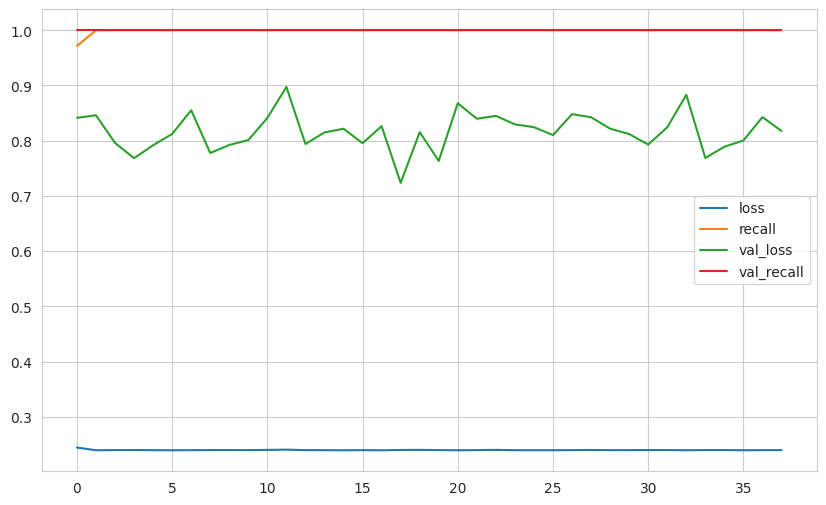

In [80]:
loss_df = pd.DataFrame(optuna_model_1.history.history)
loss_df.plot()

In [81]:
loss, Recall = optuna_model_1.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("Recall ", Recall)

loss:  0.7232761979103088
Recall  1.0


In [82]:
y_pred= (optuna_model_1.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_test,y_pred))

63/63 [==============================] - 0s 4ms/step
[[   0    0]
 [1593  407]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1593
           1       0.20      1.00      0.34       407

    accuracy                           0.20      2000
   macro avg       0.10      0.50      0.17      2000
weighted avg       0.04      0.20      0.07      2000



63/63 [==============================] - 0s 3ms/step


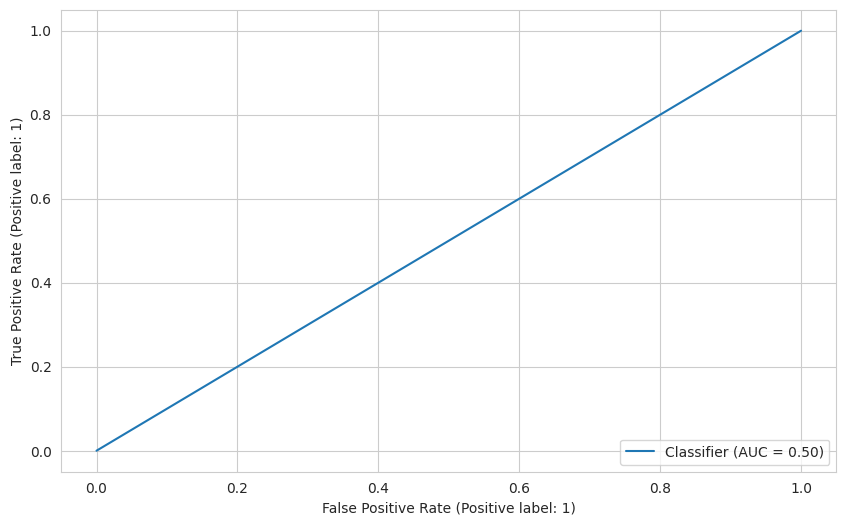

In [83]:
y_pred_proba = optuna_model_1.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

Optuna's best values after 50 trials:
{'n_units1': 86,
 'n_units2': 18,
 'n_units3': 8,
 'n_units4': 2,
 'optimizer': keras.src.optimizers.adam.Adam,
 'learning_rate': 0.00011631157117410245,
 'dropout1': 0.10501489400084944,
 'dropout2': 0.1079881946831484,
 'w0': 0.4871444301576711,
 'w1': 2.7648014869312485}


In [84]:
# build model with optuna's best parameters

tf.random.set_seed(42)
optuna_model_2 = Sequential()
optuna_model_2.add(Dense(86, activation="relu"))
optuna_model_2.add(Dropout(0.1050))
optuna_model_2.add(Dense(18, activation="relu"))
optuna_model_2.add(Dropout(0.107988))
optuna_model_2.add(Dense(8, activation="relu"))
optuna_model_2.add(Dense(2, activation="relu"))
optuna_model_2.add(Dense(1, activation="sigmoid"))
opt = Adam(learning_rate=0.0001163)

optuna_model_2.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=20, restore_best_weights=True
)

# train model
optuna_model_2.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=100,
    epochs=100,
    class_weight={0: 0.4871444301576711, 1: 2.7648014869312485},
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
64/64 [==============================] - 4s 15ms/step - loss: 0.6696 - recall: 0.3664 - val_loss: 0.6734 - val_recall: 0.5188
Epoch 2/100
64/64 [==============================] - 1s 9ms/step - loss: 0.6613 - recall: 0.5870 - val_loss: 0.6784 - val_recall: 0.7094
Epoch 3/100
64/64 [==============================] - 1s 9ms/step - loss: 0.6575 - recall: 0.7038 - val_loss: 0.6792 - val_recall: 0.7531
Epoch 4/100
64/64 [==============================] - 1s 12ms/step - loss: 0.6554 - recall: 0.7382 - val_loss: 0.6769 - val_recall: 0.7625
Epoch 5/100
64/64 [==============================] - 1s 13ms/step - loss: 0.6533 - recall: 0.7481 - val_loss: 0.6732 - val_recall: 0.7656
Epoch 6/100
64/64 [==============================] - 1s 18ms/step - loss: 0.6504 - recall: 0.7534 - val_loss: 0.6676 - val_recall: 0.7500
Epoch 7/100
64/64 [==============================] - 1s 14ms/step - loss: 0.6480 - recall: 0.7351 - val_loss: 0.6604 - val_recall: 0.7312
Epoch 8/100
64/64 [=================

In [85]:
optuna_model_2.summary()

Model: "sequential_107"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_535 (Dense)           (100, 86)                 1204      
                                                                 
 dropout_208 (Dropout)       (100, 86)                 0         
                                                                 
 dense_536 (Dense)           (100, 18)                 1566      
                                                                 
 dropout_209 (Dropout)       (100, 18)                 0         
                                                                 
 dense_537 (Dense)           (100, 8)                  152       
                                                                 
 dense_538 (Dense)           (100, 2)                  18        
                                                                 
 dense_539 (Dense)           (100, 1)               

<Axes: >

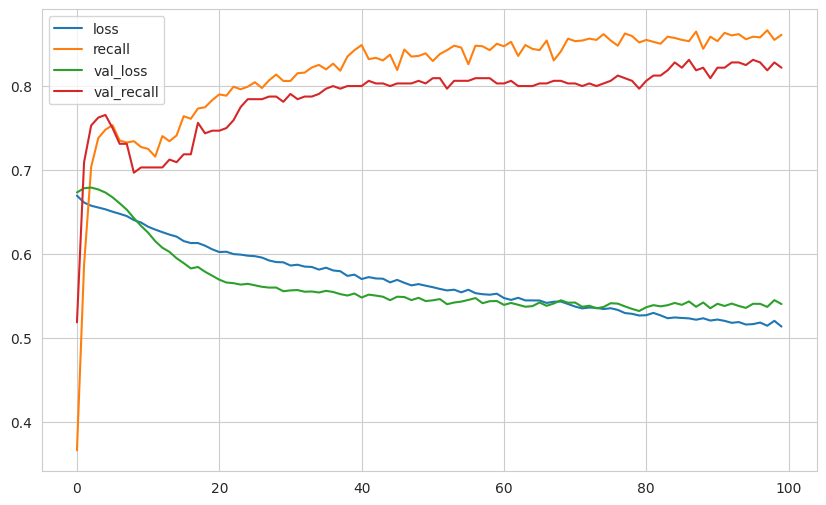

In [86]:
loss_df = pd.DataFrame(optuna_model_2.history.history)
loss_df.plot()

In [87]:
loss, Recall = optuna_model_2.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("Recall ", Recall)

loss:  0.5242529511451721
Recall  0.8402948379516602


In [88]:
y_pred= (optuna_model_2.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_test,y_pred))

63/63 [==============================] - 0s 2ms/step
[[1040   65]
 [ 553  342]]
              precision    recall  f1-score   support

           0       0.94      0.65      0.77      1593
           1       0.38      0.84      0.53       407

    accuracy                           0.69      2000
   macro avg       0.66      0.75      0.65      2000
weighted avg       0.83      0.69      0.72      2000



63/63 [==============================] - 0s 2ms/step


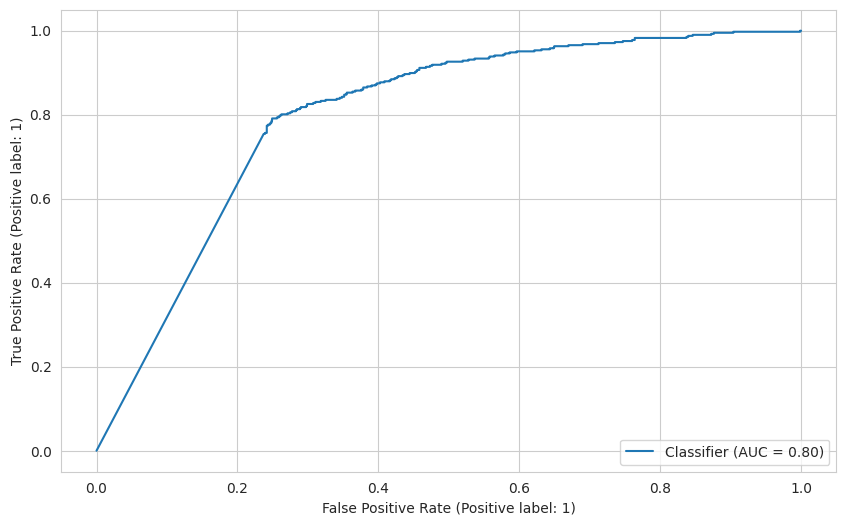

In [89]:
y_pred_proba = optuna_model_2.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

# Final Model and Model Deployment

In [90]:
import pickle
from sklearn.pipeline import Pipeline

operations = [("encoder", column_trans), ("scaler", scaler)]
transformer_pip = Pipeline(steps=operations)
pickle.dump(transformer_pip, open("transformer_pip", "wb"))

In [91]:
tf.random.set_seed(42)
final_model = Sequential(
    [
        Input(shape=X_train.shape[1]),
        Dense(units=72, activation="relu"),
        Dropout(0.2),

        Dense(units=36, activation="relu"),
        Dropout(0.2),

        Dense(units=12, activation="relu"),
        Dense(units=3, activation="relu"),
        Dense(units=1,activation='sigmoid'),
    ]
)

weights = class_weight.compute_class_weight(class_weight = "balanced", classes= np.unique(y_train), y= y_train)
weights = dict(enumerate(weights))

opt = Adam(learning_rate=0.025)
final_model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['Recall'])
early_stop = EarlyStopping(monitor="val_loss", mode="min", patience=10, restore_best_weights=True)


X_trans= transformer_pip.fit_transform(X)

final_model.fit(x=X_trans, y=y, epochs=150, batch_size=100, validation_split=0.2,
                     class_weight=weights, callbacks=[early_stop])

Epoch 1/150
80/80 [==============================] - 3s 12ms/step - loss: 0.6007 - recall: 0.6776 - val_loss: 0.5316 - val_recall: 0.6128
Epoch 2/150
80/80 [==============================] - 1s 8ms/step - loss: 0.5199 - recall: 0.6861 - val_loss: 0.4918 - val_recall: 0.6436
Epoch 3/150
80/80 [==============================] - 1s 7ms/step - loss: 0.5072 - recall: 0.6982 - val_loss: 0.5138 - val_recall: 0.6897
Epoch 4/150
80/80 [==============================] - 1s 7ms/step - loss: 0.4975 - recall: 0.7122 - val_loss: 0.4467 - val_recall: 0.6077
Epoch 5/150
80/80 [==============================] - 1s 7ms/step - loss: 0.4954 - recall: 0.7110 - val_loss: 0.4808 - val_recall: 0.6564
Epoch 6/150
80/80 [==============================] - 0s 5ms/step - loss: 0.4903 - recall: 0.7177 - val_loss: 0.4984 - val_recall: 0.6897
Epoch 7/150
80/80 [==============================] - 0s 5ms/step - loss: 0.4851 - recall: 0.7073 - val_loss: 0.4742 - val_recall: 0.6769
Epoch 8/150
80/80 [=====================

In [92]:
final_model.save("Assignment1_model.h5")

In [93]:
from tensorflow.keras.models import load_model

In [94]:
final_model = load_model("Assignment1_model.h5")
transformer_pip = pickle.load(open("transformer_pip", "rb"))

## Prediction

In [95]:
single_client = df_copy.drop("Exited", axis=1).iloc[0:1, :]
single_client

CreditScore Geography  Gender  Age  Tenure  Balance  NumOfProducts  \
0          619    France  Female   42       2    0.000              1   

   HasCrCard  IsActiveMember  EstimatedSalary  
0          1               1       101348.880

In [96]:
single_client = transformer_pip.transform(single_client)
single_client

array([[ 1.00175153, -0.57831252, -0.57773517,  1.10191942, -1.10191942,
        -0.32873352,  0.29007331, -1.04143297, -1.22605881, -0.91025649,
         0.64104192,  0.97067965,  0.02822301]])

In [97]:
(final_model.predict(single_client) > 0.5).astype("int32")

1/1 [==============================] - 0s 60ms/step


array([[1]], dtype=int32)

In [98]:
df_copy["Exited"].iloc[0]

1

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___